# DATA SCIENCE MIDTERM: Test

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("midterm_test.csv")

In [3]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.522582,1.285266,-3.211278,6.435478,-3.355995,-6.222153,-4.668957,26.648275,-9.493768,-15.919583,...,6.597750,-0.197808,-4.138974,1.148979,0.127080,-0.032610,-39.456039,-0.623131,0.405111,0.565209
1,-0.327133,-2.874201,-8.628286,-4.543222,-0.687731,-0.306087,-12.544880,9.719749,-14.072453,3.763146,...,6.235120,-11.226443,-1.727902,2.983166,5.918433,-0.207522,-15.453140,-5.715456,2.596948,-13.330898
2,-0.173731,-11.401446,7.633143,7.298406,-5.554917,-17.192158,11.098016,-41.911009,12.719480,-7.320119,...,-13.414719,28.987108,-3.532879,0.806915,0.476301,0.154757,-63.918116,1.310607,0.609384,-21.962528
3,-0.130836,4.716583,-18.537297,-2.334537,-3.697804,-0.162074,-26.951837,-21.238950,3.145513,0.661810,...,2.890234,5.023080,-7.140230,0.208304,3.621499,-0.386714,-66.901730,-1.991627,1.363681,-1.916557
4,0.035572,-0.141469,7.792464,-4.398339,0.823660,-0.665133,11.329657,-12.837209,-5.064350,-3.699563,...,-8.381609,-2.068961,8.671673,1.373791,-1.182293,-0.110082,46.273615,2.625769,-3.100504,-1.482507


In [4]:
df.describe()

C:\Users\DELL\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,39993.000000,39995.000000,39990.000000,39993.000000,39994.000000,39989.000000,39991.000000,39987.000000,39994.000000,39986.000000,...,39992.000000,39993.000000,39985.000000,39992.000000,39997.000000,39996.000000,39993.000000,39996.000000,39995.000000,39987.000000
mean,0.001150,0.050029,-1.212748,0.037892,-0.017543,0.054597,-1.764113,-7.559937,0.077270,-0.022996,...,-2.215796,6.527137,-1.840976,0.007109,0.032597,0.003296,-12.681044,-0.023815,0.012795,-0.699512
std,0.370661,6.334603,13.244277,8.075404,6.366575,7.675792,19.256133,30.344781,8.904998,6.360036,...,16.910200,18.715717,5.128600,1.531295,4.137618,0.396432,36.737560,4.813593,1.938144,15.037603
min,-1.637195,-26.366592,-59.438295,-32.896394,-24.074707,-29.832100,-86.418814,-151.668029,-35.584361,-24.917306,...,-65.711291,-70.629012,-24.685394,-6.455841,-16.358976,-1.712737,-199.609887,-19.421488,-7.437804,-58.373259
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.697244,25.619887,51.047183,30.420903,24.241551,34.870000,74.218768,154.990430,40.395457,24.115795,...,75.263599,87.682808,22.140912,6.286530,16.679249,1.663191,131.577516,20.586126,7.781771,63.436061


In [5]:
df.isnull().T.any().T.sum()

392

In [6]:
nan_rows = df[df.isnull().T.any().T]

In [7]:
nan_rows

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
16,-0.080002,-3.996057,12.610601,2.699778,3.305612,14.143028,18.334866,5.918937,6.168532,4.562688,...,4.160472,0.728321,0.795320,-1.993936,-8.423694,-0.112500,-0.445456,8.485323,-0.620149,0.531935
31,0.359237,5.181104,-4.619430,0.382523,-8.476027,-0.413589,-6.716305,-4.276672,-1.528976,-1.759066,...,-5.058938,8.455196,3.646277,-0.651850,4.683005,-0.258369,43.731806,1.481998,3.191005,19.409465
165,0.284803,-11.256834,-14.417771,-1.716110,0.685712,-4.619654,NaN,6.515300,-3.014846,-13.638037,...,11.633417,10.658716,-9.480731,-2.459037,4.676046,-0.913933,-30.018290,-1.714813,0.748383,9.644043
176,-0.478195,-6.721827,-15.164784,3.914474,3.411644,16.045840,-22.048457,-18.692620,-14.678598,0.727056,...,-6.201832,-8.298007,NaN,-1.282679,-3.232978,-0.433443,24.970770,-1.490086,-0.459047,2.014385
202,-0.033666,3.619146,-17.619922,6.415630,4.800279,-0.067147,-25.618042,14.204170,19.893352,-7.089081,...,-10.748451,-28.938351,-3.390374,1.468866,-6.802180,-0.037301,-4.211652,0.753212,1.129832,NaN
396,0.450952,-1.014944,-12.299507,-9.603972,5.946021,4.388750,-17.882559,-22.772679,4.386124,-3.862643,...,-12.257402,4.404482,0.334554,-0.575795,-4.431077,0.826665,49.922964,-3.468746,3.074587,20.981209
415,-0.281347,9.139171,NaN,7.778547,4.591779,12.165179,-25.553870,-21.832722,13.387992,-1.292013,...,-1.099939,8.474707,-9.661455,1.009738,0.526828,0.207235,4.873831,1.999964,1.074500,23.227740
437,0.365192,3.879024,8.794182,2.775357,1.397091,10.866090,12.786080,-7.857713,15.561306,2.123218,...,NaN,11.898467,-1.470849,0.923427,-0.034080,-0.259296,-23.835802,-8.730397,0.758020,-9.320593
736,NaN,-0.972032,-7.497928,-8.889392,4.114729,8.708614,-10.901424,14.219227,2.365589,1.015814,...,-33.366429,-16.437833,5.415697,1.082095,-2.344104,-0.126789,60.227866,-1.341787,0.705265,34.863418
879,0.344249,9.574485,-6.190021,2.753796,-9.473160,-10.528537,-8.999825,17.315973,-16.564721,4.713151,...,1.489300,-2.952096,1.023792,NaN,-2.288455,-0.377789,-21.635364,4.115620,2.399953,2.032534


In [8]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.522582,1.285266,-3.211278,6.435478,-3.355995,-6.222153,-4.668957,26.648275,-9.493768,-15.919583,...,6.597750,-0.197808,-4.138974,1.148979,0.127080,-0.032610,-39.456039,-0.623131,0.405111,0.565209
1,-0.327133,-2.874201,-8.628286,-4.543222,-0.687731,-0.306087,-12.544880,9.719749,-14.072453,3.763146,...,6.235120,-11.226443,-1.727902,2.983166,5.918433,-0.207522,-15.453140,-5.715456,2.596948,-13.330898
2,-0.173731,-11.401446,7.633143,7.298406,-5.554917,-17.192158,11.098016,-41.911009,12.719480,-7.320119,...,-13.414719,28.987108,-3.532879,0.806915,0.476301,0.154757,-63.918116,1.310607,0.609384,-21.962528
3,-0.130836,4.716583,-18.537297,-2.334537,-3.697804,-0.162074,-26.951837,-21.238950,3.145513,0.661810,...,2.890234,5.023080,-7.140230,0.208304,3.621499,-0.386714,-66.901730,-1.991627,1.363681,-1.916557
4,0.035572,-0.141469,7.792464,-4.398339,0.823660,-0.665133,11.329657,-12.837209,-5.064350,-3.699563,...,-8.381609,-2.068961,8.671673,1.373791,-1.182293,-0.110082,46.273615,2.625769,-3.100504,-1.482507
5,0.171480,1.376789,-12.157398,0.552619,-2.565093,-5.471192,-17.675943,-28.142754,-2.641366,-10.103862,...,-20.249716,14.552549,-2.978953,-0.779675,1.573042,0.259196,-16.043420,-1.172671,0.477270,15.741580
6,0.272986,6.858258,32.283563,2.005428,-10.277287,-8.216530,46.937875,-2.531384,12.522623,6.830416,...,40.997333,12.510416,-9.898307,-1.171959,4.871360,0.387223,7.187808,-3.958831,-4.062299,-7.968791
7,-0.521643,2.175613,10.731249,-2.015805,-6.392855,-12.386190,15.602430,41.930868,-2.728404,3.964700,...,-6.272856,6.126906,2.922622,1.741650,-0.218311,0.448858,-4.305244,-1.644386,-1.354346,6.544092
8,-0.328042,0.982469,6.182135,1.817593,-6.348914,-2.574139,8.988360,-2.080090,-3.697630,-5.189804,...,-4.448844,0.514294,-4.065301,-1.174008,-2.517373,-0.792455,-17.384473,-4.436931,-2.251284,6.867929
9,0.247553,3.381052,-2.453479,0.724840,11.503477,-0.781279,-3.567174,-27.943328,-9.035508,0.339077,...,6.838137,13.237526,-5.773433,1.354999,-6.932841,-0.001768,-31.085008,-3.526374,-2.940867,-7.870876


In [9]:
df.x0.value_counts()

-0.297201    1
 0.055615    1
-0.056813    1
-0.587128    1
-0.225062    1
 0.067805    1
-0.141105    1
 0.501502    1
 0.117110    1
-0.134728    1
 0.417888    1
-0.151998    1
 0.247180    1
-0.070858    1
-0.766266    1
-0.042246    1
 0.312202    1
-0.532647    1
 0.490303    1
 0.387029    1
 0.331749    1
-0.063778    1
 0.354024    1
 0.236518    1
-0.136811    1
 0.045901    1
 0.130437    1
-0.025346    1
 0.016609    1
 0.027348    1
            ..
 0.277591    1
 0.472349    1
 0.130139    1
 0.188110    1
-0.761910    1
 0.514400    1
 0.215783    1
 0.502710    1
 0.491636    1
 0.428894    1
-0.069762    1
-0.343846    1
 0.186027    1
-0.104902    1
-0.503138    1
 0.362882    1
 0.038689    1
-0.262290    1
-0.839907    1
-0.140012    1
-0.209302    1
-0.238912    1
 0.344150    1
 0.403922    1
 0.314471    1
-0.034575    1
 0.157389    1
-0.643592    1
 0.654092    1
 0.439498    1
Name: x0, dtype: int64

## EDA for all the columns: 

In [10]:
df.x0.describe()

count    39993.000000
mean         0.001150
std          0.370661
min         -1.637195
25%               NaN
50%               NaN
75%               NaN
max          1.697244
Name: x0, dtype: float64

In [11]:
#missing values
df[df.x0.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
736,NaN,-0.972032,-7.497928,-8.889392,4.114729,8.708614,-10.901424,14.219227,2.365589,1.015814,...,-33.366429,-16.437833,5.415697,1.082095,-2.344104,-0.126789,60.227866,-1.341787,0.705265,34.863418
4032,NaN,-13.278531,5.224180,8.031379,7.113948,-5.632316,7.595565,-76.814738,-4.694638,0.109942,...,2.279536,41.387411,-1.036445,1.235281,-6.257549,0.234067,46.315930,1.809038,3.355514,-3.179534
7341,NaN,-6.558542,2.574010,-5.177709,-0.575634,-4.037961,3.742417,13.571069,-4.025349,-3.841779,...,9.998477,19.228422,0.448871,-1.123461,-13.579642,-0.410003,-30.357167,-0.070304,3.427604,2.211305
9032,NaN,-1.363026,-14.511737,0.014416,2.383576,-8.438714,-21.098975,-21.175594,-13.332358,-7.076027,...,-10.474286,-0.586843,-1.690052,1.508175,1.888408,-0.268737,12.802009,-7.640010,0.374037,-0.366724
9252,NaN,3.873243,-14.970597,-1.280473,8.085783,10.393555,-21.766123,-44.365444,0.959803,0.636768,...,9.127374,16.152568,-3.637118,-0.610477,3.264251,0.198148,38.169067,5.052202,2.127707,13.958758
13338,NaN,1.514532,17.225170,-2.846814,8.971908,-7.671505,25.044102,40.794087,-3.598263,3.693619,...,29.167205,3.784944,-6.152614,-0.328858,-4.812709,0.123806,-40.772783,-2.244247,-1.888849,5.156692
19109,NaN,2.812956,-21.902109,7.118919,2.831426,21.085432,-31.844020,-47.480635,-10.711584,-3.334840,...,-25.676721,-16.657183,-5.709473,2.770588,1.125649,0.121068,50.866204,1.021700,-1.844232,1.877765


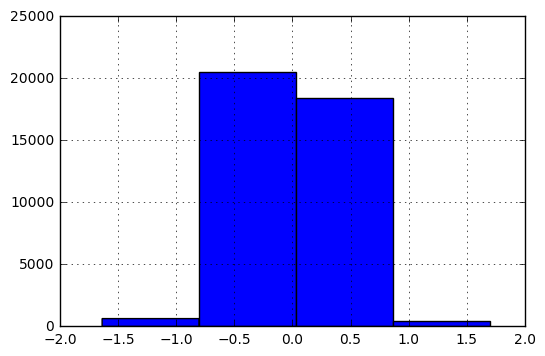

In [12]:
df.x0.hist(bins=4)

In [13]:
#print np.all(np.isfinite(df["x0"]))

In [14]:
df.x1.value_counts()

-0.857253     1
-0.366058     1
 4.685951     1
 3.780006     1
 0.331123     1
-2.433616     1
-2.997420     1
-1.075718     1
-0.197745     1
 8.710107     1
 0.941777     1
-2.961944     1
 3.628807     1
 3.604640     1
-10.251086    1
 5.685603     1
 8.688688     1
 9.405694     1
-3.988256     1
 5.722287     1
-4.188821     1
 2.636770     1
-1.202100     1
 4.950813     1
-5.656064     1
 0.892295     1
-5.719802     1
-1.673408     1
 6.747569     1
-1.781684     1
             ..
-2.953893     1
-5.833135     1
-4.582551     1
 7.008429     1
-6.386993     1
 1.664431     1
 2.701715     1
-0.227442     1
-5.832101     1
-5.583971     1
-0.015594     1
 9.360301     1
-1.863768     1
 7.791092     1
 4.283431     1
-3.870251     1
 6.717861     1
 0.285316     1
 5.136580     1
 0.076120     1
-4.316410     1
-8.776164     1
 7.547509     1
 7.789759     1
 6.884703     1
 3.919544     1
 0.221623     1
-6.067342     1
 7.880747     1
-8.373531     1
Name: x1, dtype: int64

In [15]:
df.x1.describe()

count    39995.000000
mean         0.050029
std          6.334603
min        -26.366592
25%               NaN
50%               NaN
75%               NaN
max         25.619887
Name: x1, dtype: float64

In [16]:
df[df.x1.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
20332,0.126310,NaN,-8.563933,-2.515134,2.717837,-8.477928,-12.451316,6.796720,6.366925,9.354449,...,-1.141267,5.852421,-5.193545,-0.786251,-3.856710,0.405779,-65.223078,5.338836,1.849201,-14.048275
20529,-0.181611,NaN,11.860072,-4.410542,2.171256,1.299784,17.243653,-58.116897,-10.493606,-16.103197,...,-1.980662,27.803603,-10.751030,-2.055889,5.120102,-0.425251,44.678709,8.632443,-2.997645,5.341379
22711,0.441977,NaN,23.759041,4.215926,8.043510,-5.021445,34.543860,-78.287572,-1.260894,5.263387,...,0.264150,47.335073,-2.994769,0.854704,5.994847,-0.121764,24.502001,-4.620204,1.198617,-15.810419
29613,-0.083809,NaN,6.296154,10.058634,2.998616,1.214260,9.154135,8.872996,11.313783,-4.783383,...,1.070214,7.632306,-7.427971,0.627612,11.308343,-0.354596,-56.864593,7.672089,0.111893,-5.107785
31496,0.264798,NaN,10.350964,-1.817338,1.505715,13.306307,15.049523,31.505122,-7.148128,2.918496,...,-26.133718,25.532198,9.858147,0.164231,6.944259,-0.782561,-8.649886,-2.826344,-1.099757,6.005981


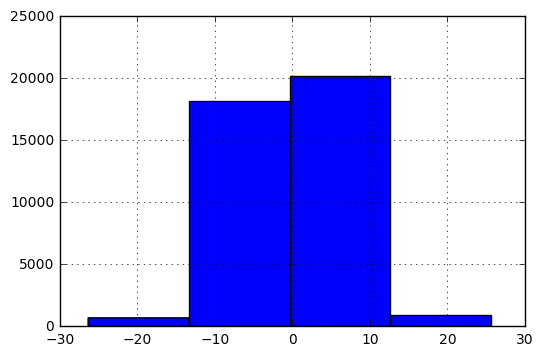

In [17]:
df.x1.hist(bins=4)

In [18]:
df.x2.value_counts()

-8.494850     1
-3.991440     1
 10.882384    1
 5.646838     1
 12.562904    1
 20.250310    1
 7.160596     1
-0.221731     1
 0.766800     1
-18.998492    1
 2.202639     1
 5.777984     1
-10.594610    1
 0.382804     1
 12.845000    1
 13.444941    1
-11.993436    1
 1.611436     1
 1.445503     1
 19.584607    1
-10.207176    1
-6.120494     1
-1.411525     1
 18.548597    1
 3.932421     1
 5.193700     1
 13.434727    1
 10.212484    1
 7.096939     1
-4.275580     1
             ..
 1.773391     1
 1.527586     1
 0.628326     1
 9.747911     1
-8.659584     1
 12.341024    1
-2.415218     1
 21.043871    1
-14.945600    1
-4.389767     1
 12.284662    1
-23.682950    1
-6.648040     1
-14.335143    1
 16.058299    1
-9.060271     1
-2.023803     1
 11.200750    1
-1.194602     1
 16.870741    1
-3.763417     1
 3.094276     1
 27.514186    1
 1.326780     1
-4.446491     1
-5.123098     1
 17.770123    1
 32.856294    1
-6.278914     1
 5.978374     1
Name: x2, dtype: int64

In [19]:
df.x2.describe()

count    39990.000000
mean        -1.212748
std         13.244277
min        -59.438295
25%               NaN
50%               NaN
75%               NaN
max         51.047183
Name: x2, dtype: float64

In [20]:
df[df.x2.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
415,-0.281347,9.139171,NaN,7.778547,4.591779,12.165179,-25.553870,-21.832722,13.387992,-1.292013,...,-1.099939,8.474707,-9.661455,1.009738,0.526828,0.207235,4.873831,1.999964,1.074500,23.227740
10140,0.060038,-13.164335,NaN,13.292428,1.989032,3.285533,-2.369386,0.379897,4.957606,-3.675466,...,15.806202,-6.906350,-12.003704,0.005486,7.900613,0.068374,-47.519559,0.611472,-0.964653,-14.827455
14224,-0.425291,11.100982,NaN,2.134705,3.678566,-8.945919,-12.981577,19.772466,17.119398,12.129679,...,-4.679759,6.408161,7.022290,-2.768817,3.244931,-0.073355,-53.050547,1.385831,0.923953,10.034637
20111,0.046841,3.211963,NaN,-4.930788,11.235641,0.179271,-5.303139,38.144786,-20.080546,-4.053326,...,41.994636,-20.906931,-14.235910,0.557003,-1.493242,-0.187910,-84.769091,-4.604911,3.118262,-41.019704
20659,0.136124,1.438192,NaN,4.344997,-1.607403,2.511820,-5.663818,11.797700,-1.219259,-0.519583,...,11.556260,20.993839,-1.560587,-0.037924,2.223114,0.255642,-13.606315,-4.134437,3.037198,8.852262
20765,0.260669,4.313479,NaN,7.661068,-2.515500,-3.885333,16.488739,48.913707,-3.506990,-3.273637,...,23.745549,-26.831694,4.842007,-2.039186,8.298262,-0.494763,-13.234423,-7.915595,-3.049231,-19.666104
25259,0.047007,7.014280,NaN,-1.805201,-3.864755,0.118907,-5.661635,25.701575,-2.913427,-4.036151,...,1.548292,-19.788576,5.521586,1.119163,1.955329,-0.313466,42.402696,-3.824891,-1.687574,6.029917
29322,0.346691,-7.101982,NaN,2.721478,-13.157116,-10.144180,-29.958448,-5.230743,2.196992,-0.566026,...,-11.404013,-1.705068,-5.291184,2.247111,1.856535,-0.289971,-26.812730,8.508516,1.956404,15.696522
36899,0.051459,-3.474105,NaN,-1.845708,-3.510317,8.812318,-41.573553,-79.761951,2.228146,-12.162295,...,-19.339715,0.339650,-16.322262,1.522137,1.203965,-0.308039,-50.524049,-1.963172,0.606311,-21.647874
38539,-0.389646,-1.192508,NaN,1.231622,3.147114,-8.406682,-22.246409,17.291927,1.646378,-5.149631,...,-7.992546,-40.223100,2.887092,-0.221690,-5.839669,0.639712,20.248173,-5.930545,-3.519352,1.159441


In [21]:
df.x3.value_counts()

-11.318321    1
-5.314333     1
-5.194672     1
-5.968091     1
 11.017939    1
-2.243515     1
-6.954487     1
 0.250790     1
-5.140534     1
-4.190356     1
 13.125277    1
-6.327143     1
 8.748858     1
-7.135302     1
 14.184176    1
 3.914683     1
 2.268465     1
-3.514698     1
-12.819303    1
-0.031049     1
-3.789449     1
 5.901359     1
 17.393881    1
 2.425652     1
-2.303921     1
 0.342690     1
 0.358318     1
-2.213787     1
 0.393375     1
-3.955966     1
             ..
-11.345529    1
-6.056319     1
 2.558943     1
-5.718236     1
-9.718584     1
-1.679707     1
-12.659395    1
-4.069388     1
 7.443465     1
 4.681459     1
 3.740717     1
-12.413602    1
-6.194825     1
 7.032799     1
 9.426772     1
-4.403428     1
-1.346095     1
-15.489191    1
 6.806055     1
 8.413657     1
-8.208986     1
 4.131485     1
-12.161908    1
 2.197463     1
-0.600694     1
 8.527380     1
 2.154803     1
-7.808446     1
 7.542249     1
 15.944497    1
Name: x3, dtype: int64

In [22]:
df.x3.describe()

count    39993.000000
mean         0.037892
std          8.075404
min        -32.896394
25%               NaN
50%               NaN
75%               NaN
max         30.420903
Name: x3, dtype: float64

In [23]:
df[df.x3.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1310,-0.075859,-2.285463,10.863891,NaN,-8.292225,-4.687446,15.795281,12.664676,-8.083606,-6.398938,...,10.176444,16.441359,-2.360155,-0.552888,-7.953337,0.261227,-37.702291,2.556598,-1.356776,3.769613
5103,0.112469,-0.241160,1.770020,NaN,-8.942266,-7.078008,2.573477,-10.416903,-5.009995,-1.376694,...,8.345868,7.933723,0.841368,2.424707,-2.570593,-0.321994,-34.140201,0.443255,-1.003690,-9.790028
17458,0.245405,4.970877,0.737685,NaN,-4.416025,2.537221,1.072539,10.580647,3.580006,8.484643,...,-0.470399,1.419994,-5.579700,-3.146625,-4.099805,0.044723,-65.566934,-10.967878,-1.281361,-6.613578
18268,0.415731,-6.229999,-19.042342,NaN,1.355958,-6.571637,-27.686134,22.136575,2.070840,-9.654888,...,5.969181,-9.700401,-4.546370,2.941898,8.926090,-0.429203,-78.498582,-10.963740,3.218757,-11.008607
23718,-0.374981,4.673685,-33.480636,NaN,3.932962,-15.039338,-48.678329,-34.737704,-2.257077,-4.009949,...,-14.158071,7.743758,-6.505935,-0.663043,-8.092276,0.216094,-22.681254,2.842452,3.221874,13.482950
31102,-0.050322,5.290148,22.499705,NaN,0.249161,3.763445,32.712880,4.352677,10.756324,-11.270299,...,20.094743,3.495898,4.774849,-0.963203,4.050921,-0.048057,7.413188,7.374277,-0.825438,-4.093279
32745,-0.517888,-7.004541,8.697329,NaN,-2.605085,-0.140760,12.645263,41.588548,2.030916,-1.259094,...,31.402677,-10.655500,-7.455721,-1.803925,-7.138427,-0.469402,-72.562478,-7.046058,-1.501139,-16.592852


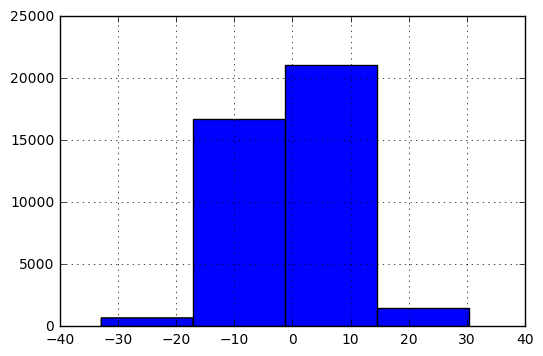

In [24]:
df.x3.hist(bins=4)

In [25]:
df.x4.value_counts()

 2.945678     1
-1.541957     1
-4.940987     1
-8.674661     1
-0.938298     1
 0.422767     1
-3.483786     1
 0.376844     1
-1.421881     1
 8.247104     1
-0.041157     1
 6.489132     1
 5.809572     1
-10.438397    1
-4.194890     1
 7.353509     1
 6.404983     1
 5.999947     1
-6.777718     1
 4.841566     1
 4.175584     1
 5.558438     1
 0.169729     1
 2.259618     1
 11.262565    1
-0.221868     1
-4.401680     1
 4.826378     1
-2.007042     1
-10.850735    1
             ..
-2.746325     1
-2.891549     1
-4.749500     1
-0.616476     1
-9.547027     1
-0.765768     1
-1.982070     1
 4.827815     1
-0.336078     1
-13.039573    1
-12.495487    1
-1.047689     1
-6.701116     1
 6.666400     1
-11.714693    1
-3.025872     1
-5.201284     1
-2.531998     1
-1.693950     1
 1.261473     1
-13.222372    1
 11.213409    1
-7.739936     1
 6.360574     1
 13.789335    1
-7.420013     1
-4.917365     1
 2.482779     1
 11.320013    1
 2.772697     1
Name: x4, dtype: int64

In [26]:
df.x4.describe()

count    39994.000000
mean        -0.017543
std          6.366575
min        -24.074707
25%               NaN
50%               NaN
75%               NaN
max         24.241551
Name: x4, dtype: float64

In [27]:
df[df.x4.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1343,-0.098895,-9.787568,15.570184,-9.214255,NaN,4.560004,22.637878,-3.596280,-6.007775,3.276035,...,7.222346,13.828448,-2.155318,-1.355745,4.071357,0.761838,8.745064,-3.215242,-1.527549,-13.696540
14972,-0.217645,1.406067,-19.546073,-10.220744,NaN,-8.414884,-28.418521,39.005732,-13.949897,2.640181,...,32.204876,-21.527089,-4.950250,-0.870920,10.411788,0.015952,-61.172454,-3.575895,1.658464,-3.886339
15297,-0.600524,5.312253,-24.084088,-0.490317,NaN,-1.906717,-35.016454,-76.721556,4.509264,1.809993,...,-39.832278,25.014610,-4.366024,-0.460566,-4.408931,-0.369525,-27.029526,6.852797,2.427984,10.255965
23639,-0.287635,-7.821805,-12.518418,3.526429,NaN,7.288764,-18.200839,-38.169390,-0.998978,9.592276,...,-25.354971,3.249985,-0.143269,0.518982,5.505384,-0.665510,16.036416,-4.308544,1.442072,4.020506
28335,-0.044110,4.761486,-3.727217,-11.001588,NaN,14.784465,-5.419094,-21.957176,13.358432,13.876793,...,-10.720510,-10.986337,0.112615,0.823328,7.943287,-0.429344,40.204200,0.684645,-3.936897,-3.016312
31618,0.010897,-1.013417,-17.372028,7.066908,NaN,6.159608,-25.257623,-17.679654,10.478312,12.097079,...,11.370731,1.907773,-6.732931,-0.458121,-4.843975,0.001170,0.301161,6.007977,-0.234939,29.493164


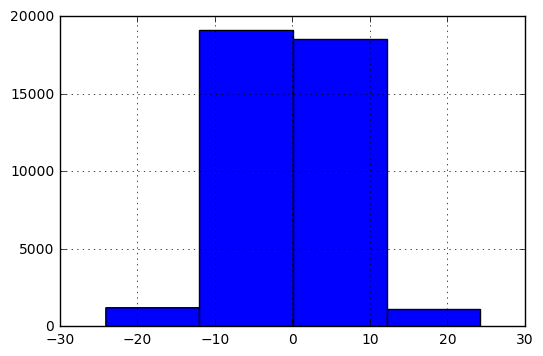

In [28]:
df.x4.hist(bins=4)

In [29]:
df.x5.value_counts()

 9.898140     1
-7.734607     1
-9.967292     1
 12.081106    1
 5.577680     1
-3.950916     1
-8.975538     1
-3.594946     1
-1.566639     1
 0.815378     1
-7.141495     1
 1.282300     1
-4.964645     1
 0.468848     1
-8.904043     1
 2.765013     1
-2.577296     1
-15.290533    1
-2.669843     1
-1.173812     1
-5.768843     1
-6.671815     1
 7.652614     1
 9.431058     1
 2.312920     1
-2.768470     1
 8.177732     1
-2.056989     1
-8.649340     1
-6.931397     1
             ..
-17.790923    1
-10.042430    1
-7.299107     1
-12.243271    1
-3.426117     1
-0.391040     1
-14.837101    1
-2.939881     1
 10.913903    1
 4.186306     1
 2.641783     1
-1.173848     1
-7.618198     1
-10.993655    1
-3.412991     1
-6.199812     1
-2.708570     1
-1.707675     1
 2.257122     1
 0.067658     1
-4.407766     1
-13.882736    1
-14.163547    1
-13.446477    1
 1.838064     1
 8.785435     1
 7.045758     1
 0.757507     1
-2.717892     1
-3.895841     1
Name: x5, dtype: int64

In [30]:
df.x5.describe()

count    39989.000000
mean         0.054597
std          7.675792
min        -29.832100
25%               NaN
50%               NaN
75%               NaN
max         34.870000
Name: x5, dtype: float64

In [31]:
df[df.x5.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
999,-0.195885,-0.035765,-0.881853,-2.887518,-0.154314,NaN,-1.282148,8.812764,12.067195,-2.884480,...,14.931662,-24.936085,-2.671063,-0.839371,-5.745191,0.170064,-22.798947,-7.045021,3.437089,-7.624105
4599,-0.262081,-4.494074,-2.666405,-15.605539,9.839647,NaN,-3.876753,11.319435,-4.424167,2.520614,...,-2.662465,-11.902062,-3.993044,-0.409569,-0.237054,-0.187789,-22.535876,-1.777000,-1.112127,-13.483044
16654,-0.080399,9.552756,-15.282653,13.925082,-0.371814,NaN,-22.219829,-58.508603,-13.932190,7.853059,...,-8.708304,4.695031,-3.255164,-0.446932,-2.106894,-0.235114,41.365597,-4.282334,-0.151640,2.755787
18314,0.394598,-6.260232,-5.763177,5.366780,7.393260,NaN,-8.379227,3.836551,-7.077532,-6.214598,...,6.030710,-11.367218,1.796194,0.112379,1.708857,-0.458947,-3.106980,5.222083,2.634247,-6.721464
25786,-0.382975,-8.312322,10.533164,6.227776,-2.988576,NaN,15.314428,35.980554,7.628205,0.608413,...,26.563767,-10.939223,-3.793182,-0.212275,2.456883,0.204781,-90.243094,1.442710,-2.263557,-36.005238
25842,-0.480058,12.794324,8.858126,6.174946,-5.197749,NaN,12.879050,-7.515943,7.698629,11.514427,...,1.871583,-12.657478,-3.679351,-3.177763,2.358723,0.331292,-4.907478,1.653931,1.477867,-11.948220
30409,-0.456048,-13.846574,-2.474475,16.258280,5.406090,NaN,-3.597700,33.255725,-2.635617,-10.095652,...,-9.479686,-14.424021,-1.327511,1.859575,-8.985155,0.036534,-5.005259,5.813638,-2.912768,8.836962
31806,-0.181555,4.784894,-21.283525,9.178231,15.920569,NaN,-30.944646,-25.190602,-3.374767,-1.084604,...,-12.595715,-28.537293,-9.078151,-0.180899,6.067230,-0.330299,-29.511422,-2.356095,-0.592801,-21.643155
32406,-0.122988,2.349873,-3.911771,7.988291,-11.034849,NaN,-5.687421,-34.026484,-4.450517,-0.459943,...,6.293273,5.541136,-3.655404,1.950859,1.464255,0.461854,32.166890,-1.484430,-1.160422,25.752872
35132,0.642006,-5.208992,-16.896740,10.703025,-11.017682,NaN,-24.566590,-39.685430,8.804843,8.194421,...,-15.742952,-26.192961,-3.012458,-0.421212,0.848375,0.374236,45.880920,-3.609822,-3.755341,-6.268009


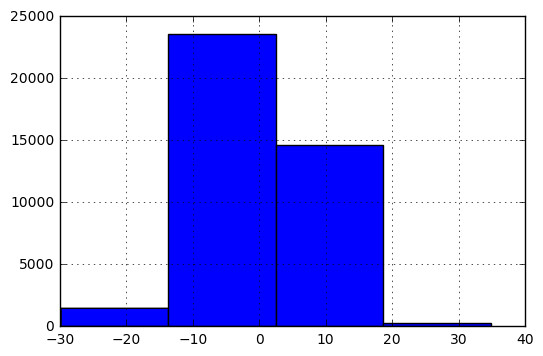

In [32]:
df.x5.hist(bins=4)

In [33]:
df.x6.value_counts()

-29.646202    1
 33.956245    1
-23.462727    1
 1.787175     1
-6.992876     1
 6.366832     1
 22.920353    1
-6.255103     1
 13.709288    1
 18.714913    1
 3.520439     1
 18.975803    1
-7.743810     1
-14.344019    1
-14.750882    1
-3.134515     1
 0.700410     1
-16.683804    1
 6.578391     1
 26.156498    1
-11.624833    1
-22.492000    1
-16.658445    1
-30.323116    1
 31.443478    1
 5.033963     1
 14.958690    1
 23.140812    1
-15.943430    1
 26.196763    1
             ..
 0.166008     1
-3.124911     1
 6.194725     1
-21.329552    1
 26.212257    1
 19.480606    1
-2.266327     1
 11.187695    1
-19.250054    1
 9.614372     1
-15.085243    1
 5.824948     1
-4.074081     1
 39.635697    1
-40.511289    1
-11.718719    1
-9.874589     1
-27.109641    1
-18.155586    1
 15.902901    1
 37.161531    1
-17.821014    1
-17.918997    1
 14.199810    1
-12.349334    1
-22.196487    1
 19.347294    1
-15.049310    1
-0.998866     1
 6.428637     1
Name: x6, dtype: int64

In [34]:
df.x6.describe()

count    39991.000000
mean        -1.764113
std         19.256133
min        -86.418814
25%               NaN
50%               NaN
75%               NaN
max         74.218768
Name: x6, dtype: float64

In [35]:
df[df.x6.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
165,0.284803,-11.256834,-14.417771,-1.716110,0.685712,-4.619654,NaN,6.515300,-3.014846,-13.638037,...,11.633417,10.658716,-9.480731,-2.459037,4.676046,-0.913933,-30.018290,-1.714813,0.748383,9.644043
6094,-0.429002,-2.214127,4.393627,4.250147,5.439394,1.319879,NaN,11.334637,4.809765,0.948105,...,5.894654,37.105669,-0.049234,0.959022,-11.774651,0.011478,-12.687604,8.655706,-0.020831,21.381576
7508,0.149059,-7.265980,-20.682060,4.929705,-1.797157,3.199229,NaN,-61.318273,-5.951926,8.734317,...,-10.810314,-25.744038,-7.684558,0.792352,2.148353,0.000333,36.421269,-2.037164,-2.964066,-7.746356
10488,-0.030952,5.354561,-15.225265,5.685931,-2.062070,4.414658,NaN,-56.276928,-0.202835,-6.925547,...,9.529061,-3.808794,-5.012883,0.278554,-0.938233,-0.045465,15.653609,-12.820272,-0.846983,-8.296746
12332,0.416433,-3.628829,8.159928,4.311371,12.586975,-9.087339,NaN,-7.796791,11.012602,6.931730,...,-13.582826,5.610384,-5.469636,0.917402,4.472762,0.301242,-33.230136,0.199051,-0.375255,-8.501735
24797,-0.549271,8.633338,0.209984,1.150044,2.124860,-7.537125,NaN,-16.851411,4.211594,-8.819307,...,-9.000267,13.517918,-1.690265,-3.161350,-2.383423,0.072070,-64.295542,-1.560819,1.693108,-13.453147
29574,0.068719,-6.245469,3.917780,-6.224298,6.886683,-7.571130,NaN,-27.120743,0.146376,-0.540279,...,18.586975,8.091989,-8.632195,-0.674688,2.247285,-0.034005,-26.877176,0.816826,-1.981794,-10.487073
37539,-0.133650,2.006979,-29.144478,-10.963297,4.541732,-3.157218,NaN,-7.026964,-6.842624,14.171947,...,-9.069540,-49.937088,2.309431,-0.592202,0.587729,-0.227854,14.768808,-4.335728,-2.181008,-13.643258
38201,0.215695,-5.114785,-4.842860,-12.121631,5.604151,-7.682133,NaN,2.793534,10.266495,-12.999253,...,-11.800502,5.042037,-2.861714,-1.638227,-1.482013,0.085768,11.263516,2.821537,1.618559,8.220548


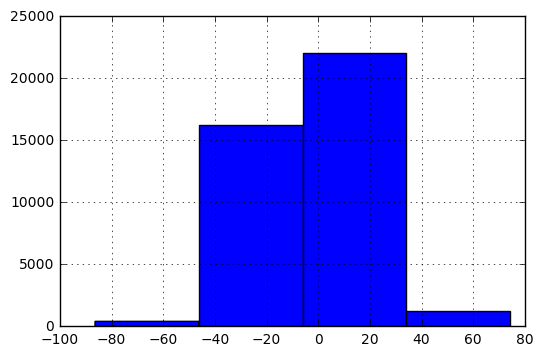

In [36]:
df.x6.hist(bins=4)

In [37]:
df.x7.value_counts()

-5.617730     1
-63.759330    1
 16.569409    1
 5.270593     1
-52.985999    1
-17.377147    1
-32.855598    1
 1.943801     1
-1.418315     1
 8.976671     1
-3.548120     1
-11.147097    1
-14.080992    1
-62.723701    1
-24.232990    1
 49.021984    1
-17.838642    1
-1.994902     1
 4.552533     1
 16.033699    1
-33.152574    1
 8.811850     1
 73.624408    1
-3.248401     1
 22.882359    1
-23.848628    1
-6.363004     1
-19.807262    1
 14.517874    1
-0.148375     1
             ..
-36.965279    1
-34.775906    1
 10.978359    1
-35.183088    1
 38.917896    1
-3.567404     1
-8.974952     1
-7.055017     1
-3.717491     1
-1.290206     1
-19.967916    1
-45.436336    1
 24.154543    1
-33.315759    1
-38.063746    1
-17.831663    1
-20.070138    1
 24.586538    1
 24.544978    1
-57.729823    1
-5.164947     1
 29.635256    1
 31.166193    1
 29.957736    1
-2.419678     1
-16.419988    1
-7.704505     1
-15.163356    1
-13.157197    1
 76.525909    1
Name: x7, dtype: int64

In [38]:
df.x7.describe()

count    39987.000000
mean        -7.559937
std         30.344781
min       -151.668029
25%               NaN
50%               NaN
75%               NaN
max        154.990430
Name: x7, dtype: float64

In [39]:
df[df.x7.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5762,-0.030060,4.687321,12.606834,-1.205163,2.359276,5.634135,18.329389,NaN,18.011543,10.567653,...,-12.334921,4.861646,5.783320,-2.712535,-5.991170,0.044187,-31.106406,-5.380104,-3.571954,1.913287
10576,0.352688,2.038311,-20.360585,1.395843,8.941733,1.232738,-29.602761,NaN,4.790149,0.281851,...,8.897050,-29.853239,-8.237492,0.779626,4.642899,0.460311,-60.434204,-2.222370,0.415055,-19.070197
14878,0.297107,1.929482,-20.629037,7.733238,-6.420567,1.744577,-29.993069,NaN,5.520975,7.981463,...,-16.882440,21.198529,-4.962243,1.286009,4.461467,-0.140683,-56.134067,-2.333241,2.266818,-6.788529
15634,-0.137590,10.125865,-23.292846,17.060573,12.818005,9.319007,-33.866047,NaN,3.692555,5.747954,...,3.522260,-8.706308,-8.497088,-0.289335,5.824840,0.492349,-55.671286,0.477235,1.032903,-4.567573
16788,-0.497786,-7.409492,0.333720,-10.427158,-0.872693,-0.938186,0.485204,NaN,4.029642,5.605271,...,13.633992,2.353020,-4.645784,0.394443,-1.238251,-0.263586,-55.919402,-1.991841,1.164282,-14.390725
21698,0.759620,-4.071087,15.700188,4.904029,3.263073,-5.488918,22.826893,NaN,-6.955974,-8.912310,...,-19.475197,21.463669,6.589506,1.717009,3.762568,-0.317812,52.750350,1.846867,-2.837081,-14.733738
30913,0.434823,8.951682,-22.778439,-2.419181,-6.194710,5.500209,-33.118139,NaN,-3.298119,-2.842093,...,17.905975,19.421519,-13.637678,0.842812,0.844384,0.075443,-3.556878,2.298307,-0.154485,29.642397
33638,-0.216914,-9.247273,-5.660076,-1.504319,-0.463543,10.542554,-8.229325,NaN,2.351109,-7.756553,...,-20.621478,1.425266,-9.321724,0.239840,1.395532,-0.153887,-61.837027,4.483826,-0.294362,-6.976027
33701,0.282481,1.591523,-16.916448,0.903530,7.747280,-3.205558,-24.595244,NaN,9.795881,4.240925,...,-20.113071,44.917661,-7.056353,1.215037,-10.101172,0.043988,-47.393897,-9.412632,1.464413,-8.372931
37350,-0.134016,-4.983000,-18.204059,5.738045,-6.488783,2.315014,-26.467334,NaN,2.156095,5.525126,...,1.733467,-33.732317,-0.982351,1.684834,-4.556148,-0.394960,32.812391,-9.130967,-3.055625,-8.337522


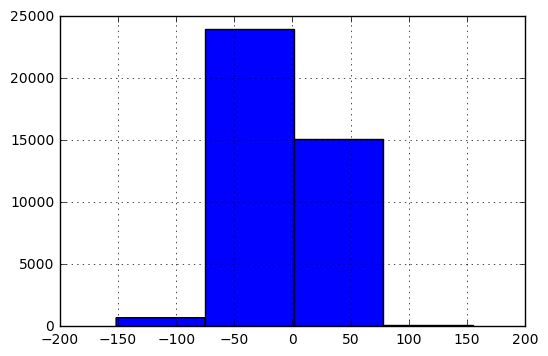

In [40]:
df.x7.hist(bins=4)

In [41]:
df.x8.value_counts()

 12.493912    1
 6.256564     1
 5.886793     1
-8.343999     1
-10.329122    1
-1.319840     1
 4.206403     1
 18.635550    1
 4.928556     1
-11.132305    1
 2.821642     1
 1.193176     1
-3.594425     1
 2.074957     1
-11.232400    1
-11.526121    1
-4.655240     1
-6.492888     1
 10.766749    1
-15.061010    1
-6.445601     1
-9.681592     1
 0.770722     1
 14.000114    1
 1.040437     1
-5.193802     1
-13.384645    1
-5.307696     1
 8.872733     1
-4.398552     1
             ..
 8.918965     1
 6.094021     1
-10.727149    1
 16.336701    1
 9.821496     1
 3.030624     1
 16.326035    1
-6.521939     1
-5.744934     1
 1.554524     1
 5.633988     1
-2.494946     1
-5.726752     1
-2.747958     1
-2.987098     1
 3.474663     1
-13.661013    1
 14.613184    1
-2.635421     1
-11.541522    1
 13.390096    1
-0.648965     1
 2.098581     1
 0.530668     1
-2.123577     1
 10.451691    1
 8.179388     1
-0.318739     1
-2.231922     1
 7.311731     1
Name: x8, dtype: int64

In [42]:
df.x8.describe()

count    39994.000000
mean         0.077270
std          8.904998
min        -35.584361
25%               NaN
50%               NaN
75%               NaN
max         40.395457
Name: x8, dtype: float64

In [43]:
df[df.x8.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1513,-0.220816,-4.479309,-6.228964,1.135547,1.994783,5.394194,-9.056446,16.575978,NaN,4.789265,...,2.916464,-4.644328,3.181024,-2.336496,-5.691226,-0.628596,71.019010,-1.738106,-0.675394,27.475799
7878,0.016699,-7.787469,-7.291102,-2.329441,5.729340,7.570772,-10.600714,-12.121893,NaN,-5.704826,...,4.954133,2.005147,-2.643836,-1.588640,4.017991,-0.453391,-24.154821,1.185071,1.199650,-14.387979
12125,-0.038383,4.420146,-5.611746,3.768951,7.134734,9.911649,-8.159058,-16.683266,NaN,-7.417890,...,-6.465228,22.904947,-9.016854,-2.582466,7.556700,-0.178068,-23.552051,-3.820137,0.480900,10.511320
14044,0.180254,7.939731,-6.546722,-11.062877,-1.741122,6.890560,-9.518441,25.933957,NaN,1.353762,...,19.778364,-14.025181,-3.836592,0.877575,-1.444137,-0.489215,-21.461228,3.400644,-0.561515,-0.287286
28458,-0.010810,4.794334,2.592316,-1.941519,8.716290,-6.365390,3.769033,-16.220716,NaN,-0.845153,...,-16.096964,-13.707043,5.266791,0.835372,3.196972,0.356533,53.807533,-4.094877,-0.173310,-10.976816
29845,0.015691,-0.717717,3.673934,-6.194175,1.421316,4.533308,5.341623,25.537619,NaN,-1.508824,...,13.197114,-3.174513,0.364185,-1.704407,-7.886403,-0.583348,-26.004757,4.103076,0.053775,-6.847692


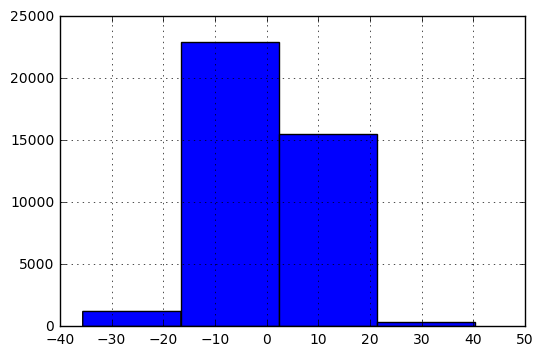

In [44]:
df.x8.hist(bins=4)

In [45]:
df.x9.value_counts()

 3.222543     1
-2.679263     1
 14.356498    1
-3.763026     1
-2.366480     1
 4.732105     1
 1.212072     1
 0.507040     1
 6.687578     1
-6.039750     1
 0.158676     1
-0.909759     1
-5.392468     1
 3.181174     1
 3.003175     1
 9.634959     1
-8.383862     1
 5.814630     1
 7.577978     1
-5.547249     1
 1.998070     1
 9.560184     1
-2.281350     1
-3.063910     1
-10.619011    1
 0.458830     1
-0.535133     1
 2.140033     1
 4.969068     1
-2.415326     1
             ..
 2.936324     1
-2.540914     1
 14.950431    1
-1.067504     1
 5.131075     1
 2.592971     1
 9.116018     1
 3.768525     1
-5.196176     1
-6.457281     1
-7.545104     1
 9.083169     1
 0.425218     1
-7.999440     1
-7.150936     1
 3.643062     1
-0.022489     1
 2.803798     1
 0.332189     1
-9.443243     1
 12.770709    1
-1.097651     1
-9.381125     1
-0.579305     1
-1.517317     1
 2.770894     1
-7.249479     1
-10.846976    1
-3.643991     1
 3.368434     1
Name: x9, dtype: int64

In [46]:
df.x9.describe()

count    39986.000000
mean        -0.022996
std          6.360036
min        -24.917306
25%               NaN
50%               NaN
75%               NaN
max         24.115795
Name: x9, dtype: float64

In [47]:
df[df.x9.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1918,0.419066,-3.636151,11.095365,-2.577955,-2.572511,9.579378,16.131828,-3.778630,-2.901834,NaN,...,3.183800,30.428191,-2.172858,-2.019832,4.469712,-0.435477,-57.286254,9.262668,0.895697,-25.099952
5131,0.327903,6.255738,1.956020,-8.175377,-2.415909,0.813739,2.843906,-17.746243,-11.405729,NaN,...,-12.801778,9.154526,-5.178862,1.144715,6.714887,-0.686597,-22.450283,4.099749,-1.985152,2.189639
12361,-0.416024,13.417671,-9.909915,-5.456914,-5.212329,9.705712,-14.408271,24.843474,-9.434487,NaN,...,-11.068633,-28.171107,-1.181982,-0.662824,-5.664884,0.149085,26.488857,-7.568895,-2.651550,30.511134
14290,-0.295425,6.322759,11.163097,12.146363,0.911682,-4.706131,16.230304,22.897776,-3.482148,NaN,...,10.359256,9.902703,-7.338605,2.194873,1.917526,0.050343,-120.031926,1.052892,-0.086920,-28.381101
14404,0.604733,-1.105335,-14.594809,2.939466,3.805433,6.657076,-21.219755,-13.108148,-4.472960,NaN,...,3.324190,-22.371071,-1.968585,-0.534000,2.227993,0.162626,-28.370711,0.707720,-0.599349,-23.204299
19000,-0.557737,-1.532818,-18.473964,17.354805,3.400413,-15.622607,-26.859756,-5.565812,-7.933982,NaN,...,8.836467,13.426970,-2.780026,0.646106,5.307795,-0.683674,-39.212511,-10.063932,2.182897,13.303091
25908,0.079932,4.306644,-10.850887,-2.322893,5.614635,-3.548991,-15.776374,-89.446568,-1.355083,NaN,...,-19.193160,-15.597246,-12.821894,0.022950,0.395608,-0.408225,28.417561,9.443587,-5.014135,-20.994665
26548,0.607081,2.067745,-16.135276,-11.419835,0.916527,-16.935263,-23.459478,11.736364,4.528452,NaN,...,-13.511391,-4.700899,-6.622244,-2.243087,7.903360,0.257936,-77.655772,4.946638,2.317028,-3.335106
29350,-0.409457,-1.297863,15.197605,-8.061906,5.190760,-7.095357,22.096176,35.737693,7.200800,NaN,...,38.060350,11.150077,-6.989890,-1.042442,7.130668,0.212405,-71.942119,-6.071907,0.709440,-25.640371
29874,0.077235,-10.676129,-3.717709,11.375716,-0.080427,1.029120,-5.405270,-31.417094,-1.038324,NaN,...,18.334325,18.113138,-6.902163,0.897553,-1.178251,0.206650,-4.139285,-7.398091,0.531373,4.922926


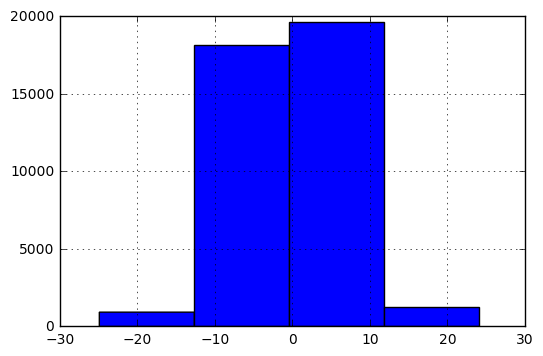

In [48]:
df.x9.hist(bins=4)

In [49]:
df.x10.value_counts()

-11.374458    1
-3.550244     1
 1.785947     1
-1.195311     1
-6.163682     1
-8.713393     1
-9.273969     1
-2.638374     1
 0.928465     1
 6.330445     1
-0.024984     1
 12.525713    1
 4.560475     1
 1.155367     1
-5.441942     1
-2.787724     1
 10.264662    1
 5.119342     1
 2.506378     1
-4.247903     1
 3.987405     1
-8.998884     1
-0.516797     1
 8.541479     1
 6.632489     1
-2.154340     1
-13.863249    1
-5.384885     1
 1.415824     1
-8.951473     1
             ..
 6.296730     1
-2.535079     1
-13.329642    1
 1.235037     1
-0.119362     1
-8.108936     1
 1.173956     1
 3.611362     1
-9.325279     1
-3.660962     1
 5.484394     1
-2.302886     1
 1.035508     1
 8.497029     1
-12.050574    1
-8.963622     1
-8.329032     1
 0.079428     1
 0.077350     1
 5.664187     1
-1.085699     1
-13.743526    1
 16.484081    1
-17.773123    1
-8.897570     1
-7.878683     1
-3.664973     1
-14.356887    1
-2.332990     1
-8.652203     1
Name: x10, dtype: int64

In [50]:
df.x10.describe()

count    39988.000000
mean        -0.033750
std          7.901212
min        -33.669863
25%               NaN
50%               NaN
75%               NaN
max         31.277143
Name: x10, dtype: float64

In [51]:
df[df.x10.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
915,0.243587,0.422778,-4.977244,-3.100527,-4.228400,-1.962530,-7.236539,25.756475,3.626085,6.532468,...,-7.515479,6.977608,3.210521,-0.673406,-2.778612,0.000429,-1.316019,-4.439394,0.264013,6.576992
1936,0.175956,4.636444,19.432836,-13.085454,-0.333705,9.426070,28.253884,-13.356717,1.675126,0.343967,...,-9.150360,54.896916,-1.941867,1.569607,-7.786803,-0.184338,-40.710323,0.322218,-0.072462,17.386879
4996,-0.001386,3.012566,3.139857,1.485852,15.781488,-4.206802,4.565115,4.320038,-16.741379,-0.182175,...,6.514835,17.883439,-7.975097,0.363615,-0.694397,0.345448,-62.447768,-4.519715,0.051602,-11.378332
11807,-0.311708,-3.452605,11.287602,11.323561,-2.359192,3.011422,16.411325,-2.371717,-7.997289,6.055187,...,6.231479,8.645654,2.039060,1.791543,3.128794,-0.362774,-1.377519,5.661409,1.481837,-9.383680
12087,0.266314,-7.399540,5.526983,10.228134,-2.684639,-5.620806,8.035818,0.380078,6.954943,1.294158,...,11.596570,37.966770,-2.343812,1.168202,0.187686,0.620424,-42.389597,0.148555,1.817309,7.634214
14725,-0.940682,12.816661,-17.469310,5.372038,-3.662710,24.571777,-25.399063,-42.085704,-20.062538,5.087044,...,7.051644,17.043782,-6.132802,-1.171467,-3.046950,1.136109,8.519786,-7.372743,2.394126,17.459189
23095,-0.015638,0.901160,-6.988786,12.847915,6.278792,-4.897683,-10.161170,35.071386,0.727535,-1.964230,...,14.620499,-10.484567,-1.141726,0.990439,3.644011,-0.181261,-26.194638,-1.116469,3.335558,-1.644874
23949,0.211560,-9.181003,-25.924382,-0.602044,-6.996890,-7.832659,-37.692103,24.129259,8.495655,-2.798511,...,9.048010,-15.062404,-6.733033,0.655792,0.465133,0.476336,-84.296697,0.359835,5.682816,-17.761561
27664,0.010040,0.310144,-6.328194,2.755916,-10.102775,15.812348,-9.200718,4.888378,-9.753877,-0.159572,...,-9.501492,5.390878,-3.147114,1.621957,0.005396,-0.068383,-35.210133,3.164726,1.419859,8.339935
29706,-0.195387,-6.501939,22.582575,-6.735697,-1.844094,11.101724,32.833367,-8.889164,12.609431,-4.816247,...,-13.142371,20.621072,-9.881076,2.679757,-4.030013,0.706541,-49.654995,-1.935619,-2.891419,-10.808742


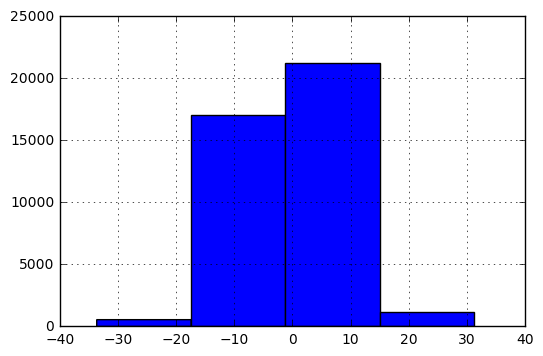

In [52]:
df.x10.hist(bins=4)

In [53]:
df.x11.value_counts()

-4.147235     1
 10.106420    1
-6.650239     1
-16.273828    1
 5.011094     1
-7.606517     1
-4.718820     1
-10.442003    1
 19.477611    1
-19.392183    1
 7.695477     1
 0.121743     1
-9.194321     1
-3.344168     1
 3.375936     1
-3.916505     1
-15.385500    1
 6.887797     1
 5.854032     1
 1.408715     1
 2.418057     1
 3.238627     1
 7.636371     1
-9.526251     1
 9.322752     1
 1.280179     1
-3.010942     1
-3.318659     1
 9.364828     1
-17.833332    1
             ..
 7.400046     1
 2.682681     1
 4.649567     1
 4.406257     1
 19.156556    1
 14.686078    1
-9.750129     1
-5.748464     1
-16.602057    1
 13.175877    1
-7.230305     1
 7.946180     1
-6.312719     1
-3.344993     1
-23.184874    1
 12.342759    1
 1.828905     1
 8.699676     1
 2.167117     1
-6.077453     1
-8.500053     1
 18.695627    1
 3.442250     1
 2.868570     1
-9.739272     1
 0.884678     1
-1.499065     1
-5.966556     1
-19.187012    1
-2.853277     1
Name: x11, dtype: int64

In [54]:
df.x11.describe()

count    39988.000000
mean         0.038280
std          8.759217
min        -37.325428
25%               NaN
50%               NaN
75%               NaN
max         35.232462
Name: x11, dtype: float64

In [55]:
df[df.x11.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4118,-0.507755,1.927502,-0.611174,3.149465,9.099251,3.599169,-0.888601,-27.606999,-0.206728,5.052721,...,-18.018100,24.869276,-4.030992,-0.623932,1.744621,0.285259,-18.969258,-3.015401,-1.631219,10.095109
6222,0.556259,1.876961,1.524273,-0.319820,9.349981,-4.533546,2.216179,-11.869309,-2.388552,7.649456,...,-9.625499,16.230551,-0.248706,-0.563110,-4.371976,0.095285,-32.217147,5.427469,0.867751,-2.062671
12112,-0.364796,12.151983,4.220665,-1.386722,5.236187,-2.264483,6.136530,0.881384,-16.287736,0.266362,...,15.259026,4.703887,-7.993231,-0.142241,0.757390,-0.392275,-28.227626,1.783190,-0.263529,-7.829284
13920,-0.058950,12.337329,20.050576,17.392250,9.076585,2.139929,29.152031,-4.992418,4.112492,9.656267,...,2.003680,37.347170,-1.001505,0.226657,-3.156353,-0.730496,-9.757505,-1.982033,-1.349439,19.530309
17563,-0.200958,-3.799917,16.249352,-0.659562,-1.995200,3.834120,23.625337,-2.782467,6.374360,10.088795,...,-0.804117,-25.782214,2.513451,1.768920,0.691948,0.554225,66.298848,1.827750,1.818450,-6.880805
20097,-0.087965,-6.147927,10.556928,-13.303939,3.328506,-0.205109,15.348980,18.915360,-11.219552,1.741094,...,6.923806,-1.443957,-8.927054,0.000036,-0.187947,-0.073568,-68.830753,6.206017,-0.969132,-21.720395
20378,0.533608,11.290331,-14.223775,2.610745,21.759081,9.171733,-20.680301,0.518574,8.143764,5.070665,...,-9.171089,-2.091354,-2.995648,0.373044,2.836671,-0.333030,-25.628712,8.949588,-1.059527,14.276623
27172,0.089366,4.495275,11.675174,3.295390,-2.998966,-6.225925,16.974826,-20.763425,-5.541078,10.263710,...,-12.814581,23.112565,2.864659,0.037215,7.238935,0.605558,-7.480595,0.807736,-2.091150,-7.103443
30126,-0.251005,4.260767,-2.411488,1.467423,4.732226,-5.165733,-3.506123,-3.529718,-10.378947,-4.086053,...,-1.018295,15.481351,-0.476187,1.708868,0.262510,-0.206982,8.864616,0.625188,0.737002,17.733822
31255,0.040851,10.777163,5.144420,6.125102,-7.058310,-4.035655,7.479600,-8.781729,2.022648,-3.908338,...,-7.163715,15.804935,5.598582,1.317047,-3.908921,-0.488647,49.780944,-2.479640,2.523424,12.361855


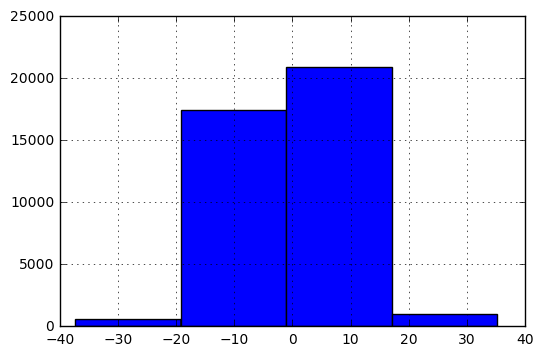

In [56]:
df.x11.hist(bins=4)

In [57]:
df.x12.value_counts()

 26.920189    1
-5.636483     1
-14.141282    1
 9.634452     1
-5.575339     1
-20.575440    1
 9.102275     1
 0.394593     1
-6.813332     1
 13.341769    1
-4.418127     1
 13.607679    1
-12.977254    1
-9.856572     1
 0.467373     1
 19.878881    1
-4.645128     1
 1.239049     1
-3.061038     1
 2.341163     1
 7.727524     1
-2.172999     1
-10.107494    1
-13.492696    1
-5.456506     1
 13.060367    1
 21.664458    1
-20.850519    1
-25.677019    1
 2.952123     1
             ..
 24.682458    1
-21.948730    1
 9.301091     1
 6.620278     1
-3.450890     1
-6.237757     1
-10.294517    1
-1.778619     1
 0.517699     1
 4.441534     1
 7.524570     1
 10.958390    1
 6.415632     1
 22.322091    1
 16.742838    1
-12.024856    1
-6.748413     1
-14.640347    1
-8.277683     1
-21.199378    1
-3.850960     1
 13.349435    1
-9.146278     1
-24.418746    1
 42.534304    1
-1.305511     1
 0.849432     1
 5.713146     1
-2.496380     1
 9.296639     1
Name: x12, dtype: int64

In [58]:
df.x12.describe()

count    39990.000000
mean        -1.297700
std         14.779090
min        -68.550472
25%               NaN
50%               NaN
75%               NaN
max         70.357695
Name: x12, dtype: float64

In [59]:
df[df.x12.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
31,0.359237,5.181104,-4.619430,0.382523,-8.476027,-0.413589,-6.716305,-4.276672,-1.528976,-1.759066,...,-5.058938,8.455196,3.646277,-0.651850,4.683005,-0.258369,43.731806,1.481998,3.191005,19.409465
1585,-0.200724,3.496516,13.112448,1.437191,2.066207,-3.774563,19.064513,17.586734,-3.428436,-1.871572,...,-29.387975,-7.679455,11.750468,-1.113054,2.429635,-0.027649,45.070472,-7.951429,-1.416602,8.577762
5986,-0.030226,7.776312,2.966708,4.774898,-6.723134,-1.991885,4.313370,-52.099077,-12.191077,-6.872606,...,-38.824117,12.074988,-6.038215,-0.081103,5.040024,0.216821,33.558152,12.875184,-1.867232,7.993057
13579,0.159104,-0.986270,-1.889895,2.503146,-3.585041,-7.953945,-2.747765,27.294574,-14.468997,-2.922642,...,8.825586,-17.714818,-1.537781,2.655911,8.473986,0.490150,-72.078024,2.591172,0.967673,-35.169734
16125,-0.174266,2.847768,8.614468,6.298551,-6.993038,-1.659935,12.524789,-65.447550,10.375636,-14.154174,...,-17.123708,47.117700,-9.658014,-0.847094,5.860088,0.085074,-11.996324,3.023289,-0.774228,4.435780
26691,-0.213530,-4.122062,-9.373428,-21.447482,-1.745503,-9.974280,-13.628261,-1.803963,3.896652,-7.982566,...,25.969700,4.969223,-1.542733,0.331430,-1.045323,0.343029,18.853308,4.650827,2.426061,11.910792
26986,-0.122460,5.363761,6.014353,-1.777627,-5.674012,2.460921,8.744417,15.688898,-7.052243,-2.692544,...,7.580803,-8.206513,0.771879,-0.128212,9.866125,-0.154761,17.424237,-3.139890,-1.018605,8.281689
28701,-0.441896,10.649721,1.546490,12.341487,1.312870,-6.755711,2.248481,9.365190,-10.203313,-7.784747,...,-20.698958,-1.272454,4.027709,1.556233,4.592548,-0.091716,3.189956,1.072131,-3.962520,18.978291
35700,0.402870,15.312947,-8.099315,-4.915916,2.810008,-4.331854,-11.775796,-0.981367,2.022878,-1.493340,...,-6.166131,10.966671,-2.884603,-0.000344,1.837099,-0.066760,8.523453,1.108291,1.685417,18.672302
36593,-0.374931,-3.617431,0.457180,-0.912569,-2.771143,8.739464,0.664705,-31.016481,-6.479051,-3.975636,...,-3.232612,9.810765,4.917396,-0.817153,-2.480671,-0.536236,39.387372,3.107688,-1.352525,-9.280498


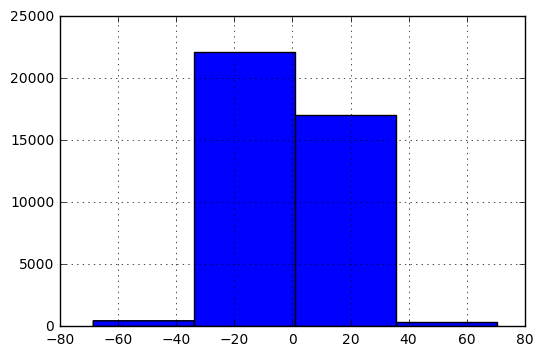

In [60]:
df.x12.hist(bins=4)

In [61]:
df.x13.value_counts()

-2.076227     1
 3.211994     1
-0.688857     1
 3.110658     1
 10.813464    1
 14.729224    1
-1.499722     1
-21.329981    1
-3.052610     1
 4.428500     1
-12.880654    1
 2.449560     1
-7.886831     1
-1.507097     1
 8.865111     1
 8.428981     1
-3.785792     1
 5.020833     1
-4.705559     1
 11.509234    1
-6.274044     1
-8.919068     1
 7.494081     1
-12.932772    1
-6.337418     1
 13.088435    1
-6.033617     1
-2.065082     1
-9.495454     1
-17.360285    1
             ..
-6.546755     1
-8.864519     1
 4.881916     1
 2.528149     1
 1.507248     1
 0.492214     1
 8.511427     1
-11.331899    1
 6.714565     1
-6.173184     1
 8.316790     1
 1.695309     1
 19.426656    1
 9.739989     1
 8.951777     1
-3.792910     1
-11.201657    1
 12.494250    1
 2.332640     1
-2.044684     1
-8.382554     1
 6.116547     1
-1.438284     1
-3.480008     1
 4.076885     1
 4.123303     1
-10.617573    1
-8.361951     1
 13.179737    1
-12.875274    1
Name: x13, dtype: int64

In [62]:
df.x13.describe()

count    39993.000000
mean         0.084444
std          8.934604
min        -40.021131
25%               NaN
50%               NaN
75%               NaN
max         37.570111
Name: x13, dtype: float64

In [63]:
df[df.x13.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
12678,0.329614,4.372870,32.804649,-14.374520,-8.321593,1.005158,47.695494,-40.354874,13.214156,-8.213383,...,20.837410,45.529980,-4.323644,-1.116555,-6.221849,-0.082398,34.164182,1.117126,-0.730227,-5.856071
14262,-0.317425,2.623215,5.300083,13.359463,-11.370100,8.467460,7.705922,42.726596,7.646544,-2.127347,...,19.725121,-36.315315,8.919766,0.578358,2.712955,-0.742926,35.886233,-1.439710,-4.427183,-3.964834
18700,-0.149984,-2.160745,-3.772169,-10.028442,5.721987,-5.811985,-5.484450,-44.431496,0.676809,1.420072,...,-22.426123,-5.088522,-4.990058,0.212077,-0.286089,0.173019,4.901634,0.413384,-1.080476,-14.018218
19166,-0.225292,2.915545,3.906286,-2.145621,8.535689,-1.589054,5.679447,0.385314,29.897578,-1.568330,...,-19.781915,11.751928,6.304384,1.061820,-2.218948,0.143363,-35.714414,1.550447,-3.134855,9.929139
20243,0.207160,8.689474,2.552431,6.179806,-1.430829,-6.639219,3.711043,-47.320949,8.405820,9.480080,...,-25.058845,47.365736,3.582542,0.602360,1.755638,-0.120596,-52.999927,-2.273525,2.124092,-1.191851
23760,-0.342074,-12.247971,-1.690626,-6.604177,-0.037451,9.696256,-2.458043,-36.041926,-4.340172,-2.079491,...,-4.837487,23.150332,-1.297378,2.258456,6.797072,-0.706215,23.911735,-6.168784,1.902464,13.842130
24770,-0.699893,11.830002,-18.131631,-8.337487,-17.589131,-7.188206,-26.362029,-30.068611,2.584371,4.345911,...,-31.962105,12.242962,-8.825438,1.554250,3.198004,0.206871,-69.185069,-8.105826,3.621365,9.654822


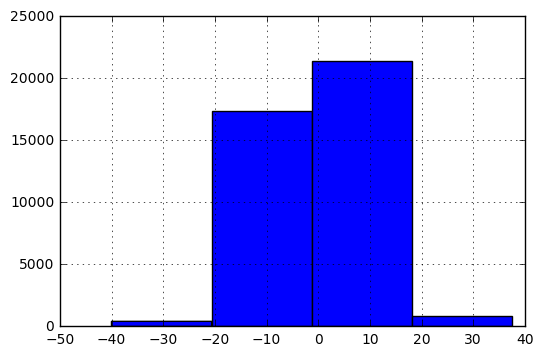

In [64]:
df.x13.hist(bins=4)

In [65]:
df.x14.value_counts()

-3.763814     1
 12.854885    1
-9.673741     1
-11.975918    1
-1.362198     1
-13.830301    1
-9.315232     1
 4.235647     1
 5.821230     1
-8.019961     1
 7.991391     1
 3.327526     1
 6.599773     1
-14.969719    1
 6.376279     1
 8.112606     1
 1.701225     1
 11.085051    1
-8.779221     1
-5.965744     1
 0.192482     1
-6.993868     1
-0.893785     1
-7.957476     1
 0.793610     1
 5.816031     1
 10.663494    1
 9.060539     1
-5.704315     1
 5.139952     1
             ..
 2.506522     1
-6.980960     1
 7.013862     1
 4.194690     1
-7.267482     1
 3.314264     1
 2.998295     1
-2.759518     1
-4.661466     1
-0.612719     1
 0.211160     1
 7.718045     1
-0.267998     1
 4.943791     1
-15.944364    1
 7.576650     1
 5.797760     1
 10.190955    1
 4.623500     1
 12.595423    1
-5.693790     1
 5.818035     1
-12.644216    1
-7.077199     1
 9.221072     1
 2.794472     1
 2.179917     1
 13.277102    1
-12.459795    1
-3.638182     1
Name: x14, dtype: int64

In [66]:
df.x14.describe()

count    39993.000000
mean        -0.027313
std          6.936513
min        -28.356103
25%               NaN
50%               NaN
75%               NaN
max         33.145559
Name: x14, dtype: float64

In [67]:
df[df.x14.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
13824,-0.022061,-18.679731,41.487333,-3.664695,-1.302771,-10.084952,60.319465,38.522862,-5.874521,1.733539,...,33.143755,16.439633,-6.903919,0.913996,0.584948,0.299422,-85.712209,5.001803,-2.073442,-41.725103
14395,0.020611,4.010357,-5.702681,-2.620831,7.943584,-1.348606,-8.291270,-17.517053,20.490897,-11.218889,...,-3.377541,7.959738,-6.795198,1.069312,3.168230,-0.387540,-55.940072,1.862969,0.738646,-19.410995
14396,-0.331554,-2.132506,27.261173,3.829777,-6.131377,-5.988865,39.635697,-8.909421,-6.321254,9.050093,...,5.778629,38.873908,4.562670,2.747061,-8.185483,-0.011176,40.066040,3.198004,-2.274320,7.096111
15636,-0.174264,-6.414656,-1.505362,-1.780140,-0.043663,1.814136,-2.188684,-19.408319,-14.338942,-3.234297,...,-11.122298,12.537522,-2.589399,1.446814,2.009011,0.307577,-30.629950,-2.270439,-1.650847,-10.988712
21856,-0.844414,7.311811,3.198490,-1.457047,-13.257978,0.899654,4.650364,-9.068794,5.728687,4.143940,...,-6.339876,-0.510738,-5.079541,-0.688926,1.157196,-0.387465,-43.929512,-7.989031,0.836312,0.441108
33109,0.090634,2.556637,13.155733,4.820176,15.723677,5.020386,19.127448,-8.879380,5.441869,-1.707967,...,-6.455267,18.966448,4.844931,-2.033797,5.640114,-0.035721,-6.473646,-2.985971,-2.717815,-20.929765
36959,0.835639,11.382504,-15.787057,-0.447418,-0.675751,29.000508,-22.953194,-21.276957,-4.231508,-7.677536,...,-10.995587,-31.421580,-5.198739,1.126475,2.738568,-0.487612,-42.618954,-3.129422,-1.895729,-34.800973


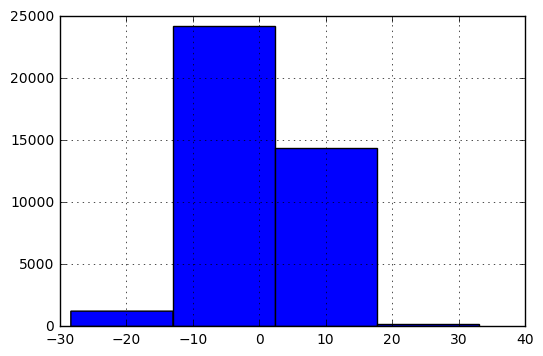

In [68]:
df.x14.hist(bins=4)

In [69]:
df.x15.value_counts()

-1.440217    1
-0.220664    1
 2.578312    1
 3.299025    1
 1.795654    1
-2.432319    1
 1.736955    1
 2.914803    1
-2.239465    1
 3.664198    1
 2.057126    1
 2.481680    1
-0.736776    1
 2.813517    1
 1.654181    1
-0.920908    1
-4.031831    1
 4.136823    1
 0.022126    1
-6.441935    1
-3.344700    1
 3.417389    1
-3.693349    1
-2.633454    1
-3.101945    1
 8.175058    1
 1.120649    1
 4.195617    1
 5.396640    1
-6.056044    1
            ..
-2.851905    1
-0.001625    1
 3.669305    1
 2.805888    1
-1.638895    1
 1.227119    1
 4.782269    1
-2.798765    1
 0.027590    1
-6.608585    1
 2.827500    1
 3.364871    1
-4.594338    1
-1.078164    1
-0.020078    1
-1.803849    1
-2.006022    1
 1.415206    1
 3.750169    1
-3.089679    1
-0.040978    1
-7.175347    1
 3.134360    1
 2.821057    1
-1.850591    1
-1.307247    1
 4.900413    1
-0.884878    1
-3.242051    1
-1.300707    1
Name: x15, dtype: int64

In [70]:
df.x15.describe()

count    39988.000000
mean        -0.004680
std          3.281564
min        -13.642554
25%               NaN
50%               NaN
75%               NaN
max         13.013490
Name: x15, dtype: float64

In [71]:
df[df.x15.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3167,-0.391979,-7.184145,-1.781373,-1.878833,-2.900312,-5.240312,-2.589982,-6.503297,-1.634455,13.615330,...,13.516146,6.497018,-5.137022,-0.163015,6.312364,0.156695,-43.681995,3.347096,-0.178374,-12.818719
6771,0.002501,-0.898611,-3.377680,-7.722929,-10.074109,3.507379,-4.910892,-30.448679,-12.723457,-0.770306,...,20.459830,35.957081,0.071176,-0.810886,-0.220125,0.152359,10.610858,1.480634,0.770995,6.348285
7232,0.097146,5.307722,-7.290582,5.883521,4.530605,3.015965,-10.599958,-7.946611,-2.967396,-4.892183,...,16.315177,8.912697,-1.373788,-0.409645,1.972814,-0.307302,-22.739766,-4.483190,0.043050,-5.828917
9992,-0.046187,2.160868,-11.169235,2.361682,6.534862,2.039901,-16.239228,-4.034168,-1.549628,9.875631,...,21.519935,0.950706,-13.404313,0.136864,0.225202,-0.049342,-46.889810,2.004227,-0.787348,-6.852994
10546,0.581864,6.861644,3.794585,5.233924,0.570420,9.261728,5.517041,26.998609,11.447654,-5.676937,...,4.774289,9.778054,0.801012,-0.194231,-3.948390,0.206407,-27.112627,1.715174,1.108408,-7.496152
15569,-0.039274,7.102037,15.590300,6.128127,-9.061727,2.436375,22.667125,14.539085,-7.108624,-5.560714,...,36.768517,14.558976,-5.985456,-1.528867,-2.868752,0.005637,-39.836099,1.710167,2.269574,-12.371851
15919,0.536286,-4.339571,-6.506832,8.107498,-1.472256,-6.267603,-9.460445,-12.277951,6.190817,12.798253,...,-14.397784,1.831987,-4.870990,-0.262989,-1.477817,0.079619,-37.266783,4.555989,-0.662681,-5.308198
32753,-0.641969,4.070370,30.611268,4.396639,3.873061,-10.302057,44.506483,11.418785,8.761820,-0.399495,...,-2.881928,47.332193,12.063406,3.733828,4.480033,0.379627,25.886968,5.166865,-1.350038,6.839909
33054,-0.002377,4.413915,7.544312,-13.646417,-5.007683,-2.733088,10.968863,50.923986,7.571985,5.965526,...,36.073656,-5.416733,-4.135433,0.880330,-4.220798,-0.321581,-54.983444,-1.717809,0.733685,-2.395752
33270,0.299168,-3.540263,-7.741715,12.252876,8.094815,5.641605,-11.255872,-16.288767,7.721566,9.021659,...,-4.458799,3.646660,-7.208198,-1.614153,-7.122320,0.667048,-7.197543,-4.268650,-0.853432,4.760747


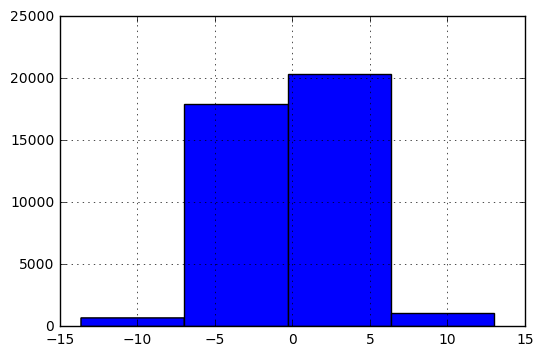

In [72]:
df.x15.hist(bins=4)

In [73]:
df.x16.value_counts()

 0.292269     1
-3.922766     1
-1.033895     1
 7.682557     1
 4.330265     1
-2.383397     1
-2.434936     1
-0.738650     1
 6.234939     1
-7.464959     1
-5.955178     1
-5.894001     1
 2.975222     1
-2.473820     1
 2.351303     1
 5.559497     1
 1.628350     1
-3.094254     1
-3.390019     1
 3.442864     1
 12.112019    1
-0.203823     1
 0.438135     1
 1.054113     1
 7.206094     1
-1.136513     1
-2.947375     1
 0.947883     1
-4.366005     1
 2.372341     1
             ..
 2.959610     1
 1.378130     1
 10.561128    1
-0.040349     1
-0.060499     1
 0.398576     1
 2.876146     1
-9.140853     1
-1.409071     1
-5.544981     1
-3.101972     1
-4.549886     1
-2.078742     1
-1.876817     1
-3.460756     1
-2.267739     1
 4.744510     1
-0.167535     1
-6.297353     1
 5.343753     1
 3.451415     1
 1.401861     1
 2.604702     1
-6.782933     1
-2.089399     1
-2.095823     1
 1.632065     1
-0.605679     1
 4.918685     1
-1.863346     1
Name: x16, dtype: int64

In [74]:
df.x16.describe()

count    39997.000000
mean        -0.035420
std          4.981285
min        -19.997728
25%               NaN
50%               NaN
75%               NaN
max         19.572370
Name: x16, dtype: float64

In [75]:
df[df.x16.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
11210,0.405934,-1.190076,9.227567,10.718136,4.433192,6.511550,13.416189,24.307188,16.214473,0.705273,...,26.465056,1.335016,-3.485217,-1.168239,1.122078,0.297164,-47.945920,4.257073,-1.836300,-13.629009
29444,0.412783,1.589673,9.575166,3.710953,-14.907504,0.775744,13.921572,1.979291,-5.820248,4.421402,...,-0.748151,1.983866,-3.593771,0.489554,8.158265,-0.234934,-35.715557,0.673551,0.143263,-12.012194
37199,0.420283,-2.258921,-4.338943,0.291089,-6.567998,7.438440,-6.308497,3.773350,8.601879,9.977172,...,-5.879488,5.378424,-6.199110,-1.434500,1.670087,0.013605,-92.151686,6.517521,1.304096,-20.159689


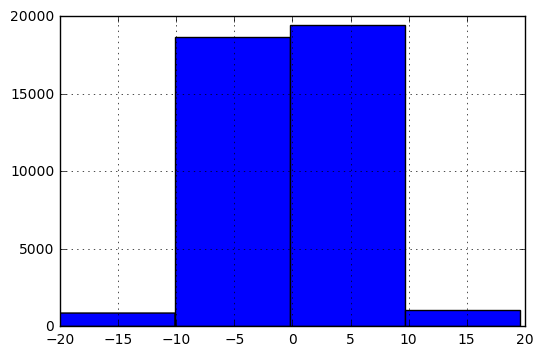

In [76]:
df.x16.hist(bins=4)

In [77]:
df.x17.value_counts()

 0.511912     1
-1.696162     1
-5.571904     1
 0.311011     1
 13.724645    1
-7.380967     1
 17.356718    1
 6.346884     1
-7.479922     1
-0.113289     1
-6.880942     1
 1.864611     1
 3.706464     1
-12.547998    1
 2.608397     1
-8.027029     1
 0.126652     1
 3.785667     1
-0.751437     1
-0.209127     1
-2.548465     1
 0.700737     1
 2.925814     1
-20.324940    1
 10.480975    1
 5.355191     1
 1.024973     1
-0.063597     1
 0.477504     1
-0.083943     1
             ..
-9.660572     1
-10.568035    1
-3.869842     1
 6.451771     1
-5.337774     1
 7.619878     1
-0.871829     1
-2.749510     1
-4.508790     1
-0.720438     1
-18.398475    1
 5.047457     1
 0.697881     1
 3.584937     1
-3.723559     1
 3.526054     1
 2.364394     1
-6.930512     1
 4.077438     1
 2.854021     1
-13.058318    1
 10.805547    1
 3.387693     1
-2.377278     1
-2.742517     1
 3.390570     1
 10.130969    1
 13.032841    1
-6.898580     1
-16.147491    1
Name: x17, dtype: int64

In [78]:
df.x17.describe()

count    39996.000000
mean        -0.007395
std          7.581508
min        -31.514527
25%               NaN
50%               NaN
75%               NaN
max         31.622070
Name: x17, dtype: float64

In [79]:
df[df.x17.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
11754,-0.627727,5.387064,-13.591008,5.856773,2.411782,0.397575,-19.760304,-24.535746,-7.606807,-1.070309,...,-19.664003,2.151710,-2.485144,2.165645,3.695864,0.222098,-30.581179,-2.819657,1.994904,3.522373
30846,-0.293601,-6.208726,-5.395273,-8.438582,-8.625993,5.382236,-7.844321,-62.265786,6.609479,-7.139379,...,-10.784307,32.266751,-9.074490,-1.050937,-5.602877,-0.111280,9.952032,-1.567427,1.706126,12.769068
37300,-0.614775,1.280671,0.624693,-5.466590,-6.459423,-2.388065,0.908257,-19.259004,-12.596056,-0.852915,...,-14.638792,19.794571,1.614848,0.153353,-3.076629,-0.217970,-35.394904,0.328912,2.603657,-0.165277
38621,0.606461,-7.232815,23.572150,1.067426,-5.472911,0.336664,34.272136,36.172834,7.877672,4.528000,...,23.158065,-4.961802,-4.365679,1.410933,-7.215811,0.353163,-4.703892,-7.402957,-5.269785,5.206038


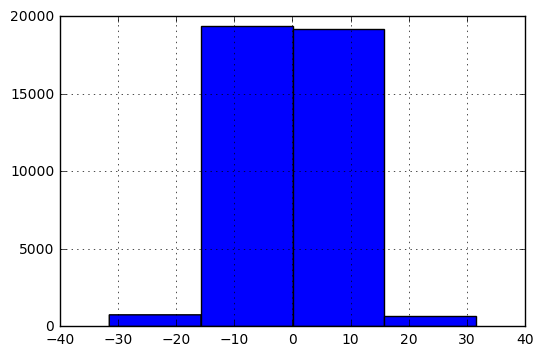

In [80]:
df.x17.hist(bins=4)

In [81]:
df.x18.value_counts()

-1.745193     1
 4.460271     1
-5.655244     1
-3.976017     1
 3.769303     1
-2.386383     1
 5.421437     1
-2.222250     1
-1.984633     1
-8.041369     1
-2.784652     1
-0.331676     1
 0.253387     1
 1.925582     1
-5.138476     1
-1.855471     1
 1.327896     1
-2.292026     1
 3.695451     1
-8.377075     1
 0.765048     1
 4.576228     1
 0.299330     1
 5.660495     1
-4.503520     1
-8.017286     1
-2.765531     1
 5.406861     1
 6.106168     1
 4.390407     1
             ..
 2.881435     1
 4.344597     1
-1.118143     1
 1.874472     1
 6.590477     1
-2.579057     1
 1.203757     1
 4.642135     1
 7.903566     1
-1.950706     1
 7.309095     1
-5.445194     1
-0.044545     1
-1.327321     1
 2.142338     1
-5.993629     1
-2.026993     1
-0.529912     1
 4.495514     1
-4.153531     1
-6.368856     1
 12.366408    1
-1.468517     1
 2.549189     1
-4.732622     1
 4.825486     1
-0.140662     1
 0.468836     1
 0.576700     1
-0.914216     1
Name: x18, dtype: int64

In [82]:
df.x18.describe()

count    39991.000000
mean        -0.002593
std          4.538995
min        -21.037245
25%               NaN
50%               NaN
75%               NaN
max         20.830313
Name: x18, dtype: float64

In [83]:
df[df.x18.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
2420,-0.271079,7.243872,3.436671,-4.545971,-0.261365,0.313259,4.996661,-20.948994,5.955006,12.078890,...,-28.914123,24.305257,4.911560,-0.088106,2.361412,-0.294250,6.942288,2.713970,-3.008085,6.890393
3455,-0.300603,-8.586692,6.832009,3.501150,-6.412542,-1.798267,9.933228,-9.906652,2.131566,-17.644772,...,-19.035707,15.948457,-5.176117,0.541045,-0.062851,-0.167726,-24.570172,-4.379766,1.045613,10.209357
4537,1.190229,-5.370059,5.584394,-6.502739,6.883252,-8.190125,8.119289,-39.644995,12.638449,3.760866,...,-22.463166,37.395200,3.451149,-1.970380,3.486408,-0.353989,16.995462,2.674119,-0.109936,0.066536
4644,-0.282870,-1.886832,-3.784368,-6.208588,6.643175,-0.256372,-5.502187,-51.454164,5.196142,4.824704,...,26.563128,32.511609,-10.850963,0.209095,1.027673,0.053211,-9.548927,-0.118561,0.661489,7.175969
7032,0.070888,2.131377,-23.854690,-1.029999,-7.746778,-6.509183,-34.682927,22.231411,10.266453,3.735826,...,-2.516054,-29.935667,-1.933398,-0.533792,7.102174,-0.045402,-41.181943,-9.988518,2.579069,-1.777483
10954,0.978325,-5.658839,0.069591,-3.414883,1.761474,10.259736,0.101179,-5.558685,-9.741952,-1.800930,...,-3.894249,-19.548996,-4.358204,0.882457,-3.730374,0.501402,-14.522101,2.833733,1.243064,-8.732262
17935,-0.359462,9.286230,-6.381712,-1.909878,5.072875,-0.384847,-9.278530,2.852807,0.469237,-3.154661,...,-0.687704,-14.713747,-5.089287,-1.490811,-1.624987,0.190029,-9.362154,-2.385800,-0.094201,-10.091511
21458,-0.527734,1.674276,-18.829523,-4.970440,4.006123,4.465277,-27.376711,25.472867,-10.750581,8.279641,...,14.960652,-13.115472,0.557584,-0.955764,0.598996,0.308587,-30.044015,0.026206,3.947636,-4.854959
25567,0.716889,-4.115296,21.531195,-12.523640,2.211581,12.819613,31.304740,-15.371093,22.170661,-3.426079,...,-0.630943,20.227742,-2.459881,-0.315970,0.602020,-0.191518,-61.142107,-2.191452,-0.962852,-36.998298


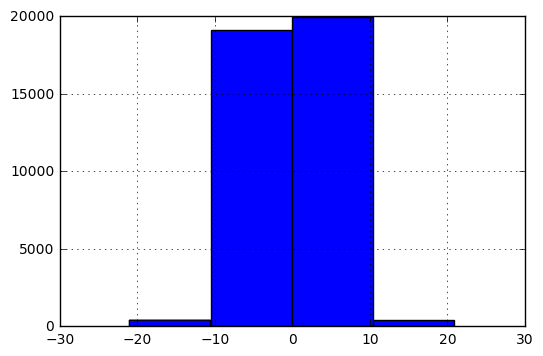

In [84]:
df.x18.hist(bins=4)

In [85]:
df.x19.value_counts()

-4.090399     1
-8.732591     1
-7.898005     1
-7.051970     1
-7.028197     1
 18.249020    1
 7.365289     1
 2.672035     1
-9.593156     1
-13.285057    1
-3.934677     1
 2.276876     1
 1.159178     1
 13.175418    1
 5.547361     1
-2.427044     1
 11.926451    1
 9.362810     1
-0.727025     1
-2.540190     1
-3.595640     1
 7.043065     1
-10.171769    1
-1.231102     1
 2.398180     1
 4.305063     1
 3.747842     1
-0.205733     1
 1.707549     1
 2.012100     1
             ..
-3.488218     1
 2.726655     1
 6.599999     1
 2.226148     1
-4.278329     1
-14.196716    1
-5.564582     1
 4.399088     1
-4.363769     1
 0.259924     1
 3.365855     1
-7.842546     1
-7.069602     1
-16.892270    1
 4.924884     1
-5.166946     1
-1.548264     1
-2.341216     1
-22.722852    1
-11.875670    1
 8.116025     1
-3.808421     1
 3.037251     1
 4.386161     1
 11.454050    1
 4.870570     1
 4.425385     1
 4.344111     1
-6.605304     1
 4.721003     1
Name: x19, dtype: int64

In [86]:
df.x19.describe()

count    39992.000000
mean         0.065209
std          7.628984
min        -28.996129
25%               NaN
50%               NaN
75%               NaN
max         31.667784
Name: x19, dtype: float64

In [87]:
df[df.x19.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5700,0.030410,-1.752259,4.418410,-1.912498,1.332495,2.376350,6.424037,45.934899,-9.330415,2.323540,...,5.225593,3.556678,3.021604,0.405727,-1.237603,-0.898443,12.251343,12.654432,0.963931,9.392192
17706,0.430611,-5.855524,-14.428185,-0.937066,-0.826302,-4.256441,-20.977497,21.072308,5.594341,-0.250616,...,26.347188,-7.907569,-1.984054,-0.245204,1.704733,-0.621424,-17.208101,5.949426,3.042737,17.119240
21059,0.282182,-3.896360,-19.428923,-15.075480,6.088417,-2.363637,-28.248194,-43.186605,-0.805904,1.882641,...,-6.624461,-5.045136,-10.122609,-0.776264,-2.452079,0.385187,-0.767096,-5.716953,-0.915076,9.607302
22910,-0.626931,3.270945,12.270704,2.803566,-8.520138,5.768776,17.840682,11.291130,-13.814527,13.459109,...,12.841481,-4.950881,4.649973,0.384284,6.761210,0.535002,14.755007,-3.953667,-0.919954,-6.023985
30051,0.177291,7.234447,-22.434268,8.767124,3.717480,-3.165848,-32.617740,-15.349662,6.872689,-3.805856,...,24.751919,8.553899,-7.835133,2.343835,4.510884,-0.007031,-33.798220,-4.175529,3.273499,8.554151
36301,-0.277421,2.806241,-16.439112,-8.481233,-4.895948,-5.433318,-23.901233,-3.033852,6.292608,-2.405366,...,-12.901445,7.425000,-2.213376,-0.326736,5.913904,0.395560,-29.277492,-2.255108,2.043421,14.243845
38312,-0.316633,-12.179921,11.372892,-3.755091,-1.841710,-4.175120,16.535331,-12.060243,-10.906016,-3.785717,...,11.156116,13.476696,0.725219,-1.363330,3.921917,-0.056088,3.167410,4.213240,1.373437,-12.711046
38786,0.135455,-3.753925,6.672305,1.548255,-7.289868,12.805711,9.701031,15.381297,-0.281964,-4.594284,...,4.181368,-4.019983,-4.283835,-0.911348,-5.379700,0.349283,-37.321137,0.416521,-4.326003,-6.257135


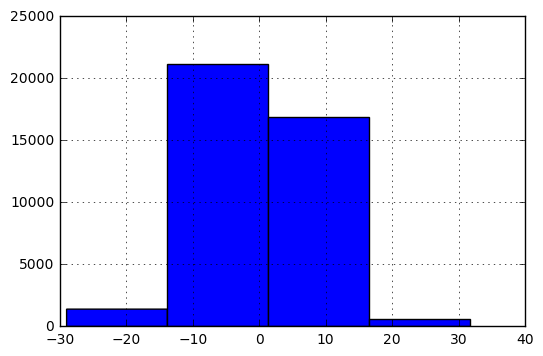

In [88]:
df.x19.hist(bins=4)

In [89]:
df.x20.value_counts()

 7.454606     1
-8.629862     1
 5.595826     1
-0.932154     1
-11.702692    1
 2.399139     1
 1.396446     1
-3.837719     1
 7.787942     1
-0.064225     1
-5.594849     1
-0.448107     1
 0.709847     1
 13.491824    1
-10.987236    1
 2.790745     1
 6.354417     1
-0.157677     1
 2.800569     1
 4.727281     1
-14.327523    1
 4.107652     1
-5.573086     1
 2.313676     1
-3.010330     1
 1.165571     1
-8.181379     1
-11.545572    1
-4.885743     1
-4.783976     1
             ..
-1.864527     1
-4.900077     1
-0.323712     1
-0.076911     1
-3.833916     1
-10.541521    1
 0.412294     1
-0.389813     1
 2.471791     1
 8.526239     1
 3.536271     1
 1.817087     1
 6.037061     1
-2.393896     1
-6.110851     1
 8.828863     1
-3.809098     1
 10.258825    1
 0.439188     1
 18.465823    1
-5.587258     1
-7.023144     1
 1.756499     1
 1.251711     1
 9.162099     1
 0.910493     1
-0.044369     1
 1.594161     1
-1.208574     1
-1.725571     1
Name: x20, dtype: int64

In [90]:
df.x20.describe()

count    39995.000000
mean         0.284760
std          5.798463
min        -27.552319
25%               NaN
50%               NaN
75%               NaN
max         24.408743
Name: x20, dtype: float64

In [91]:
df[df.x20.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1340,0.622038,6.633118,8.923917,-4.185168,-2.310670,-8.268091,12.974705,18.460781,-4.533586,0.135697,...,-10.347192,-2.773545,-6.222872,0.443149,-3.104682,-0.188109,-70.443093,-1.638876,-2.507124,-6.766557
10038,-0.029565,-1.348424,6.024238,6.244706,-1.098204,-7.706126,8.758790,73.416810,-0.151899,-8.036189,...,12.750155,-21.851018,-6.149401,-1.082332,2.244933,0.220168,-88.247786,0.953561,-0.860775,-10.640470
11114,0.259625,0.635303,-0.655295,13.181141,2.718016,3.776823,-0.952750,-49.680017,-2.819279,-14.845908,...,-4.530839,39.691056,-2.852492,1.763486,-2.463745,-0.293484,3.081682,7.492411,1.070290,15.556725
23406,-0.447991,-3.277567,-16.173171,-6.626948,8.069517,-16.008400,-23.514576,-11.421254,0.889097,1.883468,...,-13.306126,-7.807284,-5.489371,0.586797,8.114841,-0.240668,-42.895977,2.089515,0.950376,6.295511
27056,-0.067619,-6.886950,-10.992261,0.044084,-8.655344,-3.312607,-15.981921,-10.400125,-5.101690,2.045132,...,-27.857229,-13.825718,-6.239296,-1.213668,-0.819522,-0.590039,-39.093169,-5.386171,-3.035703,2.021807


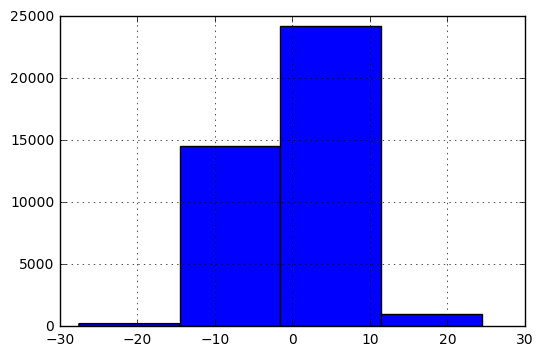

In [92]:
df.x20.hist(bins=4)

In [93]:
df.x21.value_counts()

 7.369204     1
-5.311867     1
 4.113405     1
 20.312457    1
 11.394325    1
 8.975437     1
-2.123250     1
 1.275036     1
 10.947185    1
 8.161396     1
 6.276274     1
-15.086766    1
 11.426444    1
-0.645974     1
 5.106238     1
 1.988058     1
 3.385357     1
 17.117896    1
 7.258226     1
 7.008402     1
 11.058872    1
 7.620566     1
-2.632322     1
-0.130001     1
-1.016031     1
 11.026722    1
-2.744184     1
-6.371475     1
 7.789777     1
-0.945673     1
             ..
 8.673777     1
-6.026876     1
-17.138820    1
-12.703925    1
 4.391847     1
-4.154552     1
 9.464732     1
-1.583905     1
 0.212627     1
 15.543491    1
-7.871886     1
 2.276152     1
 6.390258     1
 11.679613    1
-4.414506     1
 0.138661     1
 0.658218     1
-12.863836    1
 20.330784    1
-6.576856     1
-4.495229     1
-1.930301     1
-1.742461     1
-12.363024    1
-14.059923    1
-9.188784     1
-5.665015     1
-11.931800    1
 0.136825     1
 10.868626    1
Name: x21, dtype: int64

In [94]:
df.x21.describe()

count    39992.000000
mean         0.044133
std          9.461266
min        -38.763340
25%               NaN
50%               NaN
75%               NaN
max         42.742381
Name: x21, dtype: float64

In [95]:
df[df.x21.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
396,0.450952,-1.014944,-12.299507,-9.603972,5.946021,4.388750,-17.882559,-22.772679,4.386124,-3.862643,...,-12.257402,4.404482,0.334554,-0.575795,-4.431077,0.826665,49.922964,-3.468746,3.074587,20.981209
2196,-0.070487,-1.496788,34.994061,-3.899176,9.547714,15.476633,50.878735,25.304283,14.105914,-4.192005,...,-7.095620,38.920598,12.974922,0.729538,-2.857260,0.249574,35.983944,4.257079,-2.495826,2.251346
4243,-0.013844,2.688516,18.088450,0.364477,-0.999510,5.993601,26.299247,12.455175,4.613616,-4.496637,...,4.130827,-21.629109,5.763118,2.317572,-1.957125,-0.404313,29.446541,-0.356994,-0.951916,-5.002305
4729,-0.298973,1.597704,-13.316744,-7.515078,8.569027,-2.669417,-19.361545,14.601514,-3.326695,-6.532839,...,10.630276,-24.662325,1.780627,-1.582203,-1.098749,-0.725761,-15.346891,0.447986,0.319667,0.809813
12096,0.362941,-5.308578,8.552234,-5.707076,7.427434,-1.187814,12.434305,-8.024224,-2.446793,-2.637367,...,17.589717,4.406354,-7.002848,-0.534417,-4.456840,0.086904,-34.024710,-2.179370,-0.517984,-14.569595
13171,0.242098,-11.342290,16.606145,7.126011,-1.454850,11.771072,24.144087,-15.755658,8.018601,-0.303660,...,8.589000,12.894527,2.461446,0.926797,-2.283846,0.231765,12.388280,1.390821,0.273974,-13.874389
20604,-0.223800,-3.939484,16.778829,-4.552352,0.294040,-2.877990,24.395156,-16.505041,-18.346489,-1.844877,...,-10.482552,2.168518,3.460144,0.706704,10.432735,-0.943692,38.481988,0.569533,-1.033361,-0.491391
34417,-0.249908,13.403527,0.716257,-1.966092,8.527622,-2.979871,1.041384,16.051830,-3.511204,-6.142226,...,-32.585196,-15.869065,1.011143,-1.599908,-3.594646,0.810853,0.719386,-1.069038,-0.251185,14.294891


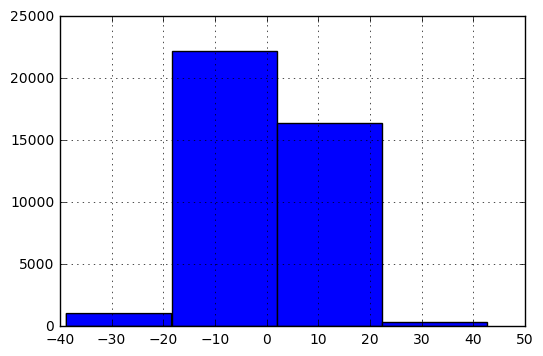

In [96]:
df.x21.hist(bins=4)

In [97]:
df.x22.value_counts()

 3.568151     1
 0.048945     1
 6.869186     1
 8.835177     1
 3.459594     1
 2.948486     1
-4.686234     1
-0.252116     1
 3.894680     1
 5.416074     1
-7.581849     1
-0.272801     1
-4.014617     1
-4.963319     1
 1.567907     1
 0.283634     1
-0.172442     1
 7.882310     1
-12.750326    1
 7.321712     1
-7.489437     1
-3.835657     1
 3.799789     1
 6.805066     1
-3.043225     1
-0.339143     1
 4.526523     1
 7.522793     1
-3.991917     1
 3.415063     1
             ..
-3.905078     1
-17.996596    1
-6.167814     1
 2.852898     1
 1.657040     1
 6.064061     1
-4.464899     1
-1.771215     1
-5.572225     1
-0.238042     1
 5.276404     1
-1.845723     1
 3.741011     1
 1.656560     1
 7.796631     1
-12.728645    1
-2.592972     1
 2.606811     1
-6.229202     1
 0.041817     1
 8.511972     1
 10.144879    1
-8.914543     1
 9.823934     1
-2.178322     1
-1.329260     1
-3.706141     1
 4.613488     1
-1.629685     1
 4.577112     1
Name: x22, dtype: int64

In [98]:
df.x22.describe()

count    39998.000000
mean        -0.036914
std          5.416513
min        -24.192537
25%               NaN
50%               NaN
75%               NaN
max         23.124327
Name: x22, dtype: float64

In [99]:
df[df.x22.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10840,-0.569378,-3.093714,4.558750,-0.863342,-9.879457,-0.554633,6.628080,-0.774577,-16.254093,2.419291,...,0.368898,19.259383,-5.125083,-0.061794,1.506402,1.035743,-78.528037,-10.515298,0.933640,-21.894592
35143,0.496952,6.690678,-7.722706,-10.304736,6.360421,-4.918670,-11.228234,23.912136,-7.001564,-2.419973,...,9.118225,-10.190029,1.056397,-0.695914,7.188299,-0.093632,9.970702,3.518855,0.994093,5.485691


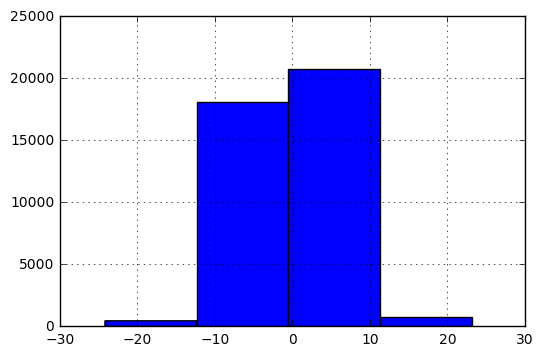

In [100]:
df.x22.hist(bins=4)

In [101]:
df.x23.value_counts()

 1.105087     1
 27.859838    1
 1.621126     1
 28.246100    1
-11.832349    1
 2.920465     1
-0.117396     1
-6.607274     1
-3.072579     1
-13.536000    1
 2.220732     1
 11.634617    1
 5.638341     1
 10.645572    1
-3.249693     1
-19.652933    1
-7.735447     1
-13.591115    1
-1.910347     1
 7.323091     1
 5.972968     1
 16.592589    1
 0.971476     1
 27.269896    1
 11.835029    1
 14.559234    1
-11.477002    1
-14.212159    1
 3.138602     1
-16.684854    1
             ..
-1.577883     1
-9.149173     1
-28.347850    1
-9.667113     1
 6.977328     1
-29.842619    1
-6.403152     1
-6.495277     1
 1.727645     1
-7.025527     1
-6.811551     1
 5.902988     1
-3.138117     1
 2.637064     1
 26.044518    1
 14.130052    1
-23.125074    1
 19.184616    1
-5.847123     1
 2.712242     1
 30.626263    1
-5.358684     1
-32.973079    1
 10.241975    1
-3.786837     1
-10.950045    1
-2.724450     1
 9.629838     1
 7.167570     1
 7.112799     1
Name: x23, dtype: int64

In [102]:
df.x23.describe()

count    39993.000000
mean         0.682208
std         14.948856
min        -63.387430
25%               NaN
50%               NaN
75%               NaN
max         62.525035
Name: x23, dtype: float64

In [103]:
df[df.x23.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
2015,-0.038249,-0.877743,-19.808740,-4.236199,-3.396012,-8.591904,-28.800419,6.763685,-14.026173,-0.717467,...,2.427929,-2.053077,0.870493,-0.317869,1.920890,-0.167551,-35.335521,4.947797,0.856430,13.441787
6093,0.503827,-5.146056,17.230354,-27.092965,1.657630,7.303901,25.051640,2.326036,3.535331,-3.215885,...,-20.089232,8.529258,13.415315,-0.102466,0.651692,0.921622,60.377799,4.654176,-3.814681,-1.086680
9257,0.232767,1.762331,-6.070098,-0.116969,1.594659,8.506302,-8.825466,4.179506,-3.470304,5.223963,...,15.496136,-25.918631,0.582590,-0.626145,2.809449,0.873986,26.075792,-10.143576,2.554552,0.345520
23658,-0.296476,-2.531530,0.081551,5.599023,3.621213,-5.809834,0.118570,-9.741964,6.186382,-1.254258,...,2.057366,-3.865727,-4.086694,1.058087,3.520149,-0.191531,-15.379751,5.317938,-0.724469,-16.750611
23996,-0.219087,-14.389077,1.396202,5.531312,-1.623736,-7.527766,2.029973,-103.024172,-7.321181,5.466072,...,-15.276060,52.867641,-4.210864,1.169315,6.554070,0.258508,42.847686,-8.785335,3.186471,3.785493
24965,-0.628663,-5.352721,14.647761,-0.217373,-4.596478,-3.642424,21.296745,-1.705030,10.203411,-0.341561,...,2.387428,45.296126,-1.134755,-3.017850,-8.635081,0.753093,2.469343,6.126573,2.915802,15.207091
38323,-0.133399,4.769523,-12.726008,7.306978,-1.365335,14.909126,-18.502659,-5.503482,-12.645671,4.245220,...,-14.415321,20.865546,2.001043,1.974082,-0.799089,0.175979,18.982570,0.736040,3.896299,27.032881


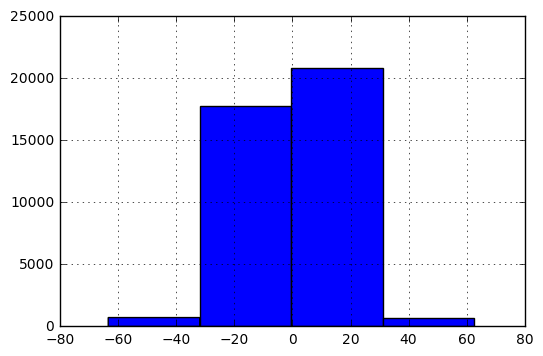

In [104]:
df.x23.hist(bins=4)

In [105]:
df.x24.value_counts()

asia       34665
euorpe      4172
america     1150
Name: x24, dtype: int64

In [106]:
df.x24.describe()

count     39987
unique        3
top        asia
freq      34665
Name: x24, dtype: object

In [107]:
df[df.x24.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
8456,-0.342352,2.667318,3.873110,1.482400,3.561828,-5.915880,5.631211,12.855805,-4.398431,0.190922,...,7.543947,30.705070,0.905195,-1.371124,2.499105,-0.876744,-37.856162,-4.300274,2.027714,5.567378
11025,-0.264340,-9.713574,7.994386,-10.359330,-2.355211,-15.821183,11.623236,-21.673111,-12.693168,-4.670983,...,-10.935383,51.567199,0.216406,0.708909,-2.422249,0.104239,-25.073906,3.427782,2.578627,18.263051
13426,0.344002,9.412529,0.619967,9.322279,3.894047,3.592669,0.901386,40.427156,-1.664217,-2.148232,...,-10.026934,-22.550975,4.386407,1.625376,0.796571,-0.497506,13.062516,-2.896985,-2.287758,-5.230421
16973,-0.316353,-1.814830,18.369124,0.607995,-3.004121,-3.294357,26.707326,57.214530,-10.387882,1.399227,...,5.051410,-7.515726,3.148282,-0.153098,2.576237,0.093940,-0.556570,2.818698,-4.119933,-1.856262
19764,0.052960,9.890102,-4.063376,-12.274928,4.181374,10.271977,-5.907844,-51.436143,-13.156764,-1.577203,...,-1.504701,36.529938,-6.337128,2.120465,1.902124,0.016643,-5.964296,2.359077,0.545317,3.657805
22057,-0.070340,6.583933,-17.707719,-3.717476,6.762169,9.810508,-25.745693,-28.357446,-3.538197,4.505742,...,-13.794200,-10.336719,-2.330515,0.918956,-0.744753,-0.178523,31.948618,3.785778,-2.300448,7.169442
24666,-0.355614,-13.352978,-6.865927,6.990435,-0.587019,-2.818745,-9.982542,-43.444838,-10.513913,2.740684,...,-24.359566,16.111072,-3.790844,-0.379371,-1.860675,-0.091027,-42.334363,3.133860,-2.383172,-25.885486
28739,-0.370700,-5.787550,34.849037,1.617566,-3.387448,9.436376,50.667881,29.310483,-4.192665,0.772982,...,35.900887,39.362265,0.933354,-0.325298,-1.525055,-0.277963,-61.505406,-4.415267,-1.727759,-28.658816
30123,-0.236602,-13.337902,-11.145248,4.604903,-2.019173,-0.913939,-16.204353,-52.617343,-9.772357,-14.105186,...,-35.182582,20.155871,-7.188696,1.134409,3.336701,0.019675,-46.519524,-3.285301,-0.375467,1.958256
31069,0.136342,-10.666194,-23.010345,1.101788,-11.082963,17.483618,-33.455313,-10.181245,-20.093962,7.719674,...,3.908390,-0.166045,-2.753466,2.738154,7.836327,0.228758,-8.751114,5.165770,3.374835,-0.638589


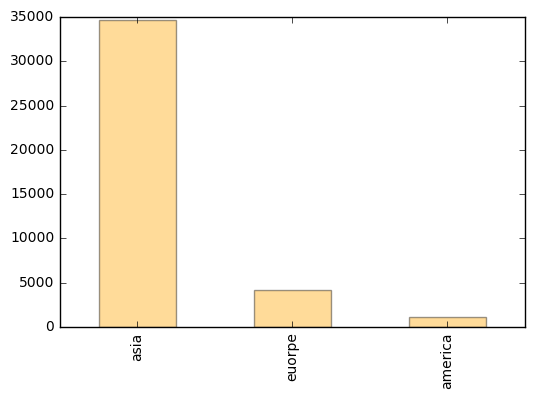

In [108]:
df.x24.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [109]:
df.x25.value_counts()

-0.027133    1
 0.944517    1
 0.657716    1
 0.241490    1
 1.354883    1
-0.979711    1
 0.519131    1
-0.352359    1
 1.323240    1
-0.724118    1
 0.534781    1
 1.300635    1
-2.283845    1
-0.314731    1
 1.260318    1
 0.616297    1
 0.459733    1
-0.670286    1
 0.072497    1
 0.782560    1
-0.917330    1
-0.305483    1
-1.996218    1
-1.609088    1
 0.343172    1
 0.451995    1
-0.500971    1
 0.652752    1
 2.478346    1
 0.907549    1
            ..
 1.366328    1
 0.846369    1
 1.392296    1
 0.494685    1
 1.671340    1
 1.325336    1
 0.626613    1
 0.602482    1
 0.245701    1
-0.598010    1
 0.502268    1
-0.464404    1
-1.843822    1
-0.821660    1
 0.212073    1
-1.443557    1
-1.186361    1
 0.441779    1
-0.874350    1
-2.901213    1
 2.111552    1
 0.575245    1
 2.002283    1
-1.147999    1
 0.501769    1
 1.131398    1
 1.075342    1
-1.409300    1
-0.740310    1
 0.426971    1
Name: x25, dtype: int64

In [110]:
df.x25.describe()

count    39992.000000
mean        -0.001826
std          1.256685
min         -5.545456
25%               NaN
50%               NaN
75%               NaN
max          5.232015
Name: x25, dtype: float64

In [111]:
df[df.x25.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6715,0.068382,-6.478443,6.574829,-5.323271,-1.528135,-3.090992,9.559308,53.673797,-0.228554,4.763392,...,27.532092,-34.424779,1.926665,-0.781086,-1.662163,-0.234880,-47.818827,13.331849,-2.226276,-26.298971
10611,0.424413,-7.990091,17.608246,-3.127814,1.213282,-8.537899,25.601067,40.751296,0.948770,-3.789426,...,14.418919,9.077154,2.386413,-0.773855,5.641532,0.766814,-23.000911,0.761546,1.504388,-30.416538
12235,-0.033239,0.667505,-11.774080,-15.895339,-6.712939,1.909170,-17.118628,-62.964741,0.530138,-6.083357,...,-23.313151,31.055372,-6.070937,-2.514559,-2.169112,-0.048672,-51.082661,3.485084,1.421594,-12.116759
17940,-0.343234,0.955045,-5.084431,-3.111627,-11.405829,8.361994,-7.392380,-8.463512,6.088943,-7.234365,...,-14.964560,4.836524,-6.578697,1.007321,-0.361645,-0.249732,-10.200191,9.143146,-2.976699,19.575619
22528,0.107613,-1.256745,19.061838,0.057310,-15.361802,2.637964,27.714481,-1.109245,-1.499978,-13.440703,...,-1.349122,29.250463,-2.561448,-0.320841,-2.279116,0.412279,-71.173690,-0.725117,-0.804379,-14.632095
26395,-0.120889,10.473926,-14.665822,-6.970473,-3.232103,-2.005340,-21.323004,-22.633642,8.055125,2.482502,...,9.101738,31.101828,2.259939,-0.873383,3.388564,0.881328,16.930397,-7.300624,2.755746,23.727886
27369,-0.420375,1.537649,6.902733,1.711047,6.366710,-14.491146,10.036055,51.714096,10.747861,-3.467306,...,17.769401,-17.159319,6.121604,-1.484319,-5.559579,-0.475655,2.765340,-4.600275,-1.921547,0.967877
34360,-0.268147,-7.878904,8.224980,-8.859775,0.849182,-0.619430,11.958503,-1.534790,-7.469449,7.959021,...,11.300223,22.391676,-1.268454,-1.309139,6.239688,-0.058908,-7.525695,-1.141113,1.552809,4.219193


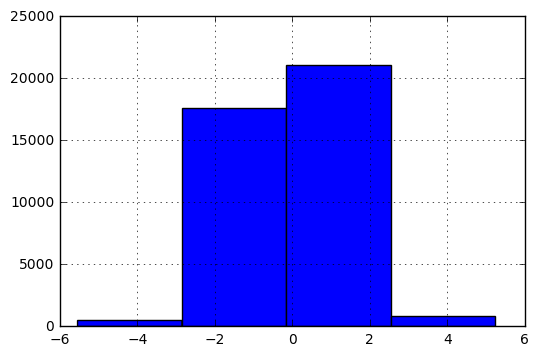

In [112]:
df.x25.hist(bins=4)

In [113]:
df.x26.value_counts()

-0.294203    1
-1.261785    1
-0.121751    1
 0.266941    1
 0.246489    1
-2.088774    1
 0.661525    1
 0.051450    1
 0.596659    1
 0.481438    1
-2.163968    1
-0.630600    1
-0.365004    1
 0.132986    1
 0.249799    1
 0.391320    1
 0.048223    1
-0.527573    1
 0.614964    1
-1.188348    1
 0.703862    1
 0.425281    1
-0.823348    1
 0.369163    1
-0.599419    1
 0.424005    1
-0.149685    1
-0.567739    1
 0.155460    1
-0.618679    1
            ..
 0.602145    1
-0.638593    1
 0.007055    1
-0.919154    1
-0.677279    1
-0.424561    1
-1.652151    1
-1.811651    1
 0.350138    1
-0.476852    1
-0.202149    1
-0.913931    1
-0.436440    1
-0.836623    1
-0.062812    1
-0.839831    1
-0.766389    1
-1.144404    1
-0.487014    1
-0.498331    1
-0.348610    1
-1.948374    1
 0.166765    1
-0.536086    1
 0.045438    1
-0.233700    1
-0.747719    1
-0.270367    1
-0.279027    1
 0.261032    1
Name: x26, dtype: int64

In [114]:
df.x26.describe()

count    39991.000000
mean         0.006679
std          0.847372
min         -3.572921
25%               NaN
50%               NaN
75%               NaN
max          3.336639
Name: x26, dtype: float64

In [115]:
df[df.x26.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3401,0.510646,7.198395,-3.634364,3.958535,-0.281459,0.844115,-5.284091,11.722958,-11.992080,-4.101970,...,-15.885132,1.558302,2.740485,2.001171,4.297144,0.095295,6.837408,1.007176,0.912040,5.388758
3925,-0.725981,4.512792,4.138200,-5.635658,4.542154,1.008148,6.016631,-13.984739,-7.815392,-2.307298,...,0.323988,30.075036,-3.772979,-1.682393,8.193729,-0.133894,-16.496539,6.009195,0.641081,0.743607
4926,0.162428,2.694496,-3.829131,2.425652,2.047531,-0.721986,-5.567269,-13.528150,-1.685342,-1.811723,...,12.875502,11.756257,0.535084,-0.685166,0.190908,-0.314917,6.181194,2.344425,-1.989566,12.662408
8556,-0.725808,-5.577791,13.367156,-6.956806,-2.642564,-0.370838,19.434840,3.050879,18.626210,12.599986,...,-6.694539,31.879021,-0.724622,-1.359555,7.188824,-0.062509,-21.205343,-2.849452,0.647366,12.062275
22496,0.255408,-12.882297,1.141808,11.323045,1.799309,5.176986,1.660103,-0.985609,6.053425,-8.872068,...,-0.187530,-3.207814,-2.094291,-0.024919,-1.707550,0.218115,-18.690365,-4.481765,-0.659655,2.046086
27967,-0.074303,9.033470,-0.416977,4.575824,-2.377946,4.268954,-0.606254,-11.229229,15.247265,-2.121162,...,-7.397407,18.768178,-4.338310,0.068470,-2.692187,0.434043,-14.034834,2.455965,0.534597,13.725833
28000,0.435124,2.725893,-13.894941,16.346962,-3.972750,0.535127,-20.202201,-32.425580,-4.624758,-7.031950,...,1.370361,4.321398,-9.855781,0.712274,-0.549565,0.199001,-35.893550,7.812315,1.721703,-14.673767
29117,0.322806,-0.281127,1.788847,-10.968908,-3.528899,-14.011192,2.600850,48.083741,7.170421,-1.220298,...,39.214394,-0.054257,6.644998,-0.610643,2.134243,-0.132867,-8.534802,2.283593,2.462787,7.010138
29830,0.083579,-0.338157,-18.670309,5.031580,4.075050,-3.019267,-27.145227,-9.648663,-3.578540,-6.214405,...,-0.194960,-6.569765,-1.055368,-0.169426,-2.385280,-0.055261,-41.267347,5.826926,1.992261,-0.623548


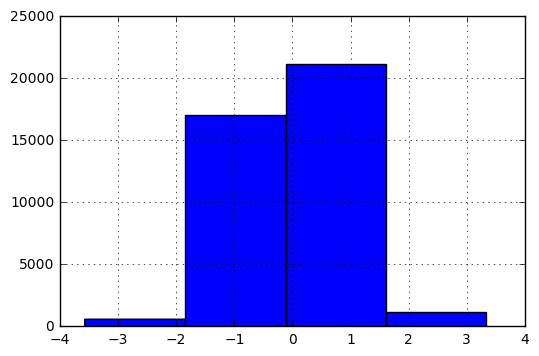

In [116]:
df.x26.hist(bins=4)

In [117]:
df.x27.value_counts()

-10.693298    1
 3.707037     1
 6.525204     1
 0.745105     1
 7.235015     1
 7.630224     1
 3.305309     1
-0.679235     1
 10.026712    1
-7.239366     1
-2.673947     1
 5.327355     1
-0.616658     1
-2.994503     1
-5.951578     1
 8.890302     1
 4.974011     1
-7.218664     1
 2.216375     1
-6.779498     1
-3.820564     1
 14.602509    1
 6.620746     1
 3.106150     1
 0.203701     1
-1.155177     1
 5.523783     1
 10.383158    1
 0.239556     1
 0.830250     1
             ..
 8.233346     1
-8.760131     1
 5.107545     1
 2.952579     1
 1.721087     1
-2.003602     1
 13.279085    1
 5.659129     1
 6.518844     1
 4.167344     1
 0.369996     1
 9.658838     1
 2.641174     1
-8.004965     1
 10.613344    1
-0.769669     1
 7.394311     1
-2.279576     1
 4.425496     1
 3.726247     1
 0.234147     1
 4.594415     1
 2.275783     1
 2.546203     1
 14.558287    1
 10.821256    1
-0.135761     1
 1.702139     1
 11.425022    1
-5.504168     1
Name: x27, dtype: int64

In [118]:
df.x27.describe()

count    39997.000000
mean        -0.010127
std          6.763477
min        -25.465976
25%               NaN
50%               NaN
75%               NaN
max         25.426288
Name: x27, dtype: float64

In [119]:
df[df.x27.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10906,0.095541,13.347353,-16.509528,0.791604,11.614604,-13.446477,-24.003612,-20.615223,-17.137454,-0.457953,...,-5.192118,-5.825911,-2.103970,-0.662273,4.453053,0.335945,-2.256022,-1.726857,0.256682,-5.383473
27541,0.021374,4.041344,-1.965097,14.172259,4.838945,-5.232777,-2.857103,28.091644,3.255179,10.846444,...,-6.741503,2.886291,7.339418,0.101718,-4.925510,-0.336025,-23.385883,-2.864138,-1.775180,18.624447
39279,-0.101218,1.639239,-7.576006,-9.948372,-0.604395,-8.502899,-11.014943,-41.921044,3.756666,-1.670006,...,0.964210,46.308188,-7.896889,-0.845569,-1.383886,0.040769,-4.874788,-4.433117,1.727769,21.557810


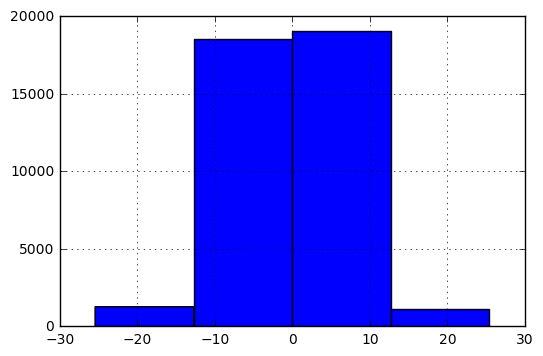

In [120]:
df.x27.hist(bins=4)

In [121]:
df.x28.value_counts()

-3.668566     1
 17.564326    1
 3.018705     1
-2.401174     1
-23.258869    1
 5.506999     1
-15.902958    1
-7.196582     1
-5.681094     1
 40.630135    1
 12.245688    1
 11.812098    1
 11.372644    1
-7.523126     1
 7.992285     1
 2.809088     1
 12.181463    1
 4.412866     1
 29.481182    1
-6.685010     1
 3.056688     1
 9.425032     1
-11.590137    1
-11.514301    1
-5.595830     1
 4.296947     1
-27.085605    1
 3.840117     1
-17.003705    1
 5.407048     1
             ..
 9.260301     1
-9.125948     1
-9.881404     1
-8.953104     1
 2.955416     1
 12.335504    1
-6.837091     1
 13.320558    1
 0.731033     1
-6.078471     1
-8.214714     1
 19.567249    1
 2.835762     1
 26.390865    1
 14.630056    1
-10.308109    1
 3.246436     1
 9.909273     1
 1.049562     1
 4.686480     1
-20.683543    1
-8.745096     1
 4.407311     1
 3.312588     1
 6.160231     1
-7.189561     1
-8.489903     1
 15.791803    1
-17.995106    1
-35.736229    1
Name: x28, dtype: int64

In [122]:
df.x28.describe()

count    39991.000000
mean        -0.015537
std         14.365249
min        -57.133013
25%               NaN
50%               NaN
75%               NaN
max         53.746022
Name: x28, dtype: float64

In [123]:
df[df.x28.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4041,-0.147191,-3.401970,11.863438,5.787504,-4.592286,-12.275023,17.248548,-11.118178,5.125922,7.221000,...,0.255331,4.971486,1.928444,-0.206761,3.331860,-0.483862,-10.935375,1.553626,-0.276452,0.758379
10628,0.397640,-1.685655,-2.433507,3.175773,-6.197723,4.005249,-3.538136,24.604107,-5.293099,-1.265819,...,34.203491,-36.348360,1.316964,-0.736233,-0.307980,0.264443,-6.381870,-3.873059,0.595929,-19.402566
16444,-0.236983,-2.867722,17.780628,0.841800,2.167232,6.783471,25.851697,10.589483,8.415895,-5.634496,...,-0.265508,7.396316,-0.230635,1.804485,-7.912254,0.777303,-30.135025,-6.008860,-4.861824,5.821384
21566,0.021964,-4.153942,9.179034,-8.009178,-0.957253,-7.775770,13.345626,-19.086328,0.800305,-1.939029,...,-23.716257,22.983857,9.555819,-0.121112,-2.512965,0.071296,47.951876,1.581648,-3.661833,5.586966
27694,0.396960,3.058285,-4.261015,-1.924455,8.214727,4.820390,-6.195196,-5.724400,0.081325,5.806767,...,2.471888,1.937506,7.485912,-0.694023,1.399637,0.411900,27.953361,2.441135,1.185016,0.172995
30421,-0.025723,-3.202705,1.054350,-3.523103,18.652460,-12.366394,1.532946,-33.287060,-0.076774,-9.301880,...,2.030976,22.052277,-1.203390,2.283828,3.955997,-0.389338,-1.268480,-1.537672,2.985842,-4.932966
36072,-0.138661,-1.521098,-4.750475,8.836268,-10.897375,-6.394090,-6.906834,-15.559202,-6.271154,-4.437165,...,-15.286669,31.770586,-0.364037,2.223627,1.292932,0.647788,-5.209210,-8.462226,1.952737,30.747249
37507,0.333743,4.428860,-16.067811,-6.335852,0.851062,0.950323,-23.361390,-23.336682,-9.564485,-3.533730,...,-21.678917,-6.501766,-1.496710,-0.321242,-3.218361,-0.064728,40.254117,-4.764640,2.473245,11.144925
39906,0.248979,5.600473,-4.588263,2.711915,-0.896661,14.066456,-6.670989,3.827917,2.460980,-4.414807,...,-8.671471,-2.218692,-0.893659,1.179328,-0.890143,-0.637224,-25.711095,6.631830,-1.078175,3.648126


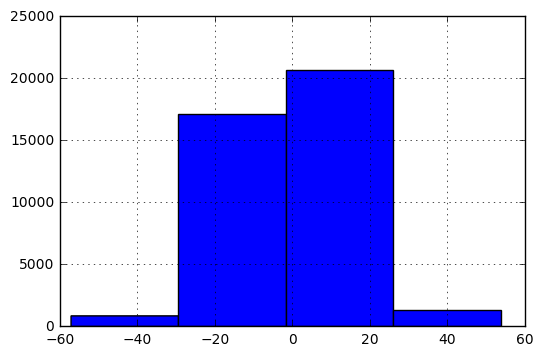

In [124]:
df.x28.hist(bins=4)

In [125]:
df.x29.value_counts()

July       11500
Jun        10307
Aug         7378
May         5443
sept.       2739
Apr         1651
Oct          560
Mar          317
Nov           58
Feb           31
Dev            7
January        2
Name: x29, dtype: int64

In [126]:
df.x29.describe()

count     39993
unique       12
top        July
freq      11500
Name: x29, dtype: object

In [127]:
df[df.x29.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3366,0.158671,2.241556,-7.217733,-6.091381,-3.028444,-9.893670,-10.494041,19.402994,5.114827,3.326509,...,6.341516,3.273868,-3.662761,2.259820,-3.577061,0.395470,-50.105374,-2.318385,2.083146,-2.054351
10139,-0.329893,-0.295085,-12.471996,-16.188176,1.556836,4.252614,-18.133345,-6.957715,1.731399,-6.163829,...,-1.167421,-3.333539,-6.773243,4.063652,5.931527,0.361545,8.222880,-0.500682,-1.790826,26.862244
12910,0.230693,-7.672588,-5.169023,-2.286546,11.255348,-0.011859,-7.515372,-16.527280,-14.513747,-8.023169,...,-26.087387,2.485783,-0.072352,1.445911,-2.396198,-0.485287,-0.610451,0.316522,0.925514,7.362916
15237,0.532175,2.944782,-6.338025,-2.758083,-7.970384,2.718849,-9.215013,31.816381,-2.315359,4.506806,...,-6.441993,-11.578820,2.328801,-0.695383,4.973639,-0.514157,-18.165708,11.337820,3.417398,9.014920
19207,0.021863,-3.693098,-10.026736,-1.630528,0.238487,5.064327,-14.578120,25.993032,-1.917482,-14.019099,...,11.505866,-16.917710,1.783575,3.529088,3.280951,0.569206,14.968834,-3.744906,0.922450,2.512385
32580,0.103035,-8.084254,-3.019710,5.006129,5.261214,-1.769436,-4.390431,8.396489,9.725519,6.352527,...,-1.370658,-21.731613,6.413256,0.948581,4.689196,-0.464232,43.867432,-0.390560,-2.429793,-2.563337
32686,-0.464900,-0.649557,3.805924,17.693048,-3.551078,11.526876,5.533527,6.527348,-1.316611,10.663882,...,-51.840168,-6.778544,10.995591,0.838345,8.326704,-0.546793,94.749606,4.488878,-4.732033,23.713675


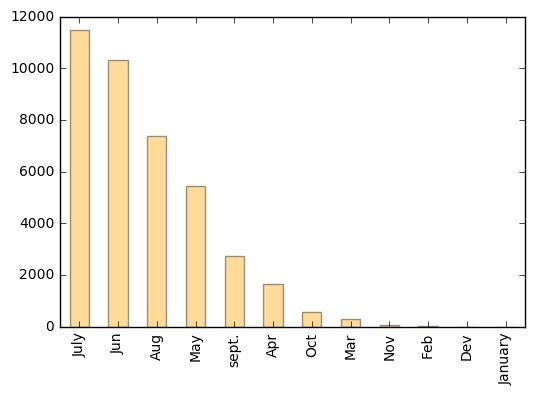

In [128]:
df.x29.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [129]:
df.x30.value_counts()

wednesday    25153
thurday       7486
tuesday       7089
friday         137
monday         129
Name: x30, dtype: int64

In [130]:
df.x30.describe()

count         39994
unique            5
top       wednesday
freq          25153
Name: x30, dtype: object

In [131]:
df[df.x30.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
25129,0.429708,0.952825,8.544243,-6.289817,-1.512246,-11.447825,12.422687,-25.642908,-5.511889,-11.518357,...,-5.843369,25.788946,-2.296730,-1.497905,-7.591226,0.424695,-46.692531,0.469484,0.862698,-18.983136
26182,0.306864,0.515089,12.697273,4.210189,3.892578,-0.796453,18.460881,39.476893,-6.514515,2.230132,...,24.208652,7.313674,-3.000404,-1.843783,3.679049,-0.203668,-103.230958,1.054075,1.458230,-27.003989
30163,-0.283904,-5.444992,1.752047,20.103155,-0.979717,-10.347931,2.547345,0.343761,-4.279247,-10.137613,...,27.438010,22.602903,-4.528047,1.582187,-1.153724,-0.074920,-12.000908,-3.826823,0.361319,9.366841
30168,0.219398,6.937180,-10.384861,2.608809,6.183161,-10.205639,-15.098808,-4.503711,-18.740308,-0.528961,...,2.341264,-13.067229,-7.086920,-0.151310,2.945533,0.023512,-49.884391,-1.070787,-0.636468,-15.645893
36426,0.231502,-4.212963,-10.875999,4.512065,12.890816,4.501944,-15.812886,-30.243137,14.223635,0.399035,...,-2.199130,12.366366,-4.761551,0.926437,0.204841,-0.191616,-19.851808,7.129477,1.262717,5.875001
39404,-0.166766,4.587401,7.521360,-2.344792,11.455386,-1.165729,10.935492,-23.674310,4.240962,4.646901,...,-39.536518,44.502779,-1.617985,0.808826,-8.604663,-0.814029,-9.428321,-3.371395,1.581805,29.847837


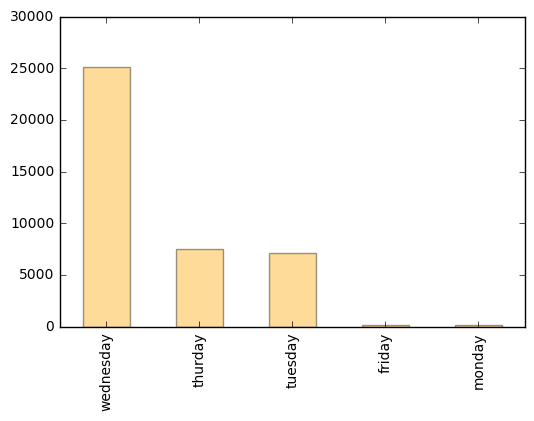

In [132]:
df.x30.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [133]:
df.x31.value_counts()

 4.311632    1
 2.761122    1
-2.376442    1
 0.227724    1
-4.767430    1
 2.953742    1
 4.365895    1
 1.518183    1
 0.527417    1
 0.393486    1
 1.774447    1
-3.241567    1
-3.492023    1
-3.690872    1
-4.700647    1
 1.908496    1
-0.247351    1
-3.286168    1
-1.337693    1
 0.201966    1
-6.127112    1
 5.097457    1
 2.102762    1
 0.553453    1
 5.214444    1
 2.227193    1
-5.655820    1
-6.148421    1
-4.395614    1
 1.010936    1
            ..
 1.066281    1
-0.884909    1
 1.698429    1
-0.495250    1
 2.219479    1
 1.631555    1
 3.751346    1
 4.412877    1
 1.822306    1
 1.190217    1
-4.441952    1
 2.180730    1
-0.258722    1
 0.029992    1
 1.857455    1
-1.843318    1
 2.521854    1
 2.085900    1
 4.167301    1
 2.292426    1
 4.026044    1
-0.277014    1
 2.721970    1
 6.188020    1
 1.271523    1
-1.516682    1
 4.626670    1
-0.323531    1
 1.055586    1
 2.462131    1
Name: x31, dtype: int64

In [134]:
df.x31.describe()

count    39997.000000
mean         0.008024
std          2.760765
min        -10.894467
25%               NaN
50%               NaN
75%               NaN
max         11.847532
Name: x31, dtype: float64

In [135]:
df[df.x31.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5958,-0.008845,-1.299149,11.800839,-24.689555,2.445570,12.148328,17.157533,-41.134365,14.357180,-2.031234,...,-24.956637,44.718107,0.859997,-3.153083,2.688217,-0.406995,-13.032959,3.233471,-2.473106,-10.368204
18732,0.131690,3.843121,-10.361005,-10.516950,10.099745,-4.603630,-15.064123,18.295354,-3.117539,-1.412242,...,13.064712,-18.747428,-6.371571,-1.145851,-2.075051,0.189828,-8.389246,-5.135442,-1.639001,-11.296240
23613,0.163533,2.224102,-13.707206,1.211613,9.024596,-2.606909,-19.929248,-21.616121,13.291884,-0.527538,...,-10.543265,3.710429,-1.758813,0.081143,0.843427,-0.099188,-30.405554,-4.557377,2.675328,-6.756356


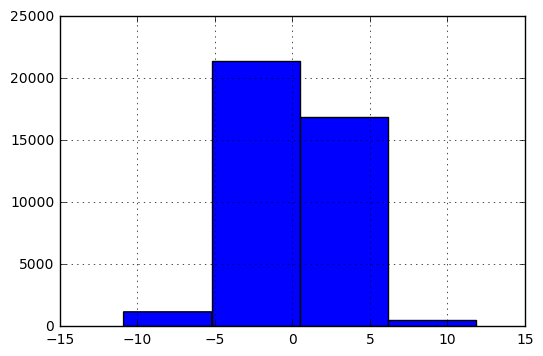

In [136]:
df.x31.hist(bins=4)

In [137]:
df.x32.value_counts()

0.01%     10178
0.0%       8546
-0.01%     8354
-0.0%      7607
-0.02%     2600
0.02%      2030
-0.03%      406
0.03%       220
-0.04%       29
0.04%        17
-0.05%        3
Name: x32, dtype: int64

In [138]:
df.x32.describe()

count     39990
unique       11
top       0.01%
freq      10178
Name: x32, dtype: object

In [139]:
df[df.x32.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4846,0.453431,4.714105,-6.470945,-5.678835,0.831611,3.339826,-9.408268,-4.854747,-13.342630,-4.260828,...,22.599170,-3.455515,-9.086401,-4.453728,-0.711013,0.274818,-8.936047,3.439791,0.716149,-3.087840
11830,0.404590,1.251339,-22.694039,12.515235,-2.600181,7.667935,-32.995427,-23.044713,7.510051,-7.497398,...,16.247324,-21.890977,-2.825766,-0.639112,-4.191655,-1.330118,-25.512200,0.561023,0.039261,-13.669217
13850,0.235048,4.045896,7.592605,2.706755,-5.665054,-5.154999,11.039078,-41.967765,6.873178,3.362360,...,-22.800754,38.776216,1.081199,1.237774,-1.782096,-0.087074,-11.229490,5.173542,-1.149966,-7.348673
15208,0.060111,-0.983374,-3.181857,-2.156008,-2.904567,11.788238,-4.626180,-33.941925,-18.958637,1.955892,...,-13.693790,-1.648521,-5.811486,-1.153516,1.066275,-0.486212,3.593683,-3.086178,-0.075387,-6.477302
17263,0.376623,3.274790,10.420384,-5.003055,7.680784,-8.420761,15.150456,12.218284,-8.238400,-3.974578,...,-13.897114,-1.902132,6.793872,1.260263,-5.426677,0.241405,40.531822,-7.318671,-0.784807,21.565081
20274,0.019656,-7.462598,-7.325215,-3.643747,4.850687,13.078772,-10.650312,-53.316009,11.856107,1.588147,...,-1.545641,28.986238,-5.813249,-2.692404,2.972016,0.421501,-51.829340,-6.933372,-0.640378,-18.109112
27616,0.147370,3.771509,0.422316,-0.224434,5.500911,-10.332606,0.614016,-73.403493,8.577695,-2.895962,...,1.497675,42.613240,-3.278550,-0.276373,-6.473415,0.411288,52.157391,1.671306,2.508322,6.956601
31788,0.030224,0.150887,14.765130,-4.782869,-0.576765,-6.740068,21.467390,-25.826579,-7.695916,0.400881,...,23.112358,20.459512,2.791633,1.187810,-10.734306,0.144060,53.802381,0.002042,1.202929,-7.665148
34031,0.133259,-5.912846,-10.330900,16.205101,-3.032434,-5.065565,-15.020353,-19.354926,-5.581785,2.054258,...,14.060863,-4.568530,-6.418353,-1.269091,3.049534,0.539617,-10.661428,-5.027604,0.650054,-1.648448
39758,0.020235,2.473674,-19.843408,7.046066,0.759135,3.646377,-28.850824,21.278827,-7.441848,5.757014,...,16.024274,-6.885164,-6.101892,-0.835804,-8.444453,-0.004981,-56.010010,4.758858,2.100242,15.335826


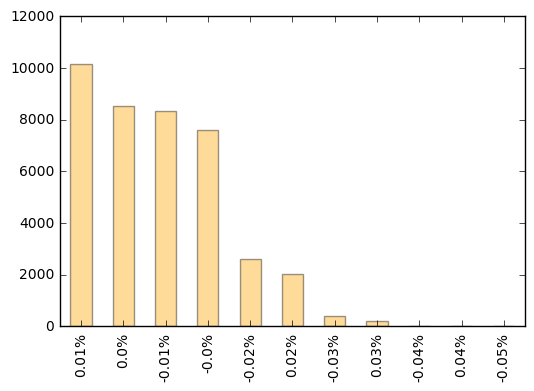

In [140]:
df.x32.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [141]:
df.x33.value_counts()

-1.583912    1
-0.722794    1
-1.163787    1
-0.206287    1
 1.781060    1
 0.590076    1
-0.216119    1
 1.900324    1
-0.395995    1
-3.340726    1
 1.479694    1
 2.508667    1
-1.028827    1
-2.042622    1
 0.077204    1
-0.033336    1
-0.438478    1
-0.642840    1
-1.667016    1
-0.913984    1
 1.223776    1
 1.443125    1
 0.675153    1
-3.923190    1
-1.859071    1
 1.171180    1
-1.709756    1
 0.599333    1
 2.893600    1
-2.785389    1
            ..
-1.711589    1
 2.501986    1
 2.068571    1
-0.759715    1
-1.749748    1
-2.845863    1
 3.440312    1
-0.745778    1
-2.218481    1
 5.098327    1
-3.348633    1
-2.084905    1
-0.918430    1
 0.672895    1
 1.347637    1
-0.732767    1
-1.002130    1
-2.756362    1
-1.950792    1
 1.303112    1
 0.434063    1
-0.951625    1
-2.361418    1
 2.052829    1
-0.617726    1
 1.650703    1
-0.205570    1
-0.437111    1
-2.131454    1
 1.578852    1
Name: x33, dtype: int64

In [142]:
df.x33.describe()

count    39990.000000
mean         0.007736
std          1.746799
min         -6.848407
25%               NaN
50%               NaN
75%               NaN
max          6.931868
Name: x33, dtype: float64

In [143]:
df[df.x33.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
7792,-0.385327,-5.571987,-1.084918,1.858725,-0.593554,-6.079209,-1.577389,-25.089364,-8.852895,-5.517610,...,-12.394614,7.845692,-8.791585,2.067802,-4.565440,-0.070695,-16.946994,5.076169,-1.704142,-10.448321
8978,-0.210587,-6.075748,-21.718005,9.604155,1.557129,1.295713,-31.576347,-73.887862,6.799189,-2.802416,...,-21.028150,0.065634,-8.370572,1.171849,3.310035,-0.316367,15.376599,-4.346942,-1.115753,-4.999921
10094,0.208098,-6.019309,14.327231,12.049646,-2.870404,-24.109432,20.830718,25.678232,7.079503,10.143771,...,7.713224,18.289593,1.467020,0.297429,-0.529738,0.063632,-32.203355,0.299518,-0.934842,-22.492333
11579,-0.110171,-7.118374,6.118473,10.656477,11.461480,18.101893,8.895800,20.306308,3.634174,3.677454,...,-3.003218,4.316874,-0.005324,-0.473130,-1.246463,0.360789,-28.170267,-1.557679,2.250714,1.055361
15264,-0.222156,-10.100399,-27.972383,-1.691324,8.590039,-4.459429,-40.669743,-89.900449,-11.836633,-5.975337,...,-25.342917,-1.335929,-9.922752,0.626002,-6.553781,-0.329311,29.640121,10.028473,-0.207758,-6.558953
23156,-1.003887,10.597844,36.957261,1.118092,-5.340065,1.045809,53.733080,-33.401183,12.179978,-1.486989,...,18.222914,30.793310,8.232625,0.295720,5.273682,-0.159737,67.196657,-10.342623,2.124763,-23.718675
24953,0.183207,5.035700,6.805942,8.080440,1.956734,-8.296084,9.895329,-29.185150,5.617397,-8.689802,...,-28.556770,30.095347,-1.831762,2.866576,0.611617,-0.107365,-48.371144,3.493611,-3.161309,-5.040772
31495,0.229889,-6.097267,-7.879351,3.357262,-0.339404,6.721150,-11.455985,-61.668798,14.754555,3.846914,...,-13.828797,22.153586,-4.870557,-1.241719,3.503892,0.017854,-29.438467,-6.351444,-1.761815,-3.120895
32252,0.094251,7.087277,-4.885639,1.134322,10.028733,-9.669198,-7.103352,-17.978284,-8.731193,2.339126,...,-10.940073,-11.794537,-2.400116,0.517569,-3.211612,0.326034,-10.075745,-10.348680,-2.504090,-20.058856
38822,-0.288094,6.976355,1.773391,3.198178,7.252081,17.415524,2.578377,3.324085,-11.270530,5.099987,...,-3.909617,-7.407281,-5.482348,0.174169,4.572799,-0.421095,-19.576564,-0.612247,-2.078476,-16.769272


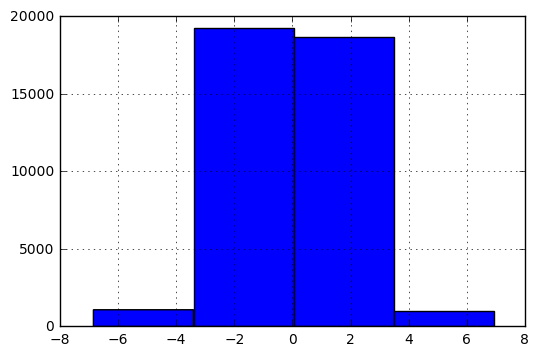

In [144]:
df.x33.hist(bins=4)

In [145]:
df.x34.value_counts()

-9.302635     1
 0.980707     1
 0.239820     1
-5.844321     1
-2.298865     1
 7.060090     1
-11.550465    1
 2.035389     1
-12.843534    1
-3.694498     1
-1.615889     1
-3.761432     1
-1.583828     1
-1.476865     1
 2.229155     1
 9.781596     1
 5.804664     1
 3.985507     1
 9.605349     1
 11.397879    1
-3.017046     1
-5.121897     1
 1.793099     1
 1.967566     1
-6.813905     1
-5.074628     1
 6.353185     1
 13.890215    1
-7.422297     1
-4.698136     1
             ..
-1.227146     1
 1.795959     1
 15.853189    1
 6.684548     1
 7.433389     1
-6.842073     1
 10.673615    1
 8.975641     1
 10.150063    1
 10.220662    1
 8.080476     1
 8.661473     1
 6.535052     1
-2.282289     1
 0.142786     1
-1.942292     1
 0.977471     1
-1.211249     1
-2.883738     1
 15.917657    1
 6.549348     1
 10.864080    1
-5.670501     1
-0.535026     1
 6.718360     1
-4.030332     1
 0.978884     1
 7.326162     1
 13.836068    1
 5.561537     1
Name: x34, dtype: int64

In [146]:
df.x34.describe()

count    39995.000000
mean         0.004350
std          8.015394
min        -38.469869
25%               NaN
50%               NaN
75%               NaN
max         29.145272
Name: x34, dtype: float64

In [147]:
df[df.x34.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
1378,-0.115419,-4.681605,12.695355,-7.348629,-0.079278,0.160307,18.458093,31.354944,8.076477,1.070894,...,49.777801,-7.106719,-12.742477,1.191400,-3.295520,0.403172,-68.336081,2.143319,-0.676070,-19.450313
15378,-0.076148,-0.682541,-2.810899,12.684622,-4.483683,-3.141411,-4.086836,23.851049,5.919195,6.503025,...,4.254328,-1.372819,-9.661712,1.743672,3.098252,-0.638158,-94.755014,0.492298,1.782334,-23.545982
24318,0.052218,2.698285,-4.527594,4.081496,3.663770,5.095514,-6.582782,1.069200,-13.022265,-8.636271,...,-18.156480,-15.989665,-4.444293,-1.380893,2.663306,0.353483,-15.408287,-1.910599,0.011974,6.488273
25831,-0.360716,-8.223608,5.507116,-17.841381,-2.595578,9.565147,8.006932,-47.546059,-6.117408,9.551198,...,-23.816054,5.342769,-4.502684,2.361406,-5.015196,0.611333,3.424812,5.493390,0.453869,-14.072813
28081,-0.086039,-4.530020,-15.950516,-1.039653,-3.554509,4.487469,-23.190852,-11.895057,-16.086559,-11.290657,...,-27.147773,-23.754872,-3.630341,-1.783608,-1.485193,0.315449,-20.042137,5.409822,0.690741,3.733622


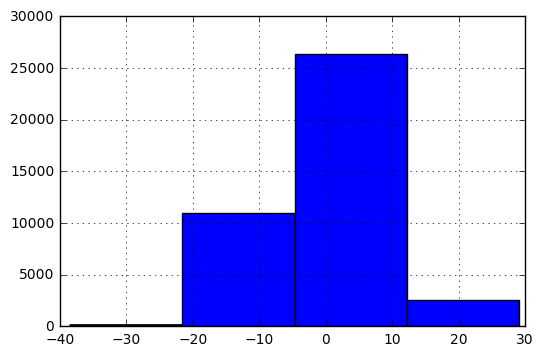

In [148]:
df.x34.hist(bins=4)

In [149]:
df.x35.value_counts()

 2.167054    1
 1.054181    1
-2.143918    1
-1.815430    1
-1.443374    1
-0.127923    1
 2.091068    1
-2.704033    1
-1.129267    1
-5.705922    1
 0.324431    1
 0.767888    1
-1.418329    1
 0.063325    1
-2.490720    1
-1.266552    1
 1.614537    1
-1.188040    1
-1.137737    1
-0.461899    1
-5.557122    1
 2.165973    1
-3.982571    1
-1.052374    1
-1.321185    1
-1.679854    1
 2.308865    1
 0.849462    1
-0.424672    1
 0.546385    1
            ..
-1.329937    1
 1.819506    1
-0.385730    1
-2.530779    1
-0.503745    1
 5.169698    1
-4.383420    1
-0.798732    1
-5.696507    1
-0.223176    1
 2.520985    1
 1.681327    1
-2.233937    1
-0.279314    1
 1.175163    1
-3.378234    1
 1.639274    1
-0.946993    1
 3.381702    1
 3.859442    1
 3.066164    1
-1.815960    1
 1.293573    1
-4.665074    1
-1.848589    1
-3.223545    1
-1.387558    1
-1.293527    1
-1.071969    1
-2.911721    1
Name: x35, dtype: int64

In [150]:
df.x35.describe()

count    39993.000000
mean         0.018344
std          2.380424
min         -9.525195
25%               NaN
50%               NaN
75%               NaN
max          9.961666
Name: x35, dtype: float64

In [151]:
df[df.x35.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
14416,-0.399373,-3.160650,-15.437199,-2.412217,17.797917,8.346186,-22.444527,27.692261,1.303248,6.033774,...,17.378383,-31.224377,1.920998,0.260918,-5.730850,-0.083402,-33.159760,1.724370,-0.017652,-12.002704
19847,-0.325190,8.444185,19.058319,9.079944,-2.758887,11.335058,27.709364,29.818332,-1.820615,-3.747431,...,1.434731,20.200570,6.179586,0.281087,-1.605603,0.409985,-10.794291,-1.434084,-1.139711,-17.729032
25264,-0.017332,-3.586659,-6.703598,10.198560,-4.848450,-4.874768,-9.746528,-25.142513,6.953528,-0.145205,...,-2.184705,34.622013,5.466543,1.085035,4.907495,-0.205730,-21.455939,1.834891,-0.270602,6.250947
25286,-0.498620,-7.877283,-15.120576,2.830376,-1.766641,9.620148,-21.984181,-12.049445,-8.843414,-2.866796,...,6.127872,-28.304215,-1.220911,1.771169,2.085829,0.247980,10.239576,-2.817994,-1.752226,-6.330729
25839,0.728285,-8.486088,19.590821,-4.855069,3.404571,-16.253270,28.483582,-0.822349,-8.867138,5.887848,...,-0.076179,9.321687,7.546411,-0.256128,2.387657,-0.164808,17.013414,2.559383,-2.846207,-12.253896
35386,-0.216793,2.732010,23.978557,-9.951723,-1.961566,-3.425405,34.863020,-28.619274,1.514144,18.766143,...,-14.408819,28.778991,5.765884,1.130369,1.092543,1.169259,25.981893,-2.353513,-0.236506,10.006870
38488,0.201322,1.405612,-3.391294,-0.957816,6.112124,-7.843528,-4.930687,-19.806895,-9.461451,-1.030489,...,-28.984816,9.078117,-5.356490,-3.654206,4.343765,0.052596,-39.982963,-2.995453,0.626146,14.507389


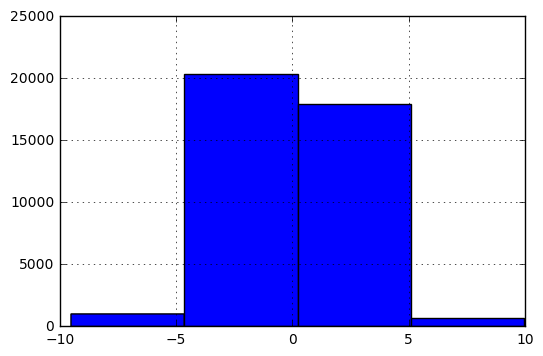

In [152]:
df.x35.hist(bins=4)

In [153]:
df.x36.value_counts()

 1.072830    1
-0.751531    1
-0.746724    1
 0.639017    1
 2.912337    1
 2.455203    1
-0.941098    1
 1.991832    1
-3.268954    1
 0.132817    1
 2.633858    1
-0.553261    1
-1.419412    1
-2.829433    1
 1.559775    1
-0.494178    1
-1.702631    1
 0.698620    1
-1.784137    1
 0.637056    1
 0.792578    1
 1.013220    1
 1.152314    1
-1.286183    1
-1.219703    1
-0.302925    1
-1.491451    1
-1.778631    1
-1.753323    1
-2.391709    1
            ..
 1.047360    1
-1.173342    1
-0.113200    1
 1.437915    1
 2.308879    1
-0.307477    1
-1.076859    1
-2.233940    1
-1.224011    1
-0.303263    1
 0.291860    1
-3.040726    1
 0.174500    1
 1.555126    1
 1.662242    1
 0.028570    1
 2.678365    1
-1.161752    1
-0.432690    1
-0.800232    1
 2.192570    1
-0.374831    1
 0.801396    1
 2.202684    1
 1.544829    1
 0.273705    1
-3.217220    1
-0.456807    1
 0.913947    1
 2.717495    1
Name: x36, dtype: int64

In [154]:
df.x36.describe()

count    39990.000000
mean        -0.002871
std          1.593604
min         -6.489966
25%               NaN
50%               NaN
75%               NaN
max          6.769965
Name: x36, dtype: float64

In [155]:
df[df.x36.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
5262,-0.847320,4.791516,9.895755,-10.110230,-0.119687,5.185124,14.387684,-30.190718,-0.750176,5.732610,...,-10.846845,30.442974,-4.090708,-0.283897,1.377501,0.386416,-66.185924,0.676779,0.719164,-17.562971
6335,0.245023,1.655565,10.275922,4.914117,-1.903144,-2.374319,14.940418,-9.648123,0.874487,-4.704551,...,-23.200793,37.984755,-0.929453,1.087670,0.489161,-0.097120,8.446055,4.793385,0.223966,33.559640
8670,-0.616842,5.779704,2.715480,2.845271,-9.466576,2.711088,3.948104,-16.701870,-17.105780,-0.829884,...,-4.561319,9.222818,-2.550433,2.116302,-11.620837,0.070438,-22.112022,3.481859,0.340924,-4.385719
10192,0.269173,-1.592375,-16.607794,4.837451,1.069532,-6.589191,-24.146484,-37.453037,-4.478614,4.393652,...,34.804866,20.996385,-14.309137,0.368170,11.849812,0.690637,-41.191708,2.728663,0.730694,15.959848
17819,0.489494,12.599355,-5.887138,1.296626,7.634230,0.723438,-8.559457,12.826225,0.061550,2.150450,...,4.546775,-13.609370,3.525621,-0.433215,-5.523300,0.387297,-45.540754,-3.622930,2.848881,-14.904005
22006,0.066124,0.805736,14.157702,-11.391913,4.131233,4.335108,20.584234,-29.787645,-8.281904,8.368296,...,-4.690074,20.418237,-0.054917,1.718727,-6.799813,0.382993,-32.304567,6.709085,-0.598504,-13.180474
26605,0.489355,-7.703429,10.010861,-3.961302,10.767821,7.992770,14.555040,58.817716,-13.428958,-1.744682,...,19.388734,-1.978345,-3.849659,1.021933,6.448880,0.701340,-74.425304,-5.094649,1.524959,-8.361994
28528,0.202907,4.522180,-1.190227,8.550533,1.117638,-2.804850,-1.730501,-9.550129,-4.892251,-4.229309,...,-3.645615,4.543980,-5.326034,0.225574,1.821683,-0.414050,-20.206605,-0.132968,-1.709824,-0.220623
37491,-0.194734,8.573624,-18.024247,6.326774,2.317770,10.595451,-26.205901,-55.886295,-0.585232,-1.315948,...,-7.587005,-19.186316,-11.010940,0.629576,-0.200189,0.086244,-62.652716,-2.966775,-1.302574,-43.317537
38254,0.169951,9.067322,7.892055,9.955675,-0.657557,-3.311559,11.474455,13.214528,-1.259140,-5.526508,...,2.535128,0.233767,4.654305,0.521448,-6.628223,-0.166367,-26.129336,-4.184380,0.395415,-23.064054


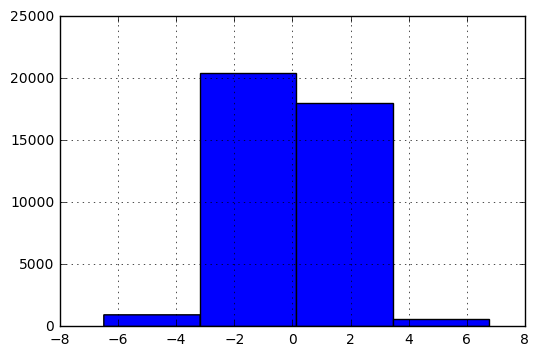

In [156]:
df.x36.hist(bins=4)

In [157]:
df.x37.value_counts()

$-881.11     4
$231.21      4
$-1406.76    3
$776.24      3
$533.53      3
$-142.68     3
$593.92      3
$487.98      3
$-579.24     3
$351.57      3
$-240.27     3
$-300.2      3
$-323.53     3
$-48.21      3
$352.65      3
$-349.97     3
$120.07      3
$488.91      3
$-326.74     3
$258.17      3
$718.5       3
$-1172.58    3
$-554.46     3
$459.41      3
$-327.49     3
$203.45      3
$-1244.41    3
$-433.69     3
$-794.8      3
$-49.33      3
            ..
$806.05      1
$-803.65     1
$806.07      1
$-190.37     1
$-631.71     1
$-1477.06    1
$1035.11     1
$-1200.89    1
$-1930.09    1
$263.54      1
$-1459.63    1
$-149.08     1
$-191.92     1
$240.22      1
$173.41      1
$-1039.29    1
$240.26      1
$2138.73     1
$283.49      1
$-610.17     1
$-787.79     1
$720.59      1
$-994.45     1
$-857.31     1
$1157.67     1
$-519.36     1
$-857.35     1
$720.51      1
$452.62      1
$284.99      1
Name: x37, dtype: int64

In [158]:
df.x37.describe()

count        39994
unique       37864
top       $-881.11
freq             4
Name: x37, dtype: object

In [159]:
df[df.x37.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
16094,0.215787,6.196603,-18.866967,-3.656699,-1.569939,6.937211,-27.431152,23.865383,11.560853,-2.123686,...,28.790868,-6.376034,-9.986722,0.985514,-2.104880,-0.011938,-54.956125,-0.239318,0.210179,18.389890
20093,-0.585556,1.104791,-13.581500,5.178984,5.943853,-5.083363,-19.746480,21.329397,1.501757,-9.935128,...,-12.729563,-3.599683,8.582280,-0.057298,-5.647977,0.418970,5.443976,0.601978,-1.057583,8.581827
23563,-0.273604,-9.118521,14.033596,1.973395,3.547352,-0.675843,20.403794,-97.545296,-23.571517,-3.996975,...,-11.404032,55.647115,-0.193515,-0.703034,5.768124,0.073453,83.767200,1.148688,2.443150,3.748136
25664,0.993153,7.849276,2.247457,13.605455,8.701200,0.013390,3.267633,12.192256,6.546145,-0.933492,...,-5.149787,11.208167,-0.477364,1.204368,2.317886,-0.650977,5.090421,-16.645355,0.981883,29.762480
36639,0.514706,-5.037639,13.941686,-4.153857,4.657376,6.307497,20.270164,-22.839131,-14.835688,-4.507357,...,10.961828,16.482052,-5.127355,-0.331251,3.594536,-0.323795,1.590559,-1.852424,-1.690936,-11.485287
39971,-0.484285,-2.355493,0.426684,8.615683,6.953455,15.912097,0.620367,14.423536,-6.799821,-11.285372,...,-1.495509,-16.379263,9.678255,1.213855,5.518131,0.050803,50.942827,7.284607,-3.254093,7.000519


In [160]:
#df.x37.value_counts().plot(kind='bar', color= 'orange', alpha= .4)

In [161]:
df.x38.value_counts()

 2.272247     1
 11.638498    1
 19.147412    1
-1.876867     1
 3.652886     1
-2.616714     1
 51.373834    1
 11.117546    1
 12.691088    1
 4.541968     1
 18.031919    1
 52.784813    1
 8.996499     1
 19.006176    1
-13.364792    1
 33.514965    1
 22.728153    1
 19.295259    1
-1.248865     1
 1.893985     1
 1.569281     1
 7.597862     1
-33.428106    1
-20.623240    1
 23.868123    1
 28.081006    1
 20.016446    1
 19.734395    1
 9.553495     1
-2.281219     1
             ..
 0.627655     1
 2.315776     1
 2.250777     1
-6.697840     1
 29.989128    1
 2.560799     1
-9.229036     1
 4.588748     1
-31.824860    1
-0.680891     1
-25.566657    1
-24.047347    1
-16.059295    1
 9.644864     1
 35.592669    1
 28.753625    1
-3.171075     1
 22.634195    1
 31.954584    1
 9.585904     1
-24.374938    1
 26.404291    1
 4.612215     1
 22.861523    1
-15.774921    1
 3.276897     1
 4.089908     1
-1.352741     1
-23.715422    1
 34.454911    1
Name: x38, dtype: int64

In [162]:
df.x38.describe()

count    39993.000000
mean         5.902099
std         16.923657
min        -63.864433
25%               NaN
50%               NaN
75%               NaN
max         79.284882
Name: x38, dtype: float64

In [163]:
df[df.x38.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
3846,0.636788,-2.017937,-17.150360,-23.949792,-4.233618,-10.853055,-24.935334,1.166430,0.462253,4.398373,...,-4.823369,7.185906,-3.146914,-1.502665,8.290276,-0.166109,7.966258,-4.151176,2.830554,24.870621
17108,-0.514285,12.385222,-22.883999,3.986968,-7.579869,-0.162371,-33.271615,-69.386634,-1.049265,-5.047256,...,-7.839156,3.169745,-8.559494,-1.394389,-1.385364,-0.162934,-0.572887,-2.328737,1.244382,-11.059149
17552,-0.341284,9.451511,-24.940806,-1.614173,-5.071143,-5.166988,-36.262058,9.935029,-13.506262,2.028049,...,4.301679,-11.225168,-3.786656,-0.273548,1.095412,0.447343,-31.441838,0.733490,3.645196,-2.708739
21777,0.064095,-1.773630,1.585186,-1.365794,9.613089,10.928269,2.304741,8.468561,1.203301,-6.715853,...,12.763728,-4.898396,4.682302,0.609851,-3.688368,0.477948,44.682879,5.421203,-0.925407,6.539581
22137,0.433885,-1.320913,6.926570,13.111097,-2.024882,-5.534375,10.070712,1.180145,-22.216487,0.343142,...,20.472811,-14.111544,5.407394,-1.514400,-2.199329,-0.038918,55.438590,-6.409438,-3.676317,-1.169333
35622,1.049189,-0.706301,-2.481181,6.962410,4.340535,1.165974,-3.607450,13.084316,4.136395,-13.668255,...,-13.595349,0.544037,-5.568173,0.243004,-1.311245,0.676907,-62.022299,3.402598,0.153993,-2.516312
36214,0.136357,3.230926,-20.780349,-1.810520,0.517741,7.652614,-30.213066,8.344968,-11.429912,0.028391,...,-20.151522,9.108583,-3.313281,0.462199,2.582710,-0.181470,-20.989993,-5.519764,4.286114,24.904345


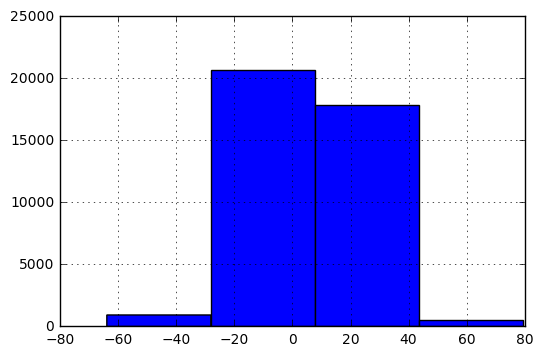

In [164]:
df.x38.hist(bins=4)

In [165]:
df.x39.value_counts()

-4.036964    1
 3.593575    1
 1.776507    1
-0.014948    1
-3.717839    1
-4.079067    1
-3.817277    1
 0.584762    1
 1.301104    1
-6.997218    1
 1.608570    1
-5.182975    1
 3.548435    1
 7.357858    1
 4.592937    1
 0.332677    1
 2.238241    1
 4.579931    1
 3.015247    1
-3.399104    1
-3.270979    1
-4.985703    1
 2.005417    1
-2.320140    1
-3.076271    1
 0.824293    1
-8.591844    1
-0.034201    1
 5.579234    1
 4.360858    1
            ..
-3.296763    1
-5.843125    1
 6.492398    1
 6.457963    1
-1.214776    1
-1.042221    1
 1.791126    1
-2.544555    1
-1.678052    1
-5.565633    1
-2.593450    1
 1.510464    1
 5.205613    1
 3.490081    1
 5.950690    1
-1.496306    1
 3.548160    1
-4.523343    1
 2.913223    1
 3.558208    1
 7.489914    1
 0.495052    1
 0.276945    1
 0.115139    1
 0.341147    1
-2.541847    1
 1.167043    1
 5.066373    1
 1.374013    1
-9.810108    1
Name: x39, dtype: int64

In [166]:
df.x39.describe()

count    39989.000000
mean         0.014060
std          5.159989
min        -19.315899
25%               NaN
50%               NaN
75%               NaN
max         21.099214
Name: x39, dtype: float64

In [167]:
df[df.x39.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
16,-0.080002,-3.996057,12.610601,2.699778,3.305612,14.143028,18.334866,5.918937,6.168532,4.562688,...,4.160472,0.728321,0.795320,-1.993936,-8.423694,-0.112500,-0.445456,8.485323,-0.620149,0.531935
9268,1.053192,9.647869,-12.485177,3.463141,-19.435812,-6.093937,-18.152510,-28.285920,2.208909,-8.065352,...,-1.175914,6.331911,-8.094475,-0.320503,-1.884225,0.182998,-7.135580,7.989577,-0.498023,3.203126
9316,-0.108282,-5.146695,-16.223734,1.292472,1.802176,-5.059746,-23.588090,8.401769,17.106633,-0.413409,...,6.150743,-8.351801,0.840133,-1.239931,-0.012127,-0.206861,22.502886,1.912724,3.737906,12.174225
10476,0.262150,1.813446,-6.922057,7.460793,9.491770,2.960379,-10.064151,-52.207283,14.557908,3.407009,...,-28.349399,24.335920,-4.180457,-0.470512,-8.514626,-0.635695,-8.287375,-0.927576,-2.122376,13.172259
14307,-0.144874,-9.016910,-5.146654,-4.603383,-0.500101,-2.839276,-7.482849,-29.802878,-9.263695,-5.082660,...,-1.402863,34.856125,-11.606748,1.557804,-8.764081,-0.184257,-20.063812,-0.511902,0.701231,16.303593
18063,0.297724,4.351172,24.103489,-0.902837,8.495825,3.678302,35.044662,-8.275795,0.330607,4.383331,...,-2.793886,10.952601,6.457076,0.408052,5.885659,-0.444043,48.941430,-0.639129,0.288318,-4.029788
19074,0.611687,1.347767,9.676274,4.206205,-2.632509,6.405889,14.068576,5.110087,-6.932786,-9.017737,...,5.385610,31.574956,3.685989,-0.745554,0.807886,0.641102,24.048025,-1.604325,1.466907,19.444354
25534,0.432266,8.709239,1.552213,-0.130690,-5.721504,14.655209,2.256802,-5.099105,0.040991,-1.323484,...,-20.605737,9.692855,1.333547,0.085951,3.350339,-0.201343,-69.025479,4.242314,-3.886487,-4.763224
27672,-0.533208,9.834140,-7.125335,7.848300,10.163456,-4.323312,-10.359702,-0.715254,-13.640333,-2.531422,...,-2.935814,8.224330,-3.672283,-2.003145,-0.160266,0.225616,-7.886708,-3.199904,0.521717,7.656024
29652,0.763643,-11.301337,-1.381072,8.720167,-1.358833,2.317204,-2.007974,42.137449,4.800872,0.854555,...,25.705214,3.157820,0.463478,0.569447,3.931203,-0.091427,-3.903425,4.523400,2.441429,6.289020


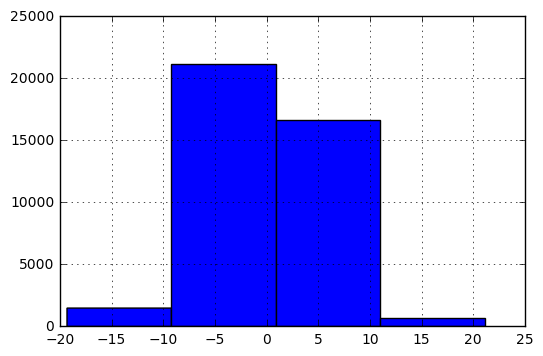

In [168]:
df.x39.hist(bins=4)

In [169]:
df.x40.value_counts()

-25.403809    1
 19.557287    1
-12.432767    1
 14.395148    1
 13.147994    1
 16.615819    1
-17.266239    1
-17.197993    1
 17.759046    1
-4.890483     1
-16.560122    1
-7.733889     1
-8.035837     1
 18.996656    1
-25.497126    1
-2.011528     1
-9.176786     1
-6.147854     1
 2.853711     1
-30.309542    1
-9.207973     1
-24.521776    1
 0.353501     1
 0.919432     1
-4.139531     1
 21.717002    1
-5.262125     1
-9.159497     1
-21.726391    1
 15.996722    1
             ..
-0.490599     1
-2.851093     1
-15.782317    1
-12.748608    1
 5.835183     1
 9.997671     1
-7.834421     1
-9.692912     1
-49.223707    1
-0.504306     1
-20.331618    1
-3.802027     1
-5.625155     1
 29.636308    1
-15.997500    1
-1.133269     1
-32.382702    1
-9.453857     1
-0.485877     1
-25.332052    1
 30.308766    1
 16.503657    1
 3.938301     1
-0.202097     1
 1.825523     1
-13.958741    1
-12.876532    1
 6.122374     1
-18.303770    1
-16.918792    1
Name: x40, dtype: int64

In [170]:
df.x40.describe()

count    39992.000000
mean        -2.215796
std         16.910200
min        -65.711291
25%               NaN
50%               NaN
75%               NaN
max         75.263599
Name: x40, dtype: float64

In [171]:
df[df.x40.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
437,0.365192,3.879024,8.794182,2.775357,1.397091,10.866090,12.786080,-7.857713,15.561306,2.123218,...,NaN,11.898467,-1.470849,0.923427,-0.034080,-0.259296,-23.835802,-8.730397,0.758020,-9.320593
9156,0.703037,2.394103,4.303371,-9.645739,-4.964873,-0.518558,6.256777,-2.907388,16.505947,3.626709,...,NaN,-12.076552,-3.124389,-0.159335,0.757402,-0.010535,-0.949543,4.450282,-4.702713,-10.136817
15379,0.892063,-2.894879,1.470257,4.528527,-1.641540,7.031768,2.137643,-44.895930,-3.974604,7.507552,...,NaN,25.303924,-0.168619,1.507324,-1.390961,-0.231380,27.796867,-2.885340,2.610925,4.265526
20220,-0.096014,-0.508989,7.347254,-2.609074,-1.482797,-8.382781,10.682356,7.400388,4.493540,-11.907742,...,NaN,-8.153690,-3.402474,-0.784719,4.565342,0.584350,-31.779823,7.461049,-0.160214,-4.269023
29995,-0.763138,9.248775,0.041168,8.367981,2.471505,1.834753,0.059855,0.095981,-3.831219,-0.481571,...,NaN,22.877332,6.919826,-1.417542,5.447571,0.075314,35.508596,-3.530861,2.189590,20.557314
32305,-0.221473,0.828993,-3.727737,-2.390823,-1.803373,-0.967600,-5.419849,49.957242,14.539396,4.930287,...,NaN,-6.456858,-4.483890,-0.887714,-0.359206,-0.296651,-91.550715,0.200794,4.234470,-11.079693
33403,0.134717,-3.437987,11.282956,-7.930074,2.390381,-6.924888,16.404570,-38.440315,-8.265803,9.878967,...,NaN,13.741746,-1.012740,2.601363,0.115308,-0.120424,45.811475,0.575838,-1.041500,11.509479
38393,0.536455,-10.358017,-8.466305,0.583202,7.571502,-12.930384,-12.309371,-5.734031,-13.109378,-7.480835,...,NaN,25.933854,-4.528673,1.400236,-0.552368,0.038201,-7.345895,-2.461669,3.906145,29.531204


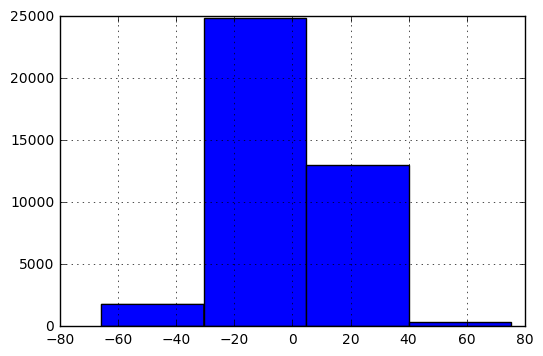

In [172]:
df.x40.hist(bins=4)

In [173]:
df.x41.value_counts()

 36.182632    1
-10.548719    1
-8.028058     1
 26.105331    1
 25.516165    1
 1.956835     1
 22.918020    1
-33.152573    1
 1.369021     1
 9.804225     1
-19.253649    1
 23.642965    1
 25.936826    1
 26.576932    1
 14.636584    1
 8.114661     1
-2.652596     1
 1.824231     1
 14.988418    1
 18.536123    1
 2.761355     1
-7.746663     1
 30.279021    1
-19.561205    1
 20.928835    1
 3.731626     1
 12.315486    1
 33.324627    1
 21.701918    1
 23.510924    1
             ..
 29.275588    1
 14.181953    1
-6.730714     1
 7.671639     1
-17.810043    1
-2.342958     1
-32.290400    1
 5.371726     1
 16.503038    1
 28.905938    1
 22.452013    1
 9.013959     1
 22.353783    1
 9.184522     1
 26.414027    1
-15.242641    1
-0.927576     1
 12.728506    1
-1.802752     1
 13.392228    1
 25.659853    1
-6.698307     1
-12.474486    1
 1.009050     1
-5.398803     1
 38.784931    1
 50.436604    1
-23.710272    1
 27.439890    1
-15.793545    1
Name: x41, dtype: int64

In [174]:
df.x41.describe()

count    39993.000000
mean         6.527137
std         18.715717
min        -70.629012
25%               NaN
50%               NaN
75%               NaN
max         87.682808
Name: x41, dtype: float64

In [175]:
df[df.x41.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6150,-0.336030,-13.328212,-21.504918,10.885016,0.722840,-0.825255,-31.266534,24.573698,10.115397,1.694391,...,3.264376,NaN,-3.596261,-4.990329,1.629460,0.700704,-28.799620,2.498626,4.438151,-7.324459
14794,-0.223080,-1.933165,-27.213188,3.593593,-3.006815,-8.741365,-39.565931,-20.091592,1.985295,8.161275,...,28.879173,NaN,-8.812437,-0.050206,-0.428004,-0.299324,21.293809,5.540799,0.476421,39.925086
17997,-0.044495,5.368418,-9.120387,0.213457,-3.902121,-9.557540,-13.260358,-15.117382,8.582972,0.464724,...,-5.807480,NaN,-1.999459,0.722503,1.261512,-0.522229,-30.785871,0.154426,1.638291,1.587925
29973,0.048728,1.733857,11.841802,4.850667,10.398729,-15.751714,17.217090,-20.918177,-16.794317,-3.825052,...,-11.913803,NaN,-5.605817,0.539140,-1.225943,-0.565342,-13.857133,6.608814,-1.659302,-6.169520
34853,-0.042474,0.952161,1.281720,3.766746,-0.263337,-2.261944,1.863525,22.721669,-4.405104,-3.449273,...,-14.129101,NaN,6.593719,-0.741313,1.546871,0.378169,-3.378742,1.921241,-0.622381,8.582437
37171,-0.808841,0.541762,1.340401,-7.037720,7.239433,1.981711,1.948843,16.136898,20.501456,-9.434892,...,-8.239486,NaN,9.485219,0.318916,-1.380140,-0.369426,61.458294,5.947729,-0.725442,10.721528
38505,0.140536,5.267820,5.656602,2.644636,1.808980,-1.779763,8.224274,24.594187,7.022540,-4.217975,...,8.438502,NaN,-3.553385,-1.614507,-7.949598,-0.244165,-55.382733,-5.042932,-1.991585,5.459969


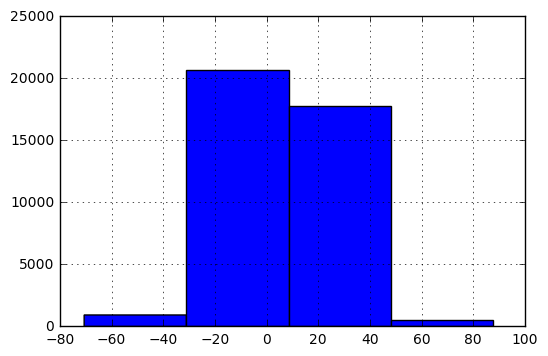

In [176]:
df.x41.hist(bins=4)

In [177]:
df.x42.value_counts()

 5.270548     1
 4.128065     1
 2.322108     1
-3.359636     1
 1.212869     1
 3.711582     1
-11.379010    1
 8.192938     1
-5.922726     1
 1.818848     1
 0.781454     1
-3.572632     1
 7.684898     1
-1.910046     1
 7.381189     1
-8.093077     1
-2.372562     1
 0.328195     1
-0.893564     1
-3.530273     1
 4.093422     1
-0.901006     1
-8.458707     1
-6.675532     1
 3.478638     1
-15.161889    1
-0.172862     1
-1.184250     1
-4.004193     1
-6.271582     1
             ..
-0.746610     1
-0.138034     1
-7.467613     1
-5.645995     1
-10.745531    1
 4.677100     1
-0.709654     1
 0.065025     1
 2.255912     1
-0.467471     1
 0.495042     1
-2.062419     1
 0.424967     1
 8.063158     1
-6.052364     1
 8.972685     1
-7.265132     1
-8.453100     1
 1.748992     1
-4.208269     1
 3.888802     1
-9.658014     1
-4.565381     1
-5.180007     1
-3.487599     1
-4.270751     1
-5.570502     1
 5.273166     1
-1.982995     1
 0.247029     1
Name: x42, dtype: int64

In [178]:
df.x42.describe()

count    39985.000000
mean        -1.840976
std          5.128600
min        -24.685394
25%               NaN
50%               NaN
75%               NaN
max         22.140912
Name: x42, dtype: float64

In [179]:
df[df.x42.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
176,-0.478195,-6.721827,-15.164784,3.914474,3.411644,16.045840,-22.048457,-18.692620,-14.678598,0.727056,...,-6.201832,-8.298007,NaN,-1.282679,-3.232978,-0.433443,24.970770,-1.490086,-0.459047,2.014385
3171,-0.408392,-7.838919,4.739126,2.685655,9.117706,-18.415246,6.890333,-13.399355,3.254762,1.249281,...,-3.349403,26.098471,NaN,-1.247016,-6.924580,-0.388766,35.028899,0.901137,3.746859,15.550707
7114,-0.569018,7.135016,-3.564319,-10.223572,-1.513205,1.586788,-5.182252,23.569107,-3.759515,-7.195894,...,22.567825,-16.844849,NaN,1.391065,7.536059,-0.562879,46.561746,-1.460576,-1.170577,11.522002
8368,0.004230,0.001380,-21.385907,6.703077,-3.663886,7.816167,-31.093502,-35.025878,-1.401384,1.070728,...,-11.862521,-16.759113,NaN,3.590034,5.971320,-0.350113,14.851682,-1.864360,-0.434633,13.350520
11245,0.644469,1.054595,-17.682362,-16.452683,-0.553720,-15.670416,-25.708826,-8.804361,-8.366640,2.399687,...,1.544703,0.782778,NaN,1.893268,-2.519923,-0.591203,-20.102160,8.495521,1.563578,6.106311
13145,-0.087218,-0.315323,-15.082764,-2.772441,-2.389337,3.186963,-21.929206,30.269715,7.015386,-7.966058,...,-7.372351,-23.490060,NaN,2.438982,-0.634440,-0.110784,-0.276545,2.954915,2.048051,12.588503
13298,-0.125364,7.873809,-11.252392,0.918962,4.167068,7.222105,-16.360132,12.627026,-12.701469,-0.872158,...,22.594414,-23.490141,NaN,2.447552,-5.357878,0.814926,0.465580,6.805250,-0.080027,-3.902162
14102,0.182262,5.852633,-14.935655,-14.667187,0.140626,13.420456,-21.715320,0.882106,-4.163034,-14.002301,...,-14.794815,9.539943,NaN,0.570436,-3.990004,0.188947,37.472721,-2.813572,3.089813,23.719406
20395,0.170305,-4.198331,-8.119965,-0.829796,3.709032,0.780171,-11.805820,-51.039552,-13.561959,6.092688,...,-14.351792,13.970397,NaN,-2.211455,-6.732609,0.124265,61.370206,6.404483,-0.601910,7.171715
21328,0.251165,9.912054,1.092577,5.545670,-12.160556,7.491755,1.588525,-36.797867,-1.448527,-0.845081,...,-23.482111,34.303050,NaN,-0.167340,5.074467,-0.313013,-17.169255,2.883555,0.198834,22.203620


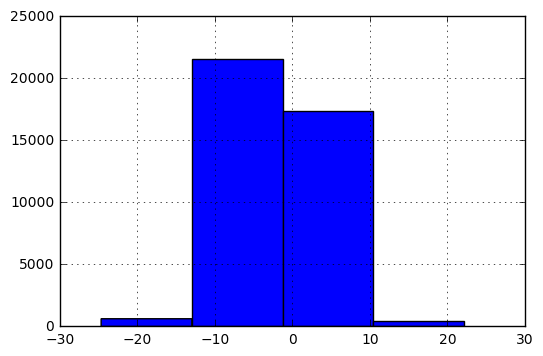

In [180]:
df.x42.hist(bins=4)

In [181]:
df.x43.value_counts()

 0.453849    1
-2.166800    1
-0.856830    1
 0.159177    1
-2.882989    1
-2.795768    1
-1.080917    1
 1.671903    1
 0.061128    1
-1.100908    1
-1.045351    1
-1.090524    1
 0.071619    1
-0.030786    1
 1.146478    1
 2.269016    1
-0.094456    1
-2.556482    1
 0.479029    1
-1.149780    1
-1.695118    1
 2.200728    1
 0.637824    1
 1.980478    1
-2.540492    1
-1.405645    1
 0.786537    1
-0.141753    1
 0.424487    1
 0.676073    1
            ..
-0.797982    1
 0.499775    1
 1.502289    1
-0.512575    1
-1.530435    1
-1.750953    1
 3.398586    1
-0.776346    1
-2.755045    1
 1.518372    1
 1.308436    1
-0.582459    1
-0.189919    1
 0.673830    1
-1.693346    1
-3.479159    1
-0.520682    1
-0.369415    1
-0.069968    1
 0.110474    1
-1.741965    1
 0.647575    1
-1.346950    1
-0.296825    1
-1.536305    1
-1.782737    1
-1.926147    1
-0.040665    1
-1.457540    1
 1.684840    1
Name: x43, dtype: int64

In [182]:
df.x43.describe()

count    39992.000000
mean         0.007109
std          1.531295
min         -6.455841
25%               NaN
50%               NaN
75%               NaN
max          6.286530
Name: x43, dtype: float64

In [183]:
df[df.x43.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
879,0.344249,9.574485,-6.190021,2.753796,-9.473160,-10.528537,-8.999825,17.315973,-16.564721,4.713151,...,1.489300,-2.952096,1.023792,NaN,-2.288455,-0.377789,-21.635364,4.115620,2.399953,2.032534
15471,0.092203,-1.559391,-4.399987,-7.226282,9.930345,-4.524335,-6.397251,-3.777413,-7.972310,-0.915081,...,0.909072,-19.613139,-0.585713,NaN,1.648396,0.076606,-17.627590,3.169974,-2.138679,-22.576878
17227,-0.341932,-8.411488,-2.523392,11.891238,-10.369378,4.170640,-3.668823,16.481678,9.135214,2.275513,...,-8.846763,10.799868,-3.349097,NaN,1.927037,0.024320,-34.756804,2.110009,-0.267132,17.857122
19405,-0.594582,1.477503,5.790700,-10.554199,1.943360,-5.874398,8.419242,26.957924,1.835322,2.946399,...,-17.556905,3.419904,1.767408,NaN,-0.804533,0.018038,-8.669079,-4.905780,-2.399100,4.645059
20489,-0.610018,2.486279,8.322254,-8.638627,-4.307173,-9.565712,12.099932,34.561824,1.161393,-9.115231,...,6.782539,12.401216,0.024279,NaN,0.325037,0.208678,-9.737231,2.489677,0.347539,14.983435
21747,0.016846,-1.888094,-12.013903,5.952618,-7.876948,9.693125,-17.467312,-10.469059,5.581973,-8.744084,...,-28.246014,-28.658441,-6.269380,NaN,1.337726,0.303452,33.983247,0.778445,0.694963,-2.614350
23089,0.262215,0.660787,-5.050786,18.766009,4.332599,11.875519,-7.343463,-23.325341,9.410362,-0.788074,...,-32.391307,-5.873973,-4.781750,NaN,1.598297,0.096927,2.857734,5.881564,-0.892219,19.963903
33535,-0.151275,0.478564,1.872506,-9.594180,4.598919,15.410197,2.722483,43.890103,0.881435,-3.714164,...,-6.471322,2.786155,9.942875,NaN,11.420328,-0.610258,-41.265129,-2.841637,-2.430241,20.458361


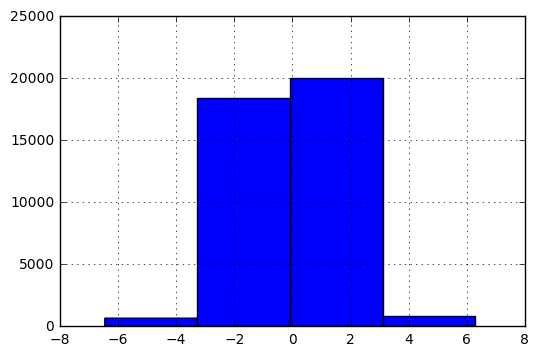

In [184]:
df.x43.hist(bins=4)

In [185]:
df.x44.value_counts()

-4.550474    1
 1.223049    1
 3.770134    1
 3.716948    1
 9.153402    1
 5.244854    1
 3.650272    1
-0.770043    1
-8.999570    1
-0.872838    1
-2.915528    1
-0.201334    1
 3.336044    1
-3.443600    1
-1.445021    1
-1.796541    1
 6.285918    1
 0.650340    1
-1.496588    1
 1.493961    1
-7.053505    1
-1.550959    1
-5.608408    1
 5.180553    1
-6.023554    1
 4.834940    1
 0.758802    1
 1.779973    1
-1.028003    1
 0.281954    1
            ..
-5.421383    1
-2.525304    1
-4.418409    1
-1.222699    1
 1.664187    1
-0.374454    1
 4.523705    1
 4.620936    1
-4.199070    1
 1.557136    1
 4.041401    1
-3.136614    1
 4.066097    1
 6.619655    1
 5.154278    1
 1.536905    1
 2.790199    1
 0.455230    1
 1.991848    1
-2.031032    1
 0.679586    1
-0.014567    1
 5.322211    1
 0.356452    1
 5.320548    1
 2.554154    1
-8.013408    1
-6.060644    1
-3.147721    1
-4.171553    1
Name: x44, dtype: int64

In [186]:
df.x44.describe()

count    39997.000000
mean         0.032597
std          4.137618
min        -16.358976
25%               NaN
50%               NaN
75%               NaN
max         16.679249
Name: x44, dtype: float64

In [187]:
df[df.x44.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10774,0.109028,-0.427683,0.888844,-4.210199,-8.225736,8.071747,1.292312,13.311616,-5.469643,-0.935904,...,19.163134,-7.555754,-3.109462,1.072755,NaN,-0.047079,-21.097986,7.900344,-0.687546,0.941129
20836,0.222625,-5.523281,-5.337231,-5.706568,11.130830,10.472277,-7.759932,18.884745,4.514229,-9.182591,...,0.634514,-12.416454,6.916485,-0.765754,NaN,-0.626679,36.303247,2.140877,-1.116113,2.441332
34812,-0.200585,-2.794487,-11.322470,-7.284088,-3.332011,-10.764378,-16.462021,-42.308816,-5.088984,-10.769981,...,-10.733453,1.760792,-8.180637,-0.532571,NaN,0.289109,1.789848,-4.227559,-2.836849,4.038609


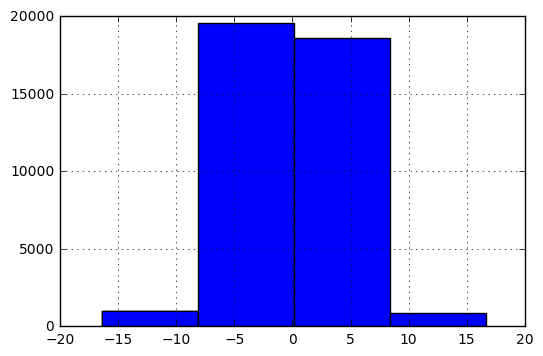

In [188]:
df.x44.hist(bins=4)

In [189]:
df.x45.value_counts()

 0.088335    1
 0.539062    1
-0.297189    1
 0.149479    1
 0.071464    1
 0.213811    1
-0.246764    1
 0.168098    1
 0.098809    1
 0.203928    1
-0.078582    1
 0.145047    1
-0.365932    1
 0.096091    1
 0.430658    1
 0.213427    1
 0.308246    1
-0.414729    1
 0.276511    1
 0.112784    1
 0.278296    1
-0.204301    1
-0.691106    1
 0.363150    1
 0.043749    1
-1.071722    1
 0.021869    1
-0.819680    1
 0.329203    1
-1.039686    1
            ..
-0.430506    1
 0.006418    1
-0.153908    1
 0.210909    1
 0.342477    1
 0.409711    1
 0.338698    1
 0.347753    1
 0.286193    1
 0.625537    1
 0.212656    1
 0.014624    1
 0.613904    1
-0.180560    1
-0.178021    1
-0.028617    1
 0.344685    1
-0.616629    1
 0.145632    1
 0.507751    1
 0.042015    1
 0.250418    1
-0.143056    1
 0.319748    1
 0.198196    1
 0.023300    1
-0.154037    1
-0.423008    1
 0.269832    1
 0.284734    1
Name: x45, dtype: int64

In [190]:
df.x45.describe()

count    39996.000000
mean         0.003296
std          0.396432
min         -1.712737
25%               NaN
50%               NaN
75%               NaN
max          1.663191
Name: x45, dtype: float64

In [191]:
df[df.x45.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
4266,-0.557199,-6.925351,-10.103099,8.626165,-5.326997,-8.038755,-14.689147,-12.337394,-15.712595,7.781490,...,10.134818,31.348029,-6.534535,-1.564131,-7.779594,NaN,-46.536306,10.987367,2.921552,10.184574
19363,-0.543241,-0.715072,-3.539131,6.729807,-2.981873,18.508079,-5.145630,21.511902,-11.657148,-5.183158,...,7.171934,-29.369371,4.143794,-0.801839,2.359192,NaN,1.680970,-3.831969,-3.832406,-8.189690
19618,0.426868,-14.813121,-10.787977,-2.101914,-7.358982,5.608836,-15.684908,0.070282,-0.401704,-11.030899,...,-39.332436,-3.033954,-3.406416,1.340102,10.527763,NaN,-0.446119,-6.543263,0.442237,36.524691
39133,-0.095398,-9.697760,-5.329847,-0.011274,3.583647,1.431495,-7.749196,7.979487,1.994824,6.586985,...,9.633239,-0.553143,-0.797442,0.676613,-7.010775,NaN,-28.301166,5.229062,2.991915,-12.751381


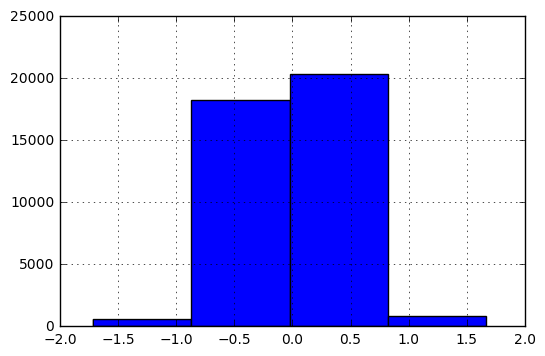

In [192]:
df.x45.hist(bins=4)

In [193]:
df.x46.value_counts()

-0.589479      1
-44.530340     1
 48.122600     1
-34.595510     1
-28.237734     1
 15.763718     1
-5.208932      1
-24.658702     1
 22.946853     1
-50.257696     1
-62.503041     1
-0.557424      1
-7.151986      1
 15.191508     1
-74.956293     1
 27.442495     1
-14.864538     1
-9.316583      1
 0.134299      1
 47.318965     1
-57.213761     1
 4.061567      1
-30.146364     1
-31.213263     1
-31.311091     1
-0.111771      1
-55.322745     1
-10.234250     1
 42.428924     1
 11.309501     1
              ..
-7.627119      1
-10.049505     1
 64.928333     1
-105.733779    1
-94.854415     1
-52.664055     1
-7.180570      1
-17.177128     1
-32.344231     1
-92.911545     1
 21.330899     1
-3.643247      1
-73.080092     1
-136.191678    1
-14.078973     1
-41.891676     1
-13.503656     1
-83.426043     1
 94.245135     1
 17.268071     1
 10.829554     1
-42.122962     1
 6.484812      1
 54.739271     1
 36.822854     1
 28.702634     1
-48.573234     1
-61.343284    

In [194]:
df.x46.describe()

count    39993.000000
mean       -12.681044
std         36.737560
min       -199.609887
25%               NaN
50%               NaN
75%               NaN
max        131.577516
Name: x46, dtype: float64

In [195]:
df[df.x46.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
6337,0.399222,-1.376901,9.067140,10.170435,7.885800,11.093964,13.182940,41.888000,-7.104086,-8.488659,...,33.746594,-7.887341,-7.393743,1.362466,-1.452324,-0.548394,NaN,9.839836,-1.333336,-18.098688
12914,0.056622,-2.793444,8.873503,-2.613840,-0.646611,-5.531871,12.901406,-27.505396,3.090631,-5.283227,...,15.874580,4.968462,0.870035,-0.626012,7.232067,-0.097663,NaN,3.346791,0.011749,-25.331020
20949,-0.679603,0.159430,-1.323181,2.745183,1.396686,10.543891,-1.923805,5.820900,-11.225989,-3.736471,...,-18.103036,5.979272,-5.542087,0.116425,3.632729,-0.022454,NaN,-3.776469,1.879411,13.218847
24128,-0.282070,0.358847,-11.238007,0.652335,5.782241,-14.426988,-16.339218,4.610649,-8.058337,13.312803,...,22.560456,-6.114299,-13.270190,2.779277,0.040482,0.129223,NaN,4.993334,1.654455,-10.664103
25547,0.045479,1.125288,-13.902921,-5.353646,-10.105736,-1.946810,-20.213802,-15.218781,12.636163,10.063526,...,32.623292,28.694412,-5.840196,-0.681724,-2.225584,-0.021926,NaN,6.213728,1.002403,11.783248
26947,-0.535929,1.282079,-10.195029,-3.020579,-12.900266,3.838402,-14.822806,-61.816852,1.948278,-5.091567,...,-35.594714,29.777058,-7.637709,0.090808,-9.760935,0.392108,NaN,1.280338,-4.319506,22.037433
32889,0.166872,5.281928,-3.482370,5.509571,-2.421724,8.003706,-5.063105,27.040485,8.495376,-6.794139,...,-0.717451,5.389486,-5.568193,1.616506,-0.503112,0.503132,NaN,-3.815454,2.208609,13.004520


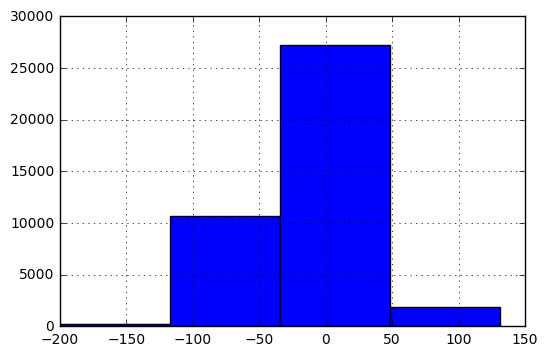

In [196]:
df.x46.hist(bins=4)

In [197]:
df.x47.value_counts()

-9.760799     1
-3.515954     1
-3.128398     1
 5.180852     1
-1.724870     1
 3.559481     1
-2.959234     1
 7.191654     1
 2.242789     1
-4.063897     1
 1.194246     1
 6.272423     1
 1.179319     1
 6.929372     1
-2.417327     1
-3.518543     1
 1.047873     1
-6.171588     1
 5.108388     1
 11.667964    1
 0.214226     1
-4.527975     1
-2.215463     1
 1.890645     1
-5.253670     1
-2.295173     1
-12.766444    1
 2.582683     1
 9.844337     1
-0.118966     1
             ..
 2.214358     1
 1.699336     1
 0.957104     1
 10.500269    1
 7.594403     1
 0.823624     1
-3.935953     1
 7.005707     1
 0.498714     1
 4.070761     1
-4.541292     1
-1.814260     1
 5.108292     1
 3.064251     1
 1.901576     1
-8.004551     1
 2.617602     1
-7.749131     1
 3.237258     1
 8.458668     1
-3.130810     1
 0.504130     1
 1.233593     1
 2.555048     1
-0.387108     1
 2.251039     1
-2.324842     1
-9.833695     1
-1.252606     1
 1.523459     1
Name: x47, dtype: int64

In [198]:
df.x47.describe()

count    39996.000000
mean        -0.023815
std          4.813593
min        -19.421488
25%               NaN
50%               NaN
75%               NaN
max         20.586126
Name: x47, dtype: float64

In [199]:
df[df.x47.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
10428,0.586417,6.205210,-15.204030,3.487679,-8.718124,7.395227,-22.105518,33.712120,-3.662548,1.464405,...,16.543692,-18.787529,-4.285622,0.883047,1.068795,-0.621042,-72.370768,NaN,2.244406,-15.957138
11735,-0.167893,0.676634,6.067071,1.190937,-4.153683,12.533595,8.821065,34.567573,3.863377,-4.314187,...,41.021033,2.275071,3.067613,-1.508622,0.714247,0.380947,-18.586692,NaN,2.991162,-13.917819
19849,-0.088663,-5.340698,-30.715367,13.918038,-6.444800,-1.803833,-44.657836,-15.190739,0.365751,-4.630004,...,16.366874,-7.202249,-3.766701,1.398182,2.471006,-0.063250,0.468033,NaN,2.834777,26.265538
38829,-0.135847,-8.702232,16.259209,-1.733463,-2.060558,-17.494272,23.639668,31.694563,3.952662,-0.505370,...,5.958506,19.996860,4.441465,0.709273,6.953686,0.215636,-41.529115,NaN,-0.912732,-12.335061


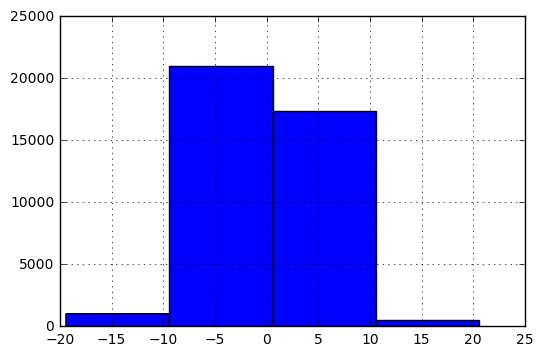

In [200]:
df.x47.hist(bins=4)

In [201]:
df.x48.value_counts()

-1.546382    1
 0.187790    1
-3.343967    1
 0.747381    1
 0.578334    1
-1.038474    1
-2.091150    1
 0.927159    1
 1.396317    1
-0.381038    1
 0.807057    1
-0.290460    1
-0.786072    1
-3.703767    1
-0.902109    1
-1.588288    1
-1.034802    1
-1.308475    1
 1.084763    1
-0.859216    1
-2.592195    1
-0.655059    1
 0.342941    1
-3.561293    1
-0.237945    1
-3.692874    1
-0.803424    1
 0.420907    1
 0.730334    1
-3.002445    1
            ..
 2.688412    1
-2.509868    1
 1.124496    1
-1.105299    1
-0.567246    1
-0.698473    1
-2.439742    1
 1.623715    1
-1.840217    1
-1.406018    1
-0.571870    1
-0.550827    1
 2.638309    1
 2.855163    1
-0.668473    1
 1.851863    1
-1.571347    1
-1.494390    1
 0.497292    1
 2.206909    1
 0.166859    1
-3.052429    1
 5.143773    1
-2.874386    1
 0.695911    1
-2.251345    1
 0.223966    1
-0.982276    1
-1.286444    1
-0.599349    1
Name: x48, dtype: int64

In [202]:
df.x48.describe()

count    39995.000000
mean         0.012795
std          1.938144
min         -7.437804
25%               NaN
50%               NaN
75%               NaN
max          7.781771
Name: x48, dtype: float64

In [203]:
df[df.x48.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
7639,0.205435,5.609298,-9.493754,-4.319544,0.199473,-0.240697,-13.803205,44.925152,6.479611,5.582882,...,-15.948049,-15.982176,4.996145,-0.724870,1.698208,0.195062,30.573088,-8.480416,NaN,13.181579
19606,0.443298,-4.056405,-13.162557,4.078415,-4.746388,-1.833726,-19.137368,-17.487569,1.408640,0.576975,...,-0.909352,5.325814,-3.243704,-1.723375,-0.516343,0.448476,28.129233,-2.042521,NaN,17.652575
28429,0.373614,-2.637583,-9.939582,12.810239,3.000629,3.047664,-14.451406,-11.832038,8.492591,10.979829,...,-24.596440,0.029134,-5.026096,-0.418491,-2.485887,0.221412,2.572329,-1.804573,NaN,25.918186
29546,0.507755,-4.151167,24.153121,8.442898,-1.811775,4.464628,35.116822,-5.346602,-8.373867,-1.661163,...,1.368002,38.648554,0.654860,-0.994048,-2.739130,0.096155,-14.994982,0.830516,NaN,-7.578567
29959,0.031296,-2.859436,-11.629156,8.275609,-2.104092,5.959446,-16.907919,8.296320,4.054802,-1.178469,...,8.112014,-27.001133,3.548240,-0.985215,-2.140894,-0.868068,2.928384,2.680655,NaN,-16.720215


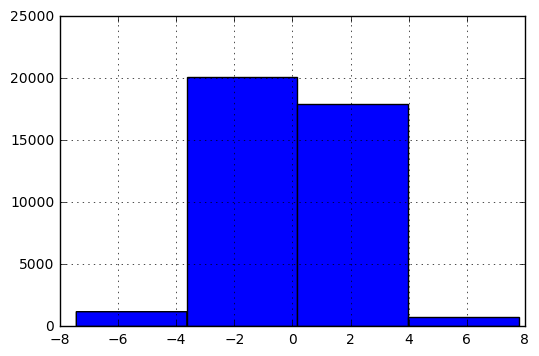

In [204]:
df.x48.hist(bins=4)

In [205]:
df.x49.value_counts()

 10.900620    1
-5.818692     1
-16.929658    1
-1.532228     1
 6.146095     1
-8.742215     1
-29.571176    1
 3.166476     1
-7.336083     1
-8.829945     1
-34.124834    1
-12.499230    1
 10.485797    1
 0.962159     1
 12.404720    1
 1.721877     1
 3.227787     1
 5.531795     1
-15.438461    1
-19.736863    1
-21.514743    1
 10.302656    1
-22.926758    1
-0.100935     1
 28.050001    1
 11.515053    1
-15.013241    1
 4.803127     1
-3.528761     1
 15.771400    1
             ..
-17.492145    1
-10.726167    1
-7.826026     1
-14.785188    1
 9.201443     1
 1.095169     1
 11.297091    1
 19.395572    1
-8.060927     1
-8.904821     1
 25.653554    1
 6.408792     1
-3.388362     1
 27.810368    1
-20.812136    1
-9.652307     1
-1.145304     1
-27.880778    1
-1.779244     1
 0.794676     1
 16.159300    1
 7.707843     1
-19.792575    1
-9.483690     1
 9.014247     1
 17.706769    1
-12.524076    1
-11.377300    1
 6.407550     1
-8.643949     1
Name: x49, dtype: int64

In [206]:
df.x49.describe()

count    39987.000000
mean        -0.699512
std         15.037603
min        -58.373259
25%               NaN
50%               NaN
75%               NaN
max         63.436061
Name: x49, dtype: float64

In [207]:
df[df.x49.isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
202,-0.033666,3.619146,-17.619922,6.415630,4.800279,-0.067147,-25.618042,14.204170,19.893352,-7.089081,...,-10.748451,-28.938351,-3.390374,1.468866,-6.802180,-0.037301,-4.211652,0.753212,1.129832,NaN
1722,0.319747,-0.933951,20.190411,-0.290101,-7.438682,1.293854,29.355341,15.017895,-3.228918,-12.972986,...,-15.641233,21.228092,7.583885,3.054190,6.113549,0.186999,30.377567,8.121702,-2.274548,NaN
6863,-0.229236,-4.345110,2.753285,5.205662,-6.210818,-15.244682,4.003070,72.136244,11.721121,11.499953,...,15.544071,-29.046690,5.327264,-0.722525,1.234350,-0.410915,-0.390711,1.949245,-1.297274,NaN
9115,-0.066091,4.743803,13.664305,-9.599818,-6.018092,3.162781,19.866872,-25.802297,11.624999,9.884795,...,-11.484565,20.727132,3.582033,-0.538530,4.972585,-0.174104,-2.763061,-2.501300,-3.234020,NaN
16024,0.086376,-5.212479,2.472887,-17.018599,5.122562,-9.679805,3.595392,-21.596739,13.369188,4.132841,...,-7.171629,32.697108,4.972959,-0.274360,4.085004,0.119921,-45.206598,-5.613318,-3.573795,NaN
21460,0.036625,-6.487325,20.236683,-7.346954,-3.240451,7.244555,29.422617,-4.449586,21.036866,0.738494,...,14.805419,18.700884,2.052934,-1.926598,1.735832,0.037890,-26.162642,-5.435551,-1.672656,NaN
24305,0.093015,-2.804357,-30.060086,21.074477,-6.888410,-3.508682,-43.705107,-25.290346,11.780193,-12.130611,...,-17.521982,-30.240431,-0.866947,1.255140,-4.076210,0.421328,22.022321,1.640228,-0.636492,NaN
27833,0.262120,-6.071872,-8.297080,-7.294341,3.396619,2.592629,-12.063331,-13.842421,-2.603635,3.586046,...,-10.603373,0.313886,1.414876,2.505729,5.211522,-0.274072,50.864233,8.091351,2.476101,NaN
28305,-0.409774,8.017070,6.761643,-7.090328,3.629280,11.614336,9.830921,-0.511234,7.883856,-0.686752,...,-13.235421,7.277848,2.918863,-1.251781,3.432052,0.091518,-1.287950,2.148397,-0.806016,NaN
29138,0.275531,-3.509939,22.025363,-9.415082,-1.829508,-8.952550,32.023223,10.571725,0.849820,1.391904,...,18.925860,17.291285,-2.143023,0.837757,-0.088835,-0.134970,-58.531185,8.213442,-0.290173,NaN


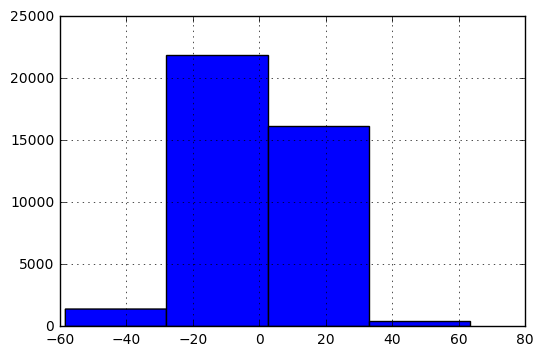

In [208]:
df.x49.hist(bins=4)

In [209]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(df):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))
    
 

In [210]:
 describe_categorical(df) 

,x24,x29,x30,x32,x37
count,39987,39993,39994,39990,39994
unique,3,12,5,11,37864
top,asia,July,wednesday,0.01%,$-881.11
freq,34665,11500,25153,10178,4


In [211]:
df[("x32")]=df["x32"].str.replace('%','')


In [212]:
df[("x37")]=df["x37"].str.replace('$','')

In [213]:
df.x32=df.x32.astype(np.float64)

In [214]:
df.x37=df.x37.astype(np.float64)

In [215]:
col = ["x0","x1", "x2", "x3", "x4", "x5", "x6","x7", "x8", "x9","x10", "x11", "x12","x13", "x14", "x15","x16", "x17", "x18","x19", 
       "x20", "x21","x22", "x23", "x25","x26", "x27", "x28", "x31", "x32","x33", "x34", "x35", "x36", "x37",
       "x38","x39", "x40", "x41","x42", "x43", "x44","x45", "x46", "x47","x48", "x49"]
for x in col:
    if pd.notnull(x):
      
        mean = df[x].mean()
        df[x] = df[x].fillna(mean)

In [216]:
categorical_variables = ['x24', 'x29', 'x30']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    df[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [217]:
df.shape

(40000, 70)

In [218]:
df.to_csv("testclean.csv")

In [219]:
df.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'x24_Missing', u'x24_america', u'x24_asia', u'x24_euorpe',
       u'x29_Apr', u'x29_Aug', u'x29_Dev', u'x29_Feb', u'x29_January',
       u'x29_July', u'x29_Jun', u'x29_Mar', u'x29_May', u'x29_Missing',
       u'x29_Nov', u'x29_Oct', u'x29_sept.', u'x30_Missing', u'x30_friday',
       u'x30_monday', u'x30_thurday', u'x30_tuesday', u'x30_wednesday'],
      dtype='object')